In [178]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import statistics
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [179]:
# checking the versions of vaious libraries used
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.24.3
2.0.3
0.12.2


# Problem 1
## Background Information
A data scientist has been assigned a project to analyze system activity data and construct a linear equation using various system attributes. This equation aims to predict the system's 'usr' mode based on data collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory, which is stored in the comp-activ database.
## Business Context
Study different system attributes to understand their impact on the system's 'usr' mode and build a linear regression model that could help predict the portion of time (%) that cpu's run in user mode.

## Problem Statement
The objective of this project is to establish a linear equation that could predict portion of time (%) that cpu's run in user mode represented by column 'usr'. For building this model different system attributes have to be analyzed in order to understand their influence on the system's 'usr' mode.  
## Data Dictionary
* lread - Reads (transfers per second ) between system memory and user memory
* lwrite - writes (transfers per second) between system memory and user memory
* scall - Number of system calls of all types per second
* sread - Number of system read calls per second .
* swrite - Number of system write calls per second .
* fork - Number of system fork calls per second.
* exec - Number of system exec calls per second.
* rchar - Number of characters transferred per second by system read calls
* wchar - Number of characters transfreed per second by system write calls
* pgout - Number of page out requests per second
* ppgout - Number of pages, paged out per second
* pgfree - Number of pages per second placed on the free list.
* pgscan - Number of pages checked if they can be freed per second
* atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second
* pgin - Number of page-in requests per second
* ppgin - Number of pages paged in per second
* pflt - Number of page faults caused by protection errors (copy-on-writes).
* vflt - Number of page faults caused by address translation .
* runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run. Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)
* freemem - Number of memory pages available to user processes.
* freeswap - Number of disk blocks available for page swapping.
* usr - Portion of time (%) that cpus run in user mode
## Loading Data

In [180]:
cpu_data = pd.read_excel('D:/Kartik/GL MDS/Study_data/Assingnment_files/Module_4_PM/compactiv.xlsx')

## Data Overview

In [181]:
def data_overview(df):
    print("a glimpse of the data")
    print("----------------------------------------------------------------------------")
    display(df.head())
    print("\n")
    
    print("shape of the dataset")
    print("----------------------------------------------------------------------------")
    display(df.shape)
    print("\n")
    
    print("statistical summary")
    print("----------------------------------------------------------------------------")
    display(df.describe().T)
    print("\n")
    
    print("information of features")
    print("----------------------------------------------------------------------------")
    display(df.info())
    print("\n")
    
    print("missing values")
    print("----------------------------------------------------------------------------")
    display(df.isnull().sum())
    print("\n")
    
    print("checking for duplicates")
    print("----------------------------------------------------------------------------")
    print(f"number of duplicate rows: {df.duplicated().sum()}")
    print("\n")
    
    object_columns = df.select_dtypes(include='object').columns #identify columns with object data type
    for column in object_columns:
        print("value counts for " + column)
        print("----------------------------------------------------------------------------")
        print(df[column].value_counts())
        print("\n")

In [182]:
data_overview(cpu_data)

a glimpse of the data
----------------------------------------------------------------------------


lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]



shape of the dataset
----------------------------------------------------------------------------


(8192, 22)



statistical summary
----------------------------------------------------------------------------


count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00



information of features
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqs

None



missing values
----------------------------------------------------------------------------


lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64



checking for duplicates
----------------------------------------------------------------------------
number of duplicate rows: 0


value counts for runqsz
----------------------------------------------------------------------------
runqsz
Not_CPU_Bound    4331
CPU_Bound        3861
Name: count, dtype: int64




#### Key Observations
1. Based on the first glimpse of data, there are clearly some missing values in the data.
2. Dataset has 8192 rows and 22 columns of which 21 are numeric and 1 is categorical.
3. From the statistical summary we can conclude that there is difference in the scales of numeric data. For some variables there is significant difference in mean and 50% (median) values meaning presence of outliers about which we will understand more during EDA.
3. There are missing values for attributes 'rchar' and 'wchar' which we will impute during pre-processing stage.
4. For categorical attribute 'runqsz' there are only 2 unique values, 4331 records are 'Not_CPU_Bound' and 3861 are 'CPU_Bound'.

## Data Pre-processing
### Imputing Missing Values
Since for both 'rchar' and 'wchar' there is significant difference between mean and median values, we will be using median values for imputing missing values.

In [183]:
def impute_values(df):
    for column in df.columns:
        # for non object columns
        if df[column].dtype != 'object':
            median = df[column].median()
            df[column] = df[column].fillna(median) 
        # for object columns
        elif df[column].dtype == 'object':
             mode = df[column].mode()
             df[column] = df[column].fillna(mode)   

In [184]:
impute_values(cpu_data)
cpu_data.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

We have successfully imputed missing values.
## Exploratory Data Analysis (EDA)
### Univariate Analysis
#### For Numeric Columns

In [185]:
def univariateAnalysis_numeric(df,column):
    print(f'Skewness of {column}: ', df[column].skew())
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")

    # Calculate min and max values for the column
    a = round(df[column].min())
    b = round(df[column].max())
    # Plot histogram with annotations
    freq, bins, patches = axs[0].hist(df[column], range=[a, b], edgecolor='pink', color='cyan')
    bin_centers = np.diff(bins) * 0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
        height = int(freq[n])
        axs[0].annotate("{}".format(height),
                    xy=(x, height),  # top left corner of the histogram bar
                    xytext=(0, 0.2),  # offsetting label position above its bar
                    textcoords="offset points",  # Offset (in points) from the *xy* value
                    ha='center', va='bottom')
        n = n + 1
    axs[0].set_xlabel(column)
    axs[0].tick_params(axis='x', labelrotation=90)
        
    # Plot boxplot
    sns.boxplot(x=column, data=df, ax=axs[1], color = 'pink')
    axs[1].tick_params(axis='x', labelrotation=90)

    # Show the plots
    plt.show()

Skewness of lread:  13.897852242774922
Distribution of lread
----------------------------------------------------------------------------


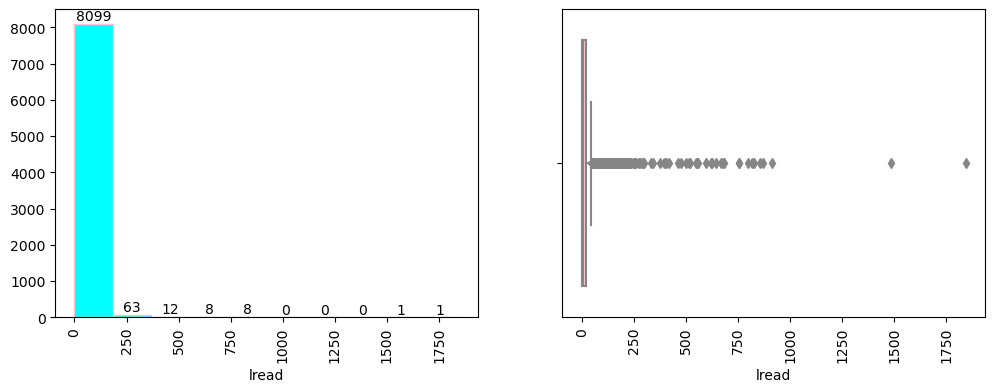

Skewness of lwrite:  5.27764452621306
Distribution of lwrite
----------------------------------------------------------------------------


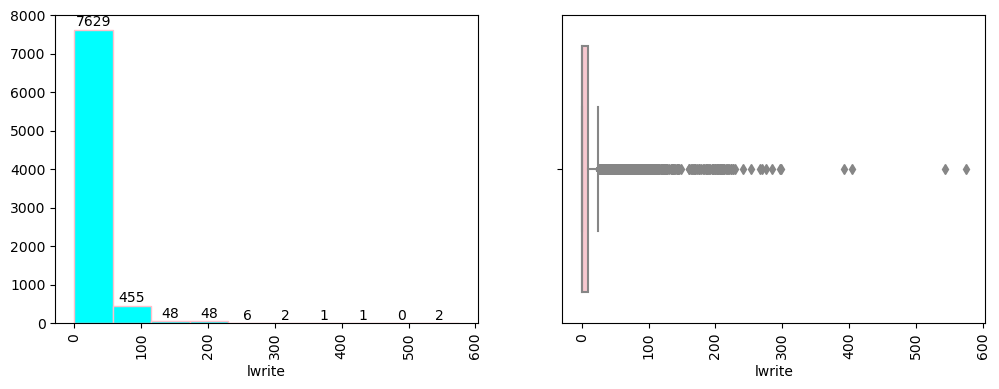

Skewness of scall:  0.9025312213201333
Distribution of scall
----------------------------------------------------------------------------


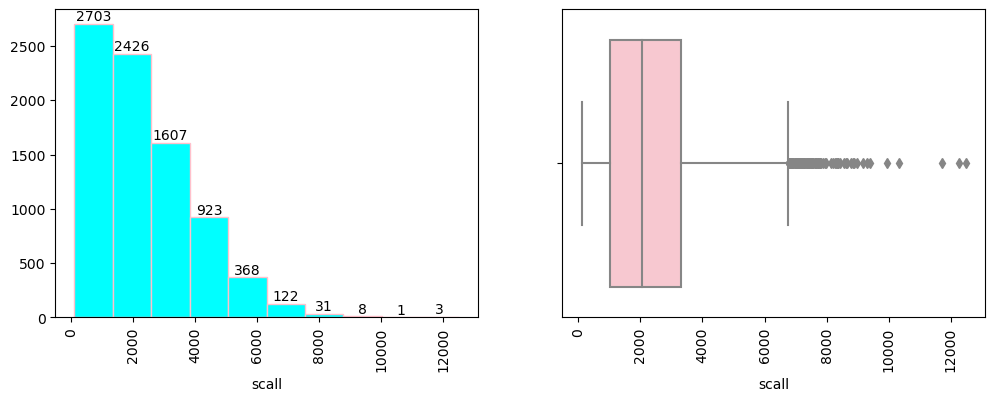

Skewness of sread:  5.459465962452425
Distribution of sread
----------------------------------------------------------------------------


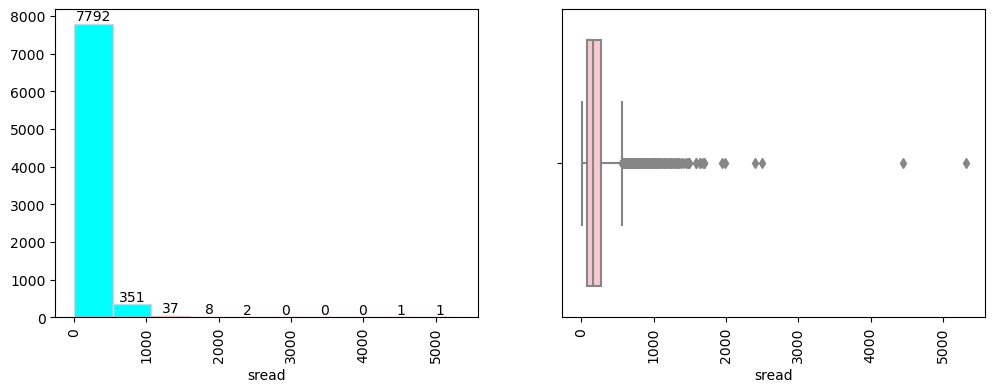

Skewness of swrite:  9.605843698195871
Distribution of swrite
----------------------------------------------------------------------------


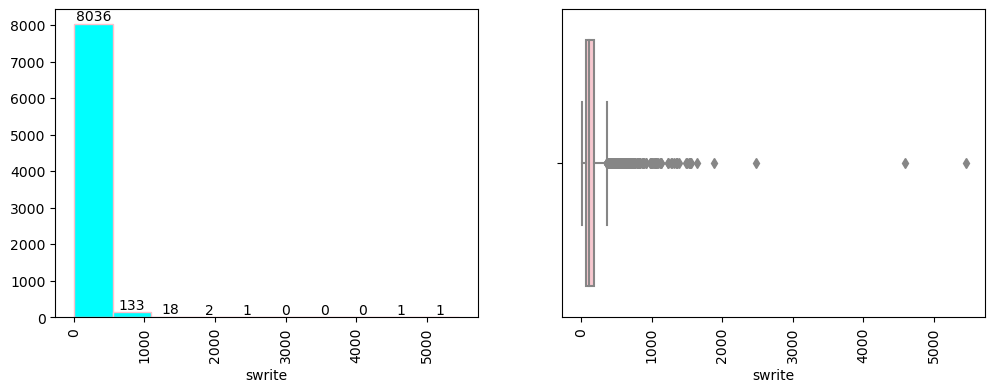

Skewness of fork:  2.2496891391571325
Distribution of fork
----------------------------------------------------------------------------


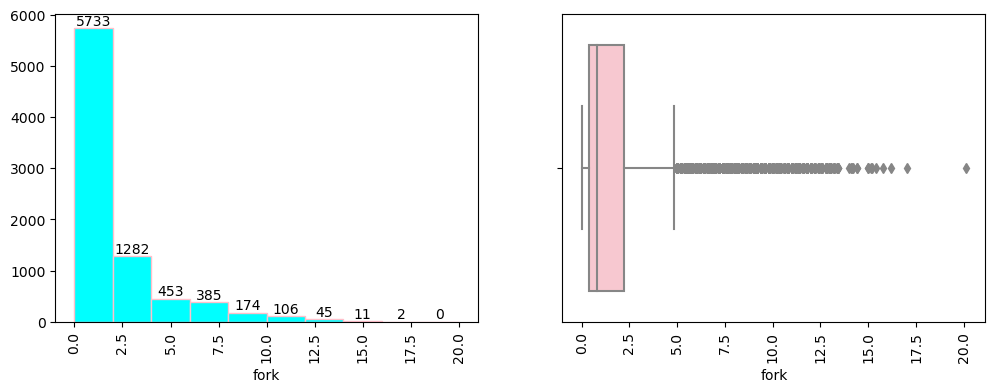

Skewness of exec:  4.069237707552533
Distribution of exec
----------------------------------------------------------------------------


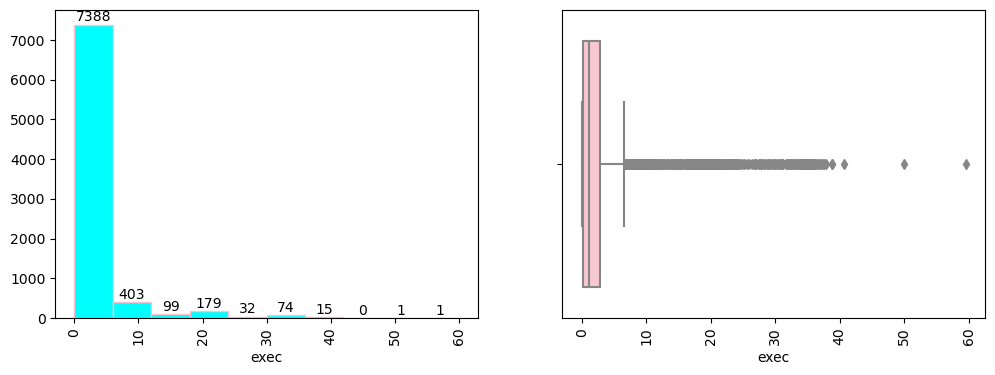

Skewness of rchar:  2.8785581933662114
Distribution of rchar
----------------------------------------------------------------------------


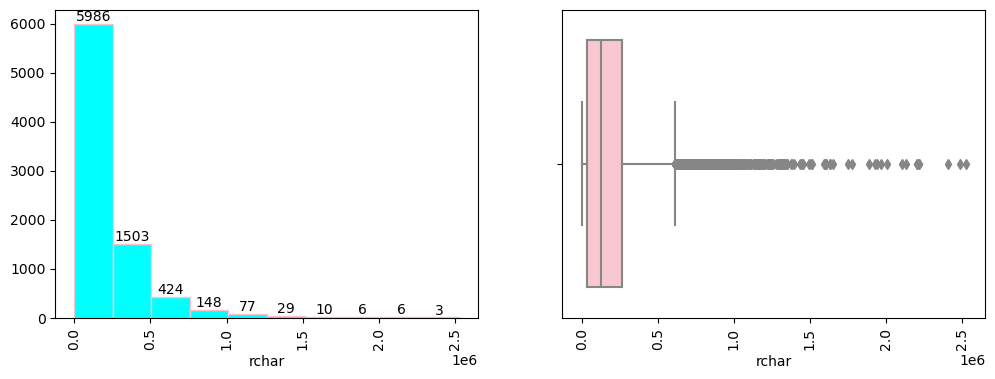

Skewness of wchar:  3.851730992818844
Distribution of wchar
----------------------------------------------------------------------------


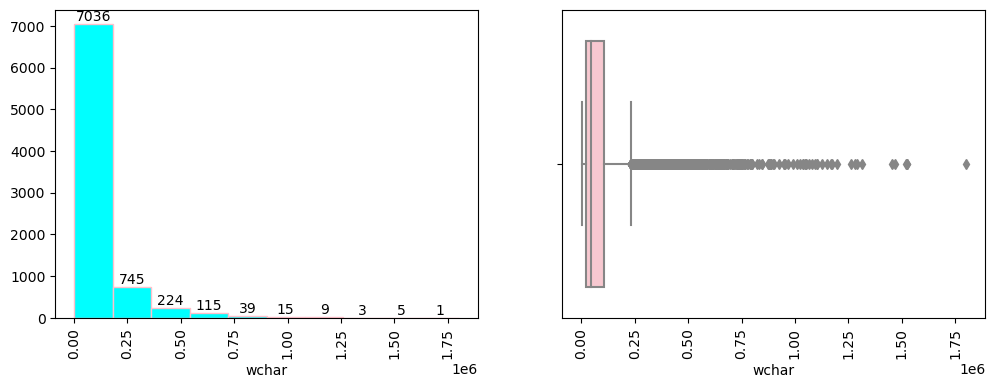

Skewness of pgout:  5.0669841185950535
Distribution of pgout
----------------------------------------------------------------------------


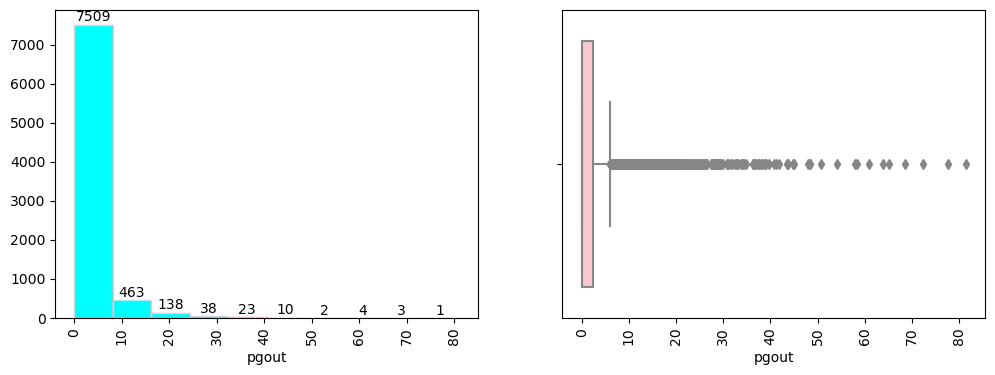

Skewness of ppgout:  4.680441654574661
Distribution of ppgout
----------------------------------------------------------------------------


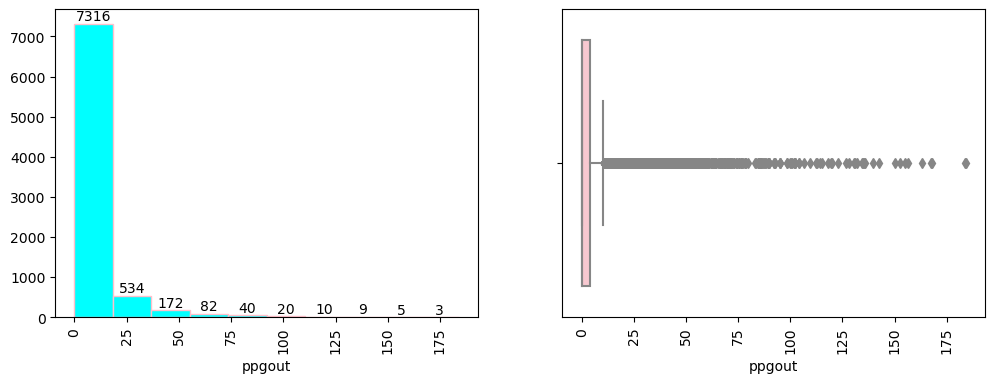

Skewness of pgfree:  4.768191252103855
Distribution of pgfree
----------------------------------------------------------------------------


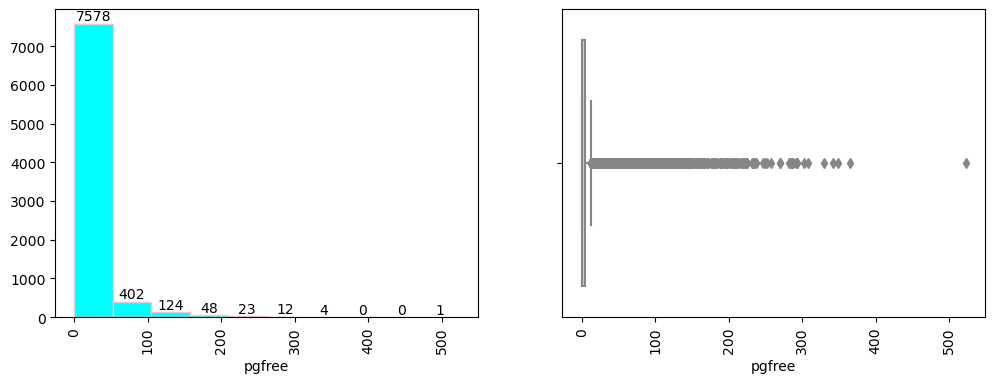

Skewness of pgscan:  5.813415144064877
Distribution of pgscan
----------------------------------------------------------------------------


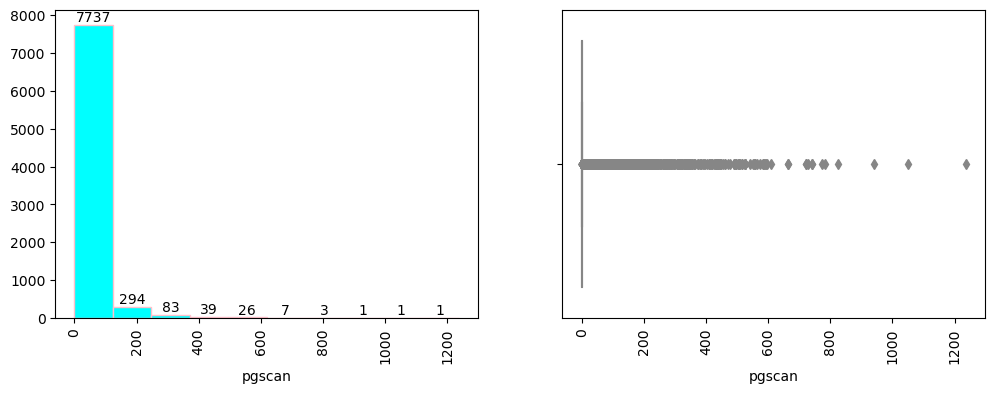

Skewness of atch:  21.542019683247847
Distribution of atch
----------------------------------------------------------------------------


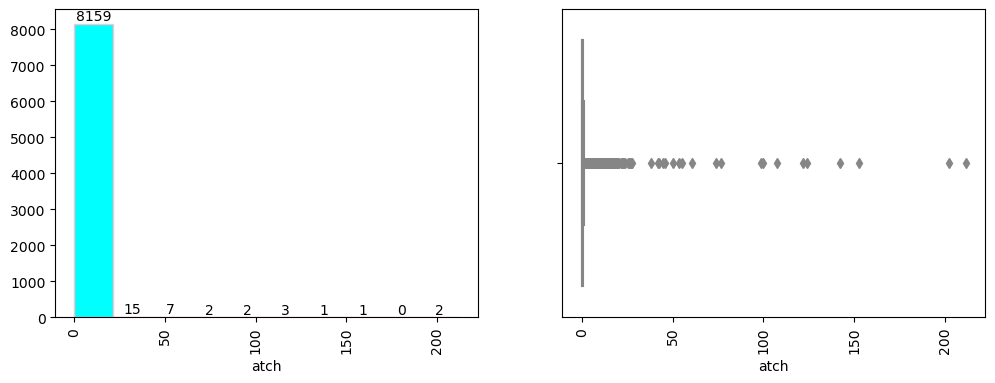

Skewness of pgin:  3.2424124762557356
Distribution of pgin
----------------------------------------------------------------------------


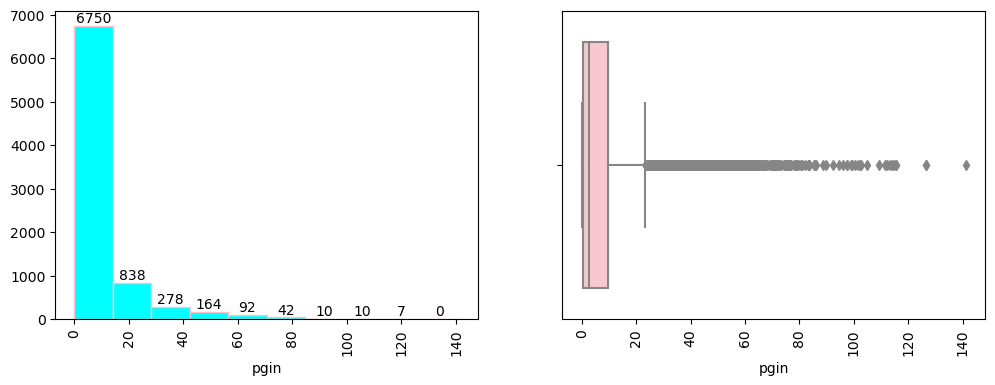

Skewness of ppgin:  3.902764914157577
Distribution of ppgin
----------------------------------------------------------------------------


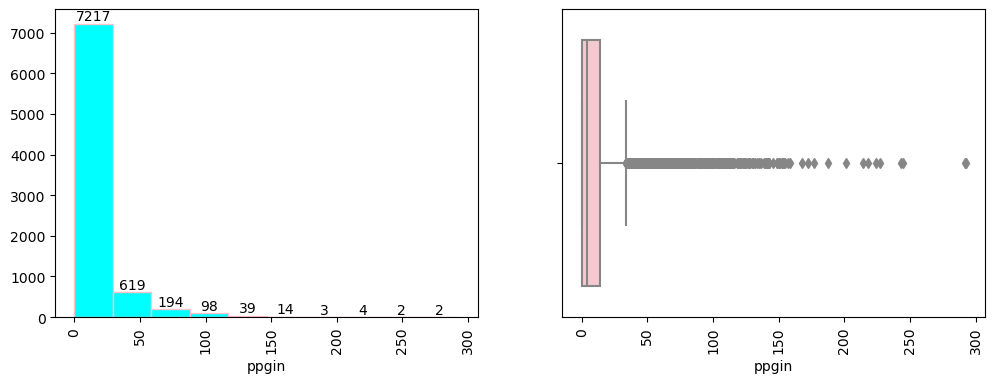

Skewness of pflt:  1.7202841192012033
Distribution of pflt
----------------------------------------------------------------------------


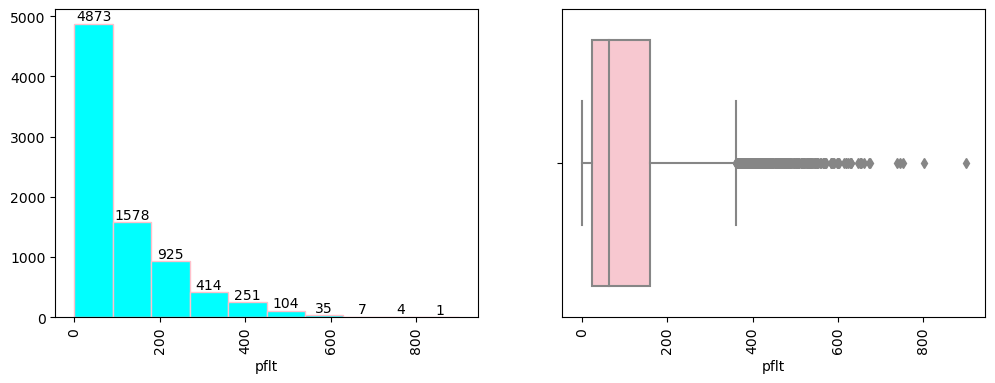

Skewness of vflt:  1.7373265929727528
Distribution of vflt
----------------------------------------------------------------------------


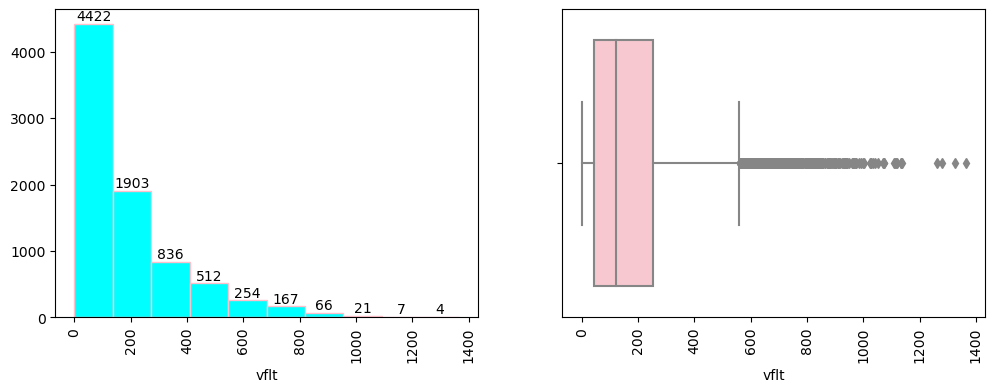

Skewness of freemem:  1.8075546533224125
Distribution of freemem
----------------------------------------------------------------------------


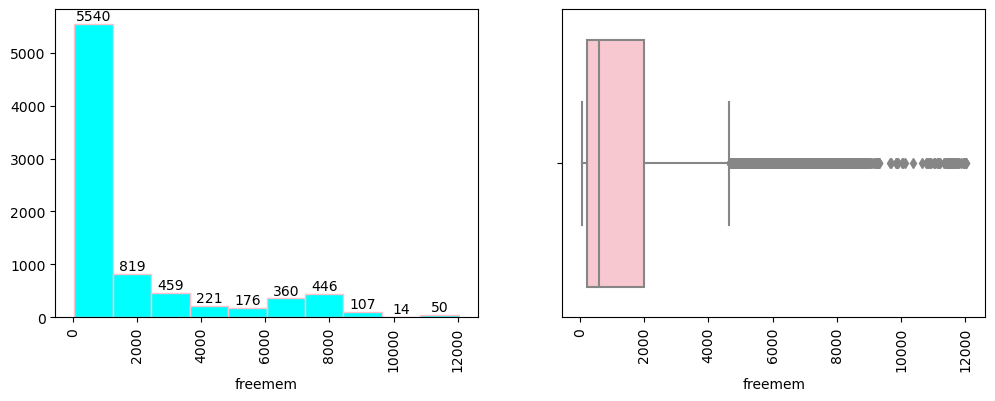

Skewness of freeswap:  -0.7916644438525977
Distribution of freeswap
----------------------------------------------------------------------------


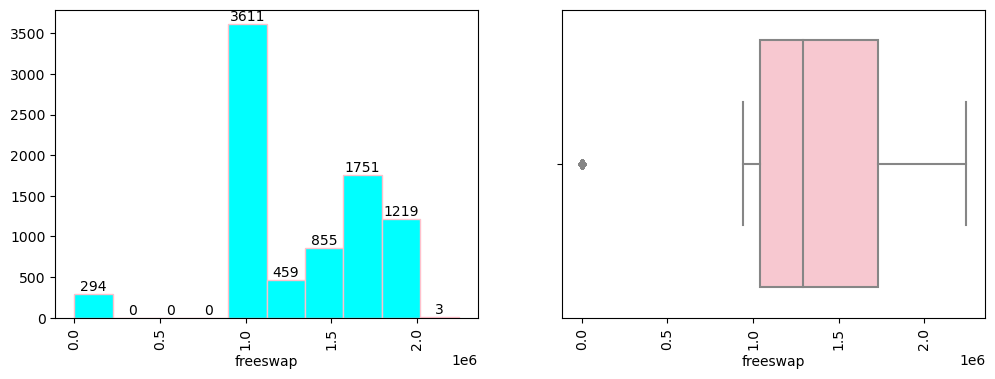

Skewness of usr:  -3.4167496030437094
Distribution of usr
----------------------------------------------------------------------------


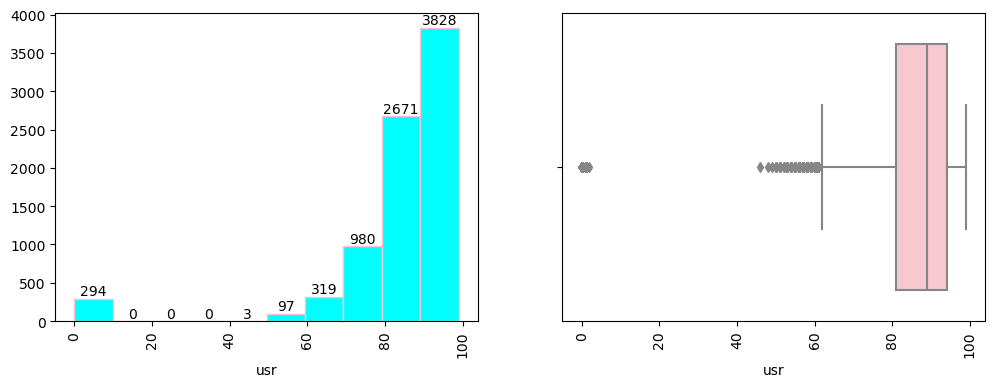

In [186]:
for column in cpu_data.select_dtypes(include= 'number').columns:
    univariateAnalysis_numeric(cpu_data, column)

#### Key Observations
1. As we had expected earlier, there are significant number of outliers in the data which we will have to treat.
2. Data is skewed for all attributes. For independent variables only 'freeswap' is left skewed, rest all are right skewed.
#### For Categorical Column

Details of runqsz
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

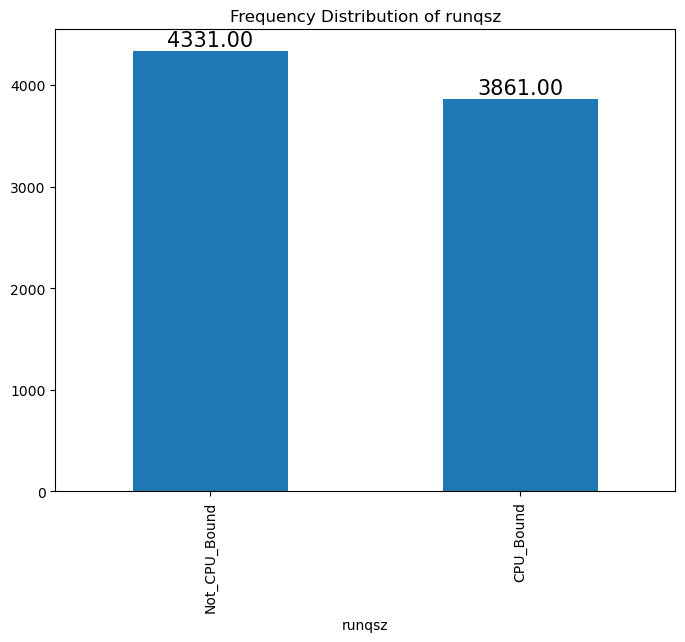

In [187]:
print("Details of runqsz")
print("----------------------------------------------------------------")
plt.figure()
plt.figure(figsize=(8, 6))
plots = cpu_data['runqsz'].value_counts().plot.bar(title="Frequency Distribution of runqsz")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
                size=15, xytext=(0, 8),
                textcoords='offset points')
plt.show()

### Bivariate Analysis
#### For Numeric Columns

In [188]:
def bivariate_num_num(df, df_num):
  # pairplot
  print('pair plot') 
  sns.pairplot(data = df, corner = True)
  plt.show()

  # heatmap
  print('heatmap')
  corr = df_num.corr(method='pearson')
  mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
  fig = plt.subplots(figsize=(25, 15))
  sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
  plt.show()

pair plot


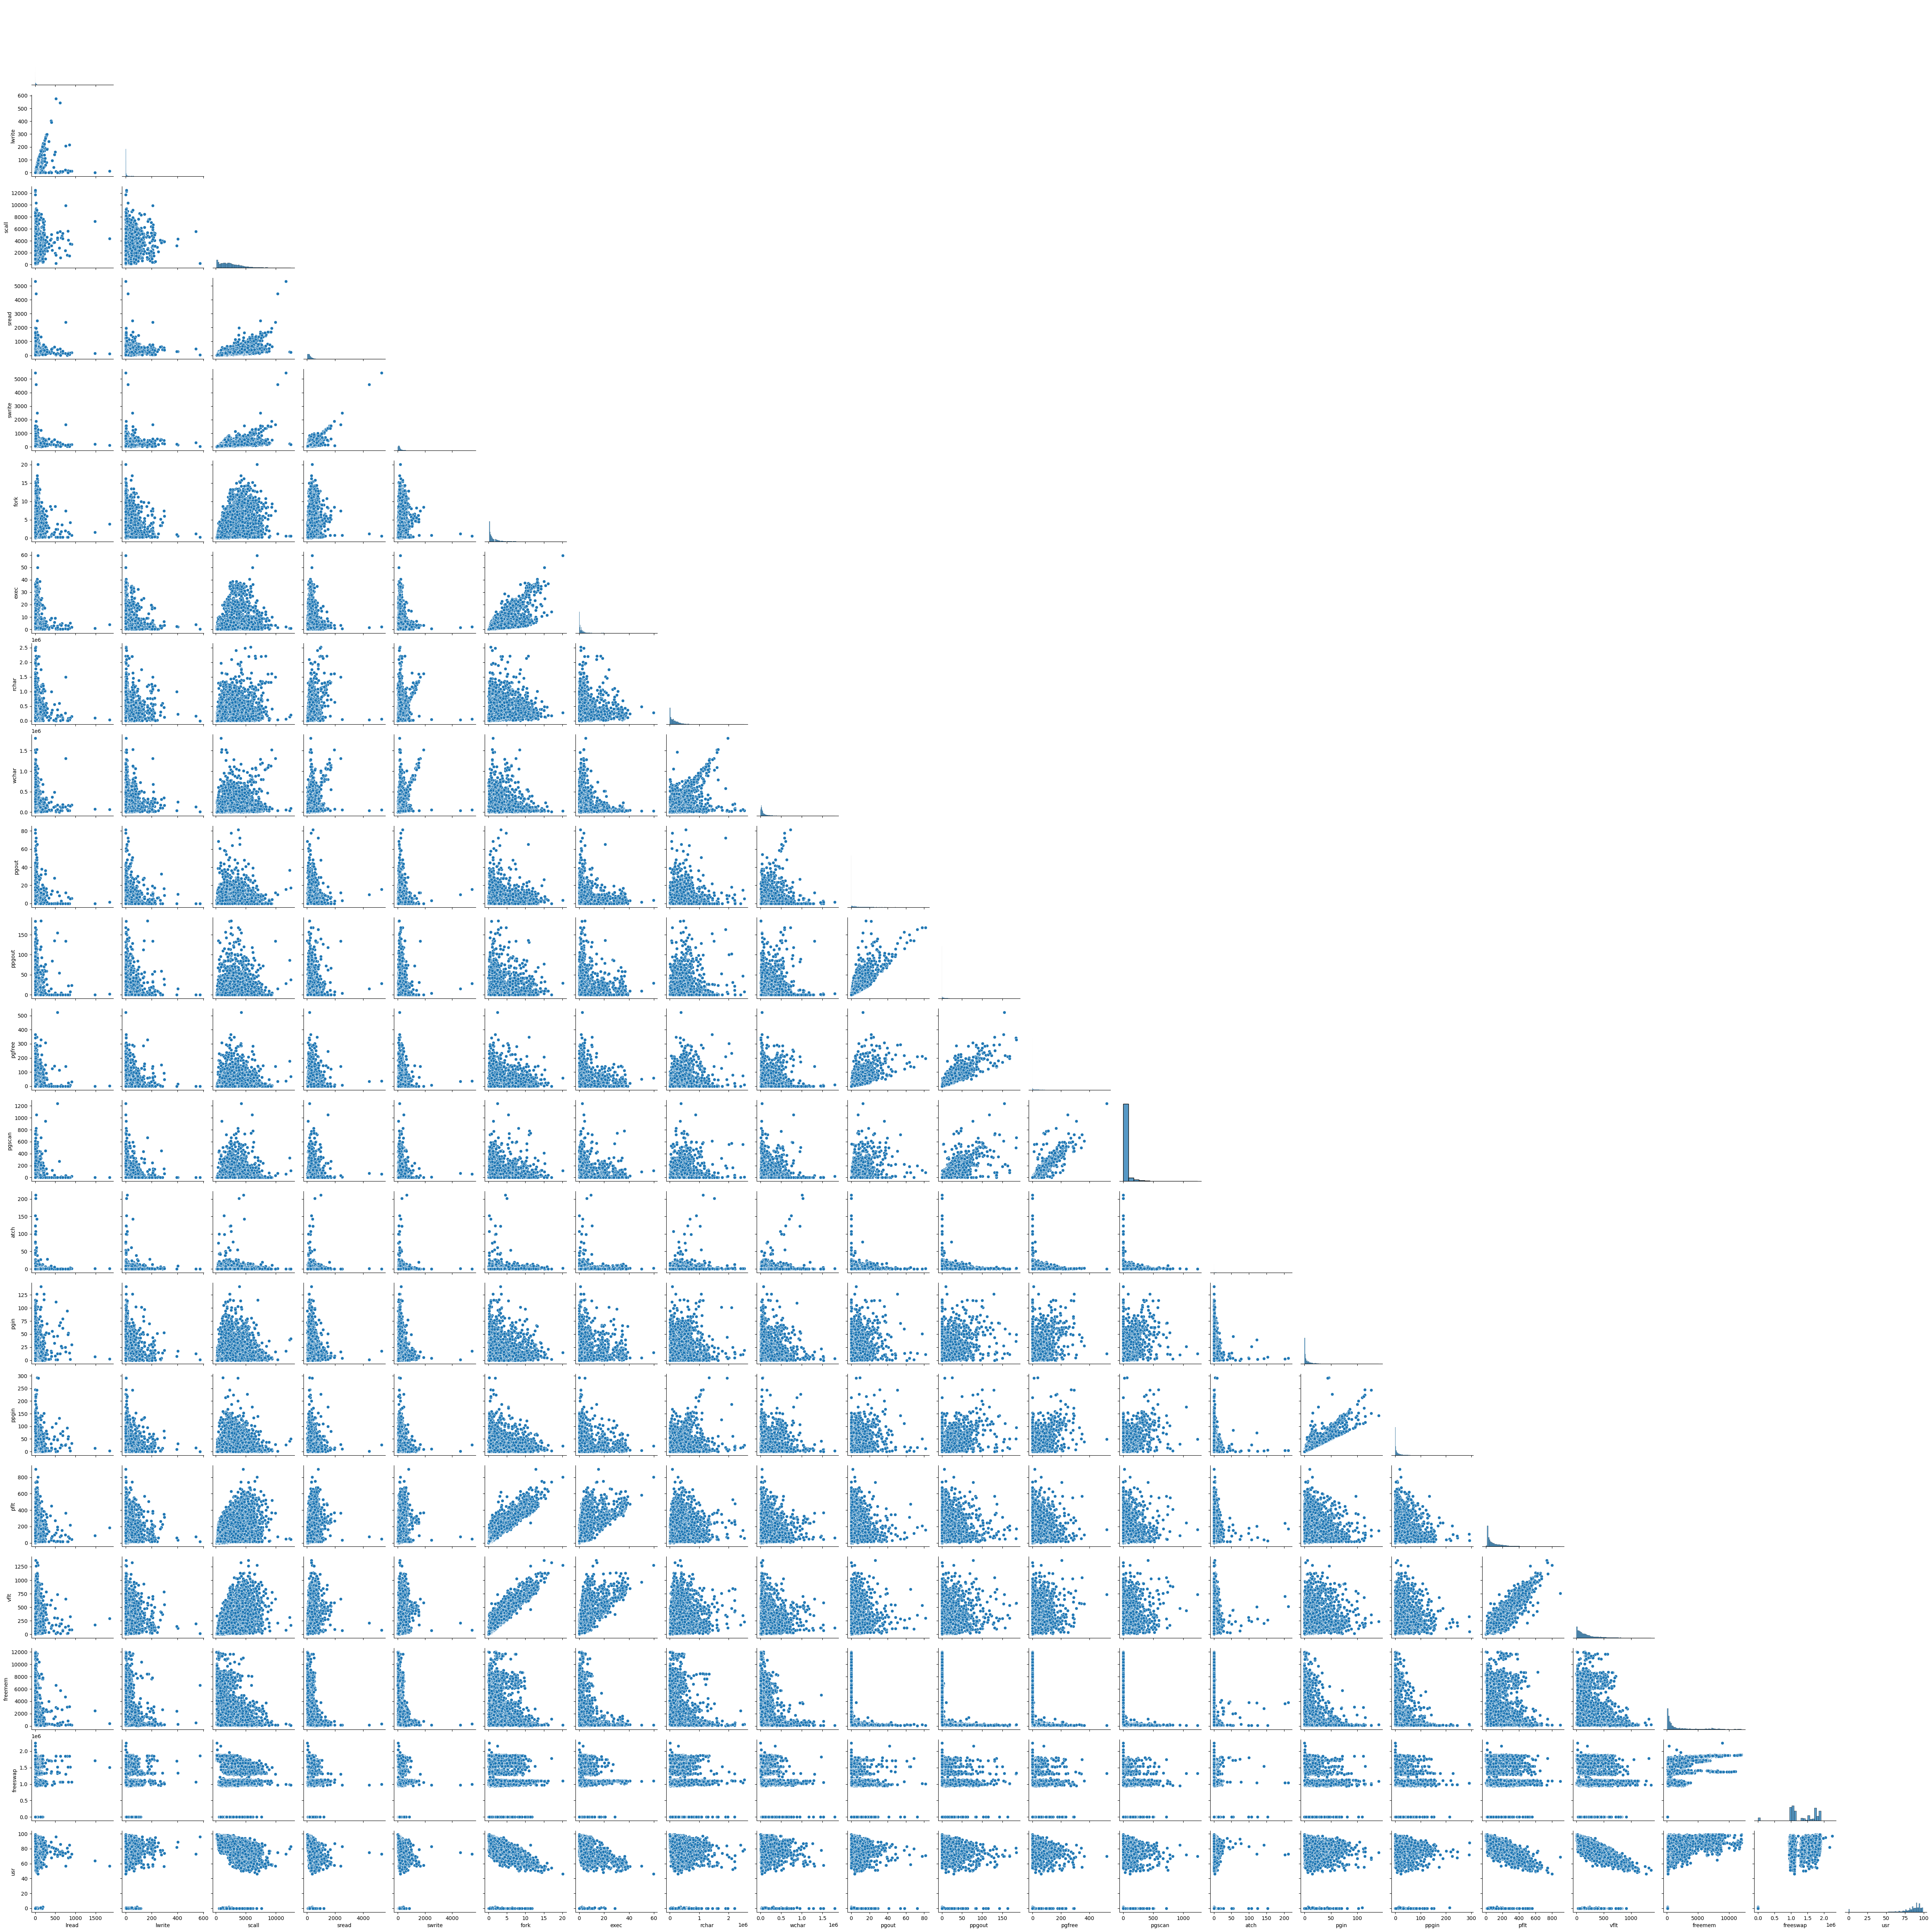

heatmap


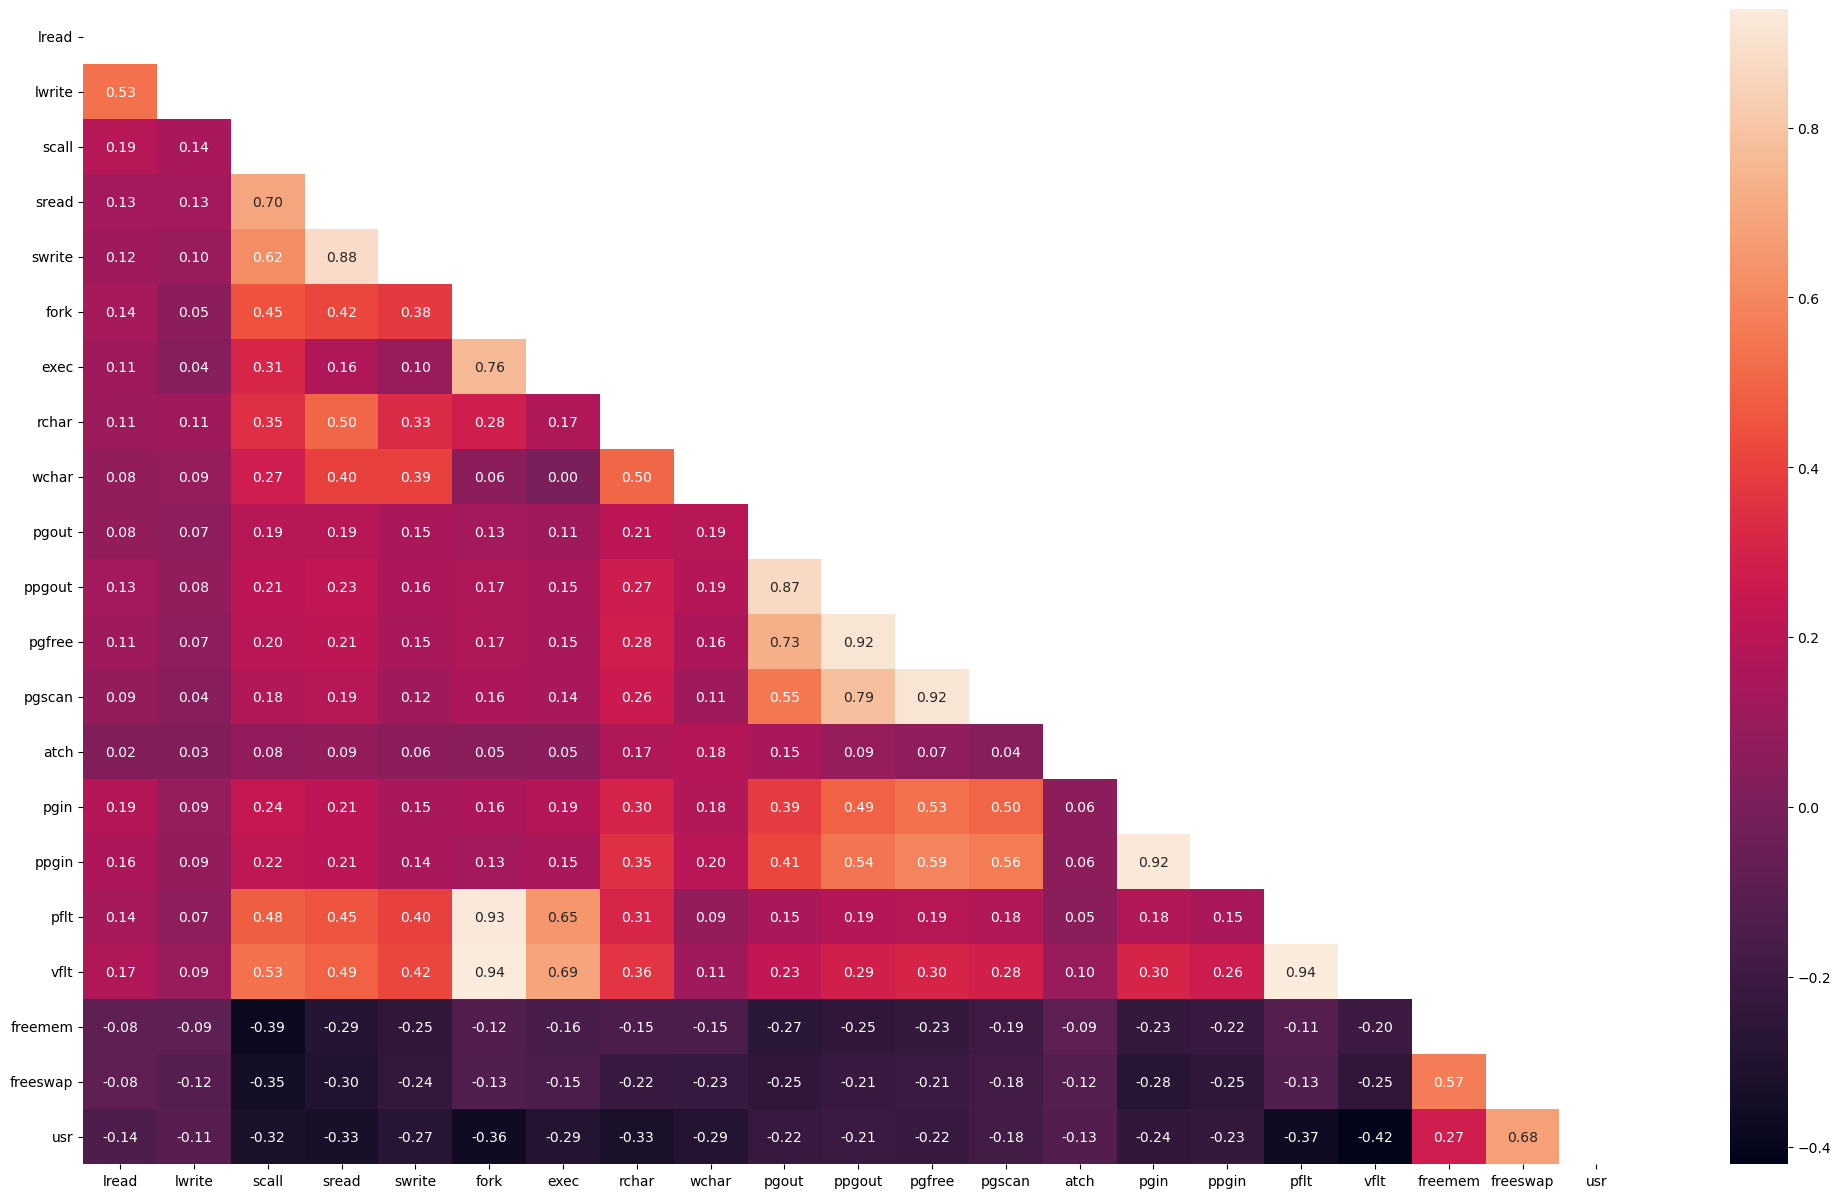

In [189]:
cpu_num = cpu_data.select_dtypes(include = 'number')
bivariate_num_num(cpu_data, cpu_num)

#### Key Observations
1. From the pairplot we can conclude that there is correlation between more than 1 pair of attributes, to understand exact magnitude we will have to look at heatmap.
2. Based we can say that with 'usr' which is the attribute of interest for us there is some negative correlation with 'fork', 'pflt' and 'vflt'.
3. From the heatmap we can conclude that 'freeswap' has the highest correlation with 'usr' which is moderately strong at 0.68.
4. For multiple pairs correlation is above 0.9 meaning that these attributes are highly correlated to each other, also there are pairs like 'pgscan' and 'ppgout' or 'swrite' and 'iwrite' that have correlation around or over 0.8. While applying regression model we will have drop some of these variables depending upon there effect on the model. 
#### Between Numeric and Categorical Columns

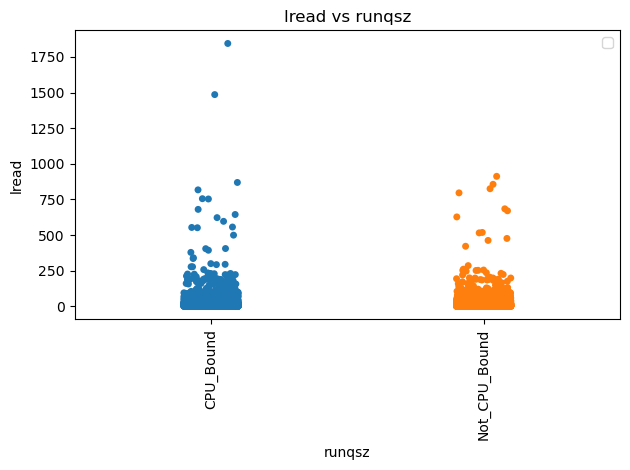

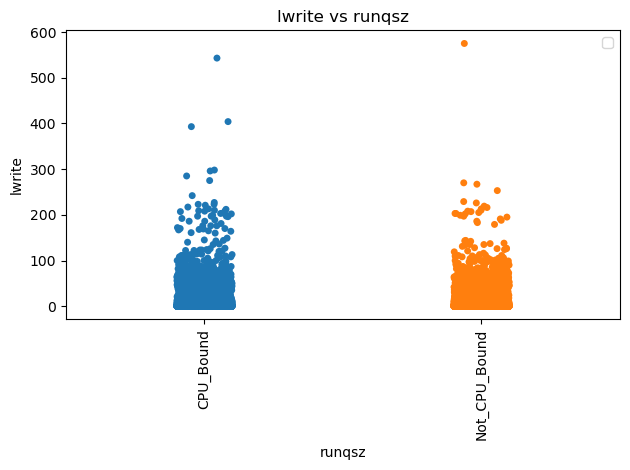

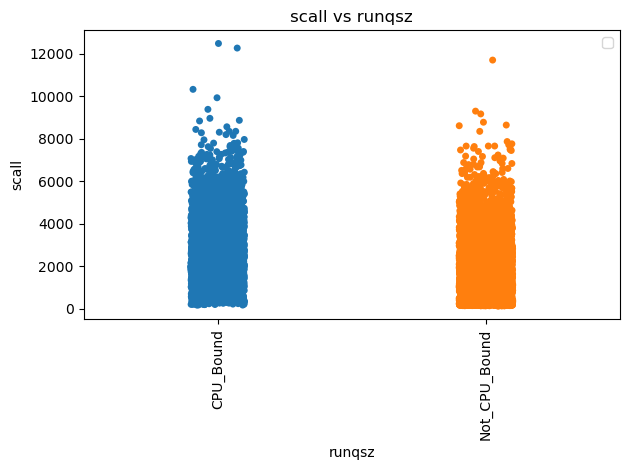

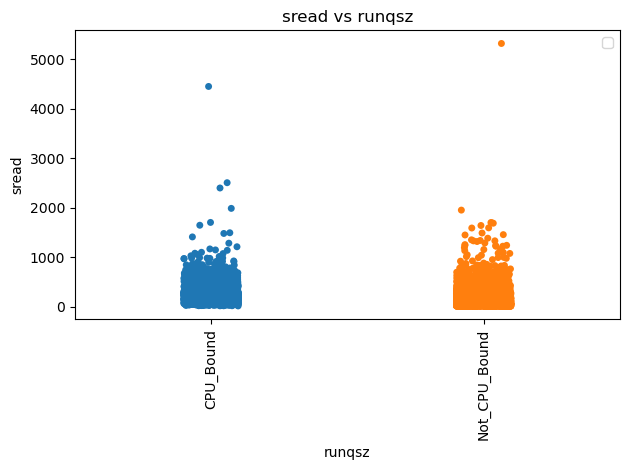

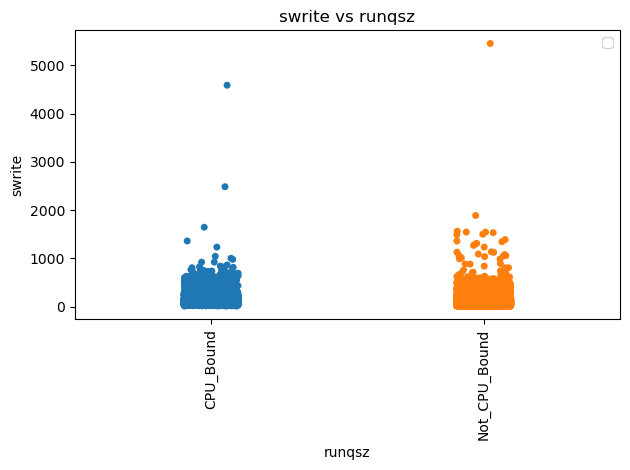

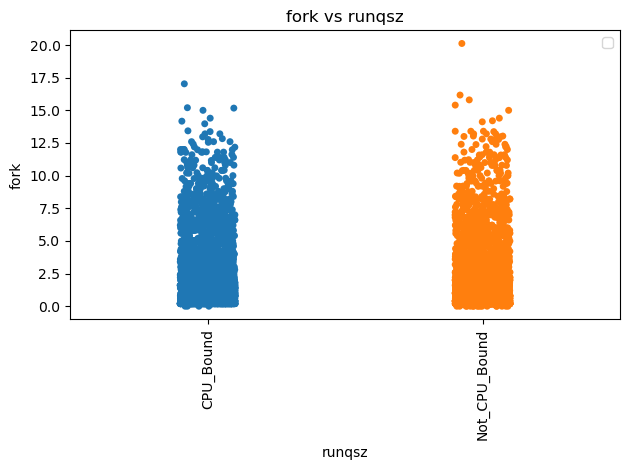

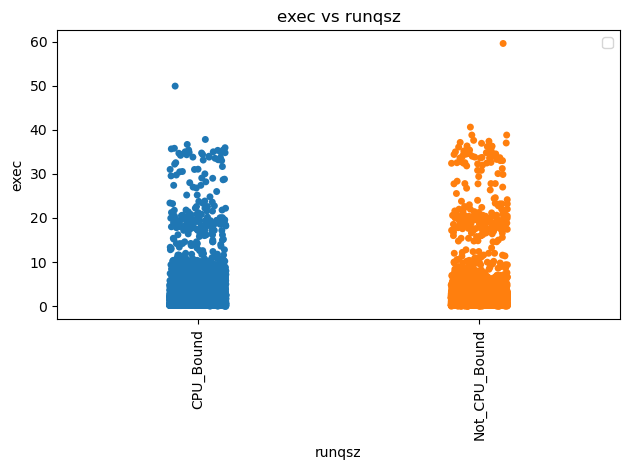

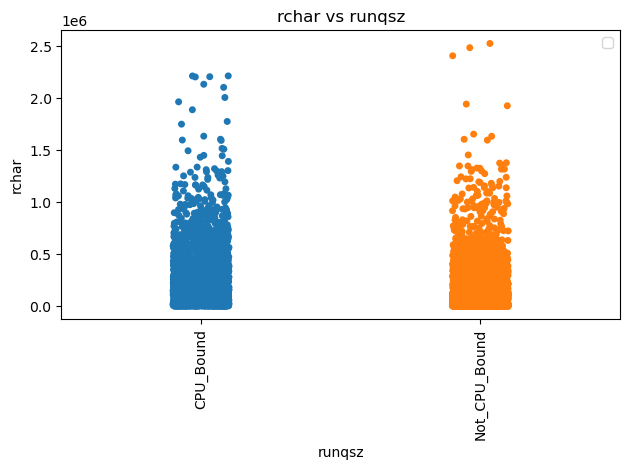

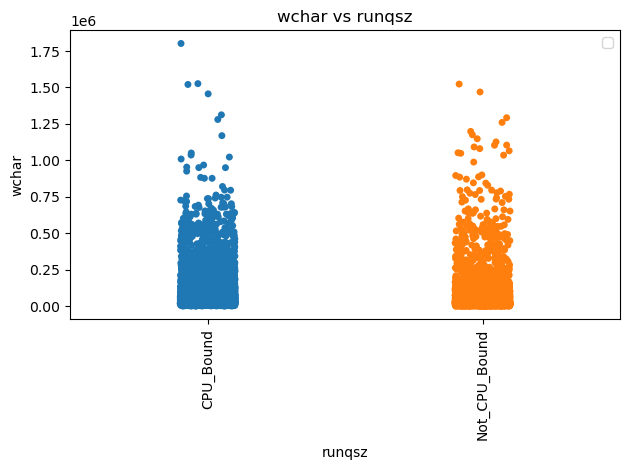

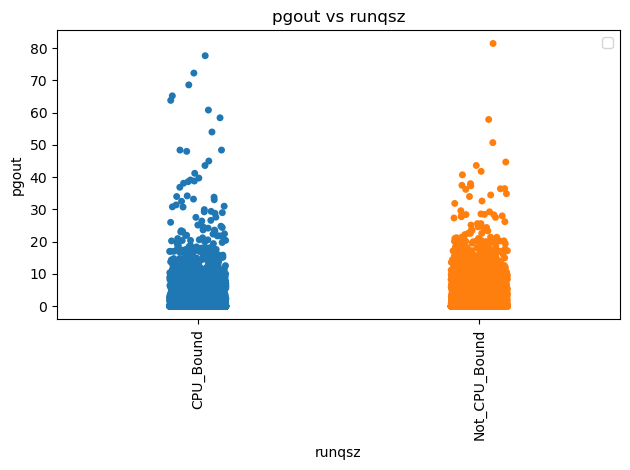

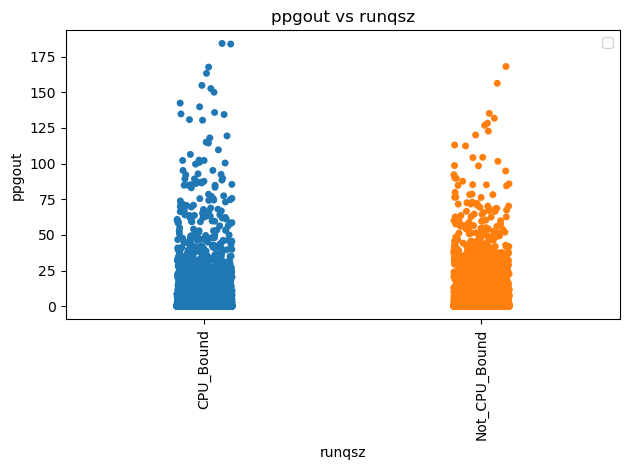

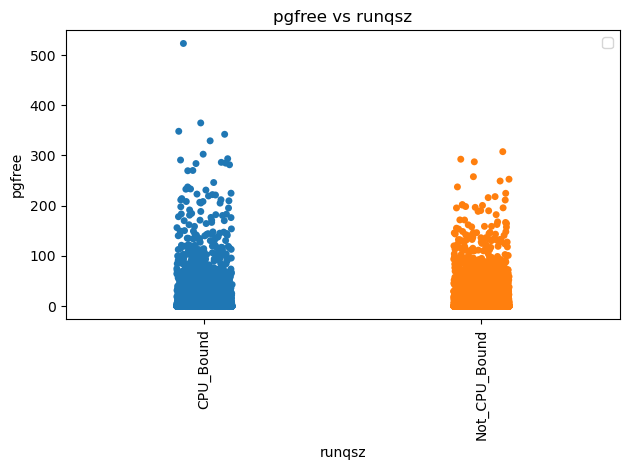

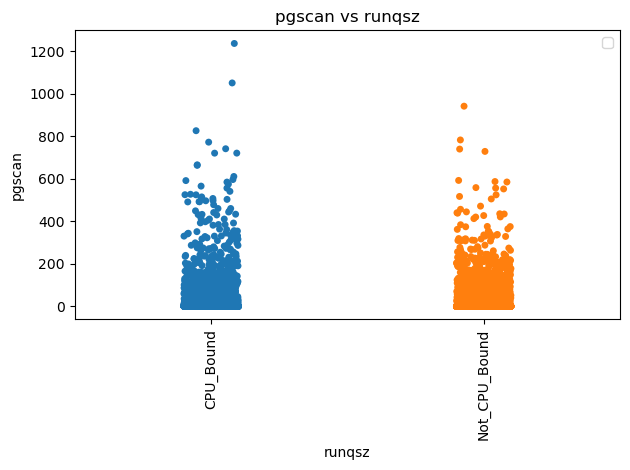

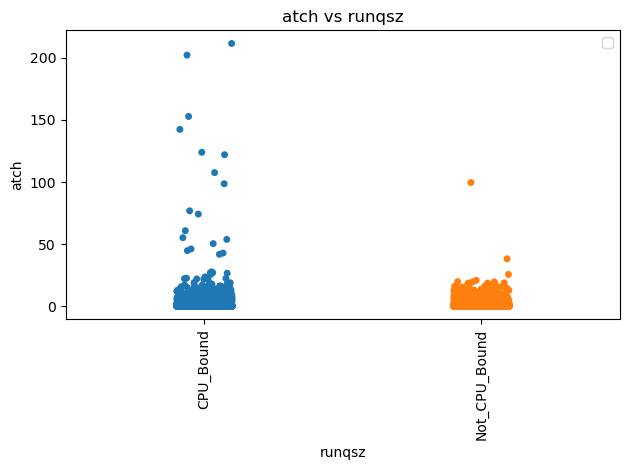

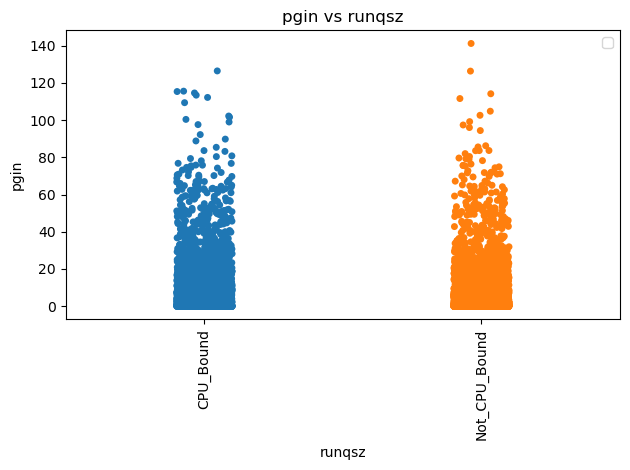

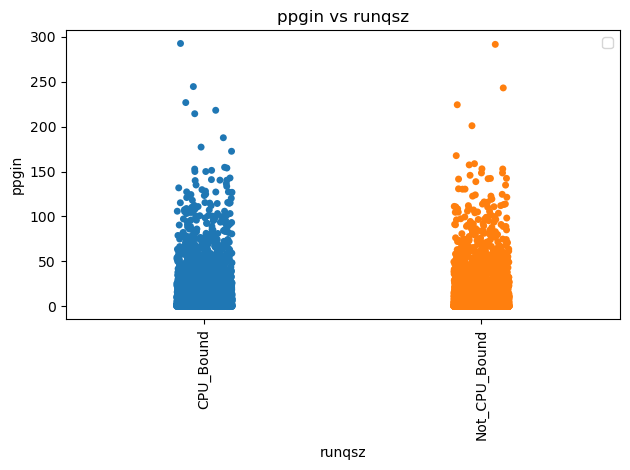

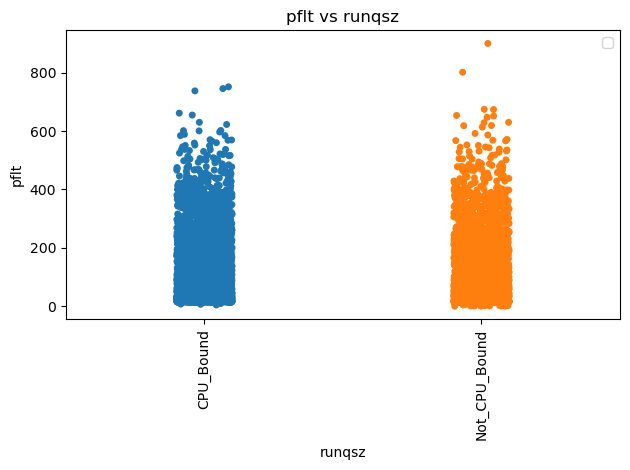

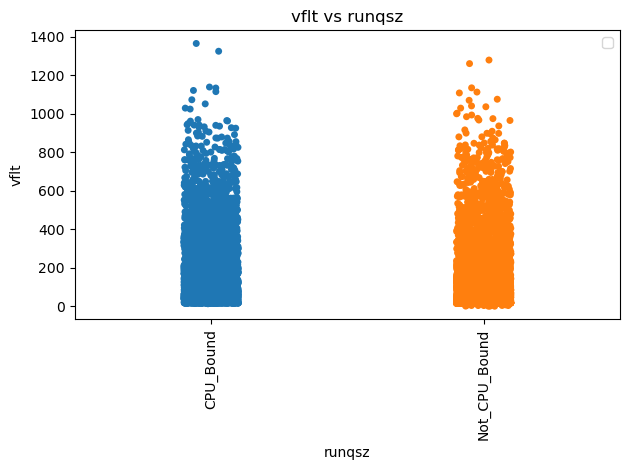

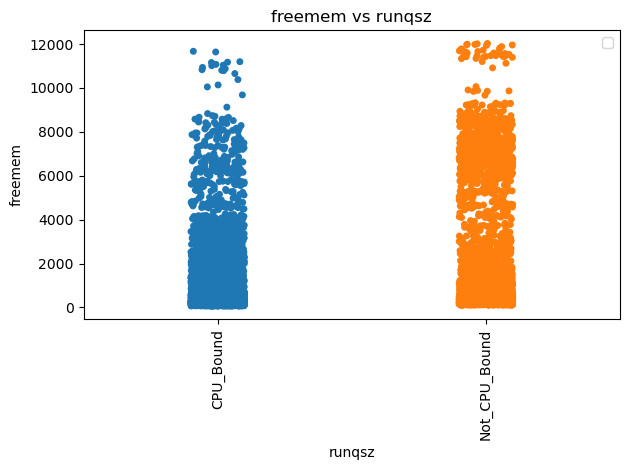

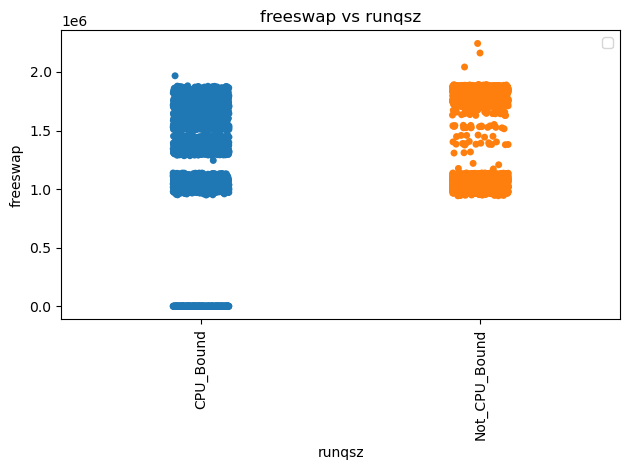

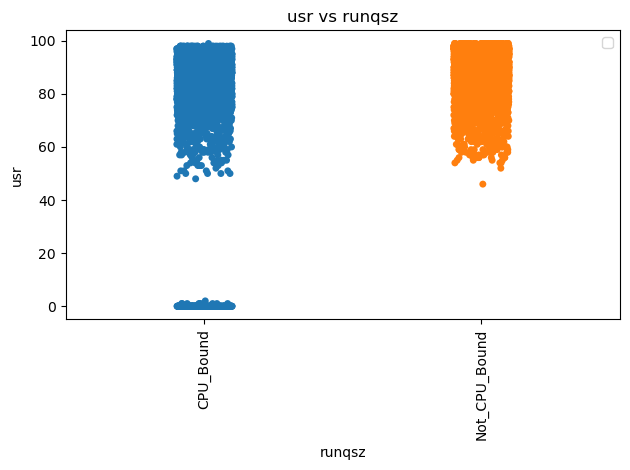

In [190]:
for column in cpu_num.columns:    
    sns.stripplot(data = cpu_data, x= 'runqsz', y=column, hue = cpu_data['runqsz'])
    plt.title(f'{column} vs runqsz')
    plt.xticks(rotation=90)  # Rotate x-axis tick labels
    plt.legend('')

    # Adjust layout
    plt.tight_layout()
    plt.show()

#### Key Observations
1. For most dependent variables, the data spread with respect to both types of 'runqsz' is very similar. However, for variables like 'freemem' and 'freeswap,' there are ranges where one type of 'runqsz' shows a higher probability of occurrence.
2. Plot for 'runsqz' with 'usr' which is the variable of interest, for higher 'usr' values it is difficult to diffrentiate for the type of 'runsqz', however, for CPU_Bound type 'runsqz' only there are cases when 'usr' value is 0.

## Outlier Treatment and Data Encoding
### Outlier Treatment
In the dataset all the numeric attributes are continuous in nature, we will apply outlier treatment to all of them.
For outlier treatment we will be imputing 95 percentile and 5 percentile values where ever the value are above or below these values. 

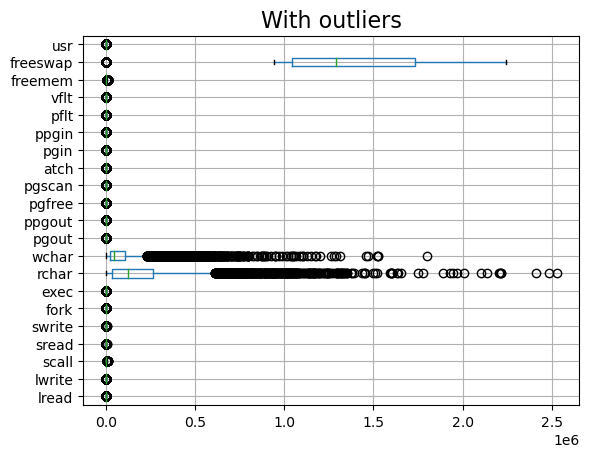

In [191]:
cpu_data.boxplot(vert = 0)
plt.title('With outliers', fontsize = 16)
plt.show()

In [192]:
def treat_outlier(x):
    # taking 25,75 percentile of column
    q5=np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    q95=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: q95 if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [193]:
cpu_dataV1 = cpu_data.copy()
for column in cpu_dataV1.select_dtypes(include='number').columns:
    cpu_dataV1[column]= treat_outlier(cpu_dataV1[column])

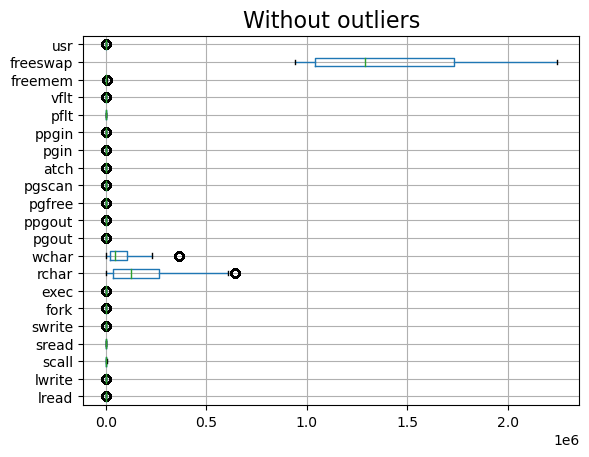

In [194]:
cpu_dataV1.boxplot(vert = 0)
plt.title('Without outliers', fontsize = 16)
plt.show()

We have bought down the outliers in the data. Now we will check the statistical summary of outlier treated data.

In [195]:
cpu_dataV1.describe().T

count          mean            std       min         25%  \
lread     8192.0  1.535315e+01      19.906684       0.0        2.00   
lwrite    8192.0  1.318884e+01      23.476119       0.0        0.00   
scall     8192.0  2.275905e+03    1548.314358     109.0     1012.00   
sread     8192.0  1.983030e+02     143.183957       6.0       86.00   
swrite    8192.0  1.394474e+02     100.748445       7.0       63.00   
fork      8192.0  1.845552e+00       2.256676       0.0        0.40   
exec      8192.0  2.355225e+00       3.169813       0.0        0.20   
rchar     8192.0  1.807894e+05  179413.699828     278.0    34860.50   
wchar     8192.0  8.873716e+04  103363.970386    1498.0    22977.75   
pgout     8192.0  2.074583e+00       3.734222       0.0        0.00   
ppgout    8192.0  6.076866e+00      11.696273       0.0        0.00   
pgfree    8192.0  1.413425e+01      27.264212       0.0        0.00   
pgscan    8192.0  2.891874e+01      55.609014       0.0        0.00   
atch      8192.0  9.048193e-01       1.734013       0.0        0.00   
pgin      8192.0  7.571747e+00      10.625813       0.0        0.60   
ppgin     8192.0  1.116287e+01      16.131988       0.0        0.60   
pflt      8192.0  1.054311e+02     101.035174       0.0       25.00   
vflt      8192.0  1.775772e+02     167.255745       0.2       45.40   
freemem   8192.0  1.808360e+03    2525.575412      55.0      231.00   
freeswap  8192.0  1.362932e+06  343780.143354  942600.0  1042623.50   
usr       8192.0  8.616748e+01       9.952090      60.0       81.00   

                50%          75%           max  
lread           7.0       20.000  6.800000e+01  
lwrite          1.0       10.000  6.600000e+01  
scall        2051.5     3317.250  6.768000e+03  
sread         166.0      279.000  5.680000e+02  
swrite        117.0      185.000  3.924500e+02  
fork            0.8        2.200  7.400000e+00  
exec            1.2        2.800  1.158900e+01  
rchar      125473.5   265394.750  6.447618e+05  
wchar       46619.0   106037.000  3.618946e+05  
pgout           0.0        2.400  1.142000e+01  
ppgout          0.0        4.200  3.240450e+01  
pgfree          0.0        5.000  7.029000e+01  
pgscan          0.0        0.000  1.358385e+02  
atch            0.0        0.600  5.000000e+00  
pgin            2.8        9.765  3.583150e+01  
ppgin           3.8       13.800  5.378000e+01  
pflt           63.8      159.600  3.612800e+02  
vflt          120.4      251.800  5.944845e+02  
freemem       579.0     2002.250  7.567700e+03  
freeswap  1289289.5  1730379.500  2.243187e+06  
usr            89.0       94.000  9.900000e+01

### Data Encoding

In [196]:
cpu_dataV1 = pd.get_dummies(cpu_dataV1, drop_first= True).astype('int')

In [197]:
cpu_dataV1.head()

lread  lwrite  scall  sread  swrite  fork  exec   rchar  wchar  pgout  ...  \
0      1       0   2147     79      68     0     0   40671  53995      0  ...   
1      0       0    170     18      21     0     0     448   8385      0  ...   
2     15       3   2162    159     119     2     2  125473  31950      0  ...   
3      0       0    160     12      16     0     0  125473   8670      0  ...   
4      5       1    330     39      38     0     0  125473  12185      0  ...   

   pgscan  atch  pgin  ppgin  pflt  vflt  freemem  freeswap  usr  \
0       0     0     1      2    16    26     7567   1730946   95   
1       0     0     0      0    15    16     7567   1869002   97   
2       0     1     6      9   150   220      702   1021237   87   
3       0     0     0      0    15    16     7567   1863704   98   
4       0     0     1      1    37    47      633   1760253   90   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 22 columns]

## Splitting Data

In [198]:
# Seprating target data and independent variables
X = cpu_dataV1.drop('usr', axis = 1)
Y = cpu_dataV1['usr']

In [199]:
# splitting data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 7)

In [200]:
# taking a glimpse of train data
X_train.head()

lread  lwrite  scall  sread  swrite  fork  exec   rchar   wchar  pgout  \
1305      9       2   2128    113      84     1     1   16656   25126      0   
6407      0       0    230     35      14     0     0  169196    5037      0   
961       1       1    166     10      13     0     0    7601   43378      0   
4988      1       0   1930    113     128     0     0  134171  361894      1   
3017     68      66   4083    309     198     7    11  644761  139522     11   

      ...  pgfree  pgscan  atch  pgin  ppgin  pflt  vflt  freemem  freeswap  \
1305  ...      70     135     0     2      3    68   116      128   1105893   
6407  ...       0       0     0     0      0    15    16     7567   1869339   
961   ...       0       0     0     0      0     0     3     7567   1854920   
4988  ...      70     135     0     5     10    55    27      136   1539870   
3017  ...      70     135     1    35     53   203   503      172   1095856   

      runqsz_Not_CPU_Bound  
1305                     0  
6407                     1  
961                      1  
4988                     0  
3017                     0  

[5 rows x 21 columns]

In [201]:
# taking a glimpse of test data
X_test.head()

lread  lwrite  scall  sread  swrite  fork  exec   rchar   wchar  pgout  \
3566      7       0   4049    261     244     0     0  270608  186598      3   
899      12      12   2479    297     168     0     1  644761  361894      4   
2406      7       0   2144    344     296     7     1  203939   12761      0   
5447      2       0   1861    223     120     0     0  232693   29510      0   
6215      2       1    837     42      50     0     0    3692   32235      0   

      ...  pgfree  pgscan  atch  pgin  ppgin  pflt  vflt  freemem  freeswap  \
3566  ...      70     135     5     1      1    64   183      135   1528261   
899   ...       5       0     0    22     25    65   165      306   1014872   
2406  ...       0       0     0     0      0   311   448     7567   1846826   
5447  ...       0       0     0     4      4    56   136      434   1104610   
6215  ...       0       0     0     1      1    32   179      771   1032677   

      runqsz_Not_CPU_Bound  
3566                     0  
899                      1  
2406                     0  
5447                     0  
6215                     1  

[5 rows x 21 columns]

## Linear Regression Model
### Using Sklearn

In [202]:
regression_model1 = LinearRegression(n_jobs=-1)

In [203]:
regression_model1.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [204]:
# exploring the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {round(regression_model1.coef_[idx],3)}")

The coefficient for lread is -0.054
The coefficient for lwrite is 0.019
The coefficient for scall is -0.0
The coefficient for sread is -0.002
The coefficient for swrite is -0.006
The coefficient for fork is -0.175
The coefficient for exec is -0.318
The coefficient for rchar is -0.0
The coefficient for wchar is -0.0
The coefficient for pgout is -0.267
The coefficient for ppgout is 0.006
The coefficient for pgfree is 0.016
The coefficient for pgscan is -0.002
The coefficient for atch is 0.03
The coefficient for pgin is -0.059
The coefficient for ppgin is -0.011
The coefficient for pflt is -0.018
The coefficient for vflt is -0.011
The coefficient for freemem is 0.0
The coefficient for freeswap is 0.0
The coefficient for runqsz_Not_CPU_Bound is 2.01


In [205]:
# exploring intercept value for the model
print(f'The intercept for our model is {round(regression_model1.intercept_,3)}')

The intercept for our model is 89.058


In [206]:
def lr_performance_predictors(regression_model, x_data, y_data):
    print(f'{round(regression_model.score(x_data, y_data)*100,2)}% of the variance in {y_data.name} is explained by predictors in the model.')
    
    # rmse score
    pred_data = regression_model.fit(x_data, y_data).predict(x_data)
    print(f'rmse score is: {round(np.sqrt(mean_squared_error(y_data, pred_data)),3)}')
    
    # mae score of train data
    print(f'mae score is: {round(mean_absolute_error(y_data, pred_data),3)}')
    

In [207]:
lr_performance_predictors(regression_model1, X_train, y_train)

69.76% of the variance in usr is explained by predictors in the model.
rmse score is: 5.472
mae score is: 3.434


In [208]:
lr_performance_predictors(regression_model1, X_test, y_test)

70.33% of the variance in usr is explained by predictors in the model.
rmse score is: 5.387
mae score is: 3.35


69.76% of the variance in 'usr' is explained by predictors in the model for the train set and for test set it is 70.
33%. Since, there is not a major variation between test set and train set R squared values we can say that our model is not suffering from under-fitting or over-fitting and is stable. 

rmse and mae values for both test and train data are also similar meaning we have a stable model. But we will now optimize the model by checking it for significant variables using statsmodel to make it more generalised and simple.
### Using Statsmodel

In [209]:
# adding intercept to X
X=  sm.add_constant(X)
# splitting data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 7)

In [210]:
# defining the model
ols_mod = sm.OLS(y_train, X_train)
# fitting the model
ols_res = ols_mod.fit()
# displaying model summary
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     717.5
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:53:52   Log-Likelihood:                -20436.
No. Observations:                6553   AIC:                         4.092e+04
Df Residuals:                    6531   BIC:                         4.106e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   89.0584      0.486    183.077      0.000      88.105      90.012
lread                   -0.0536      0.007     -7.773      0.000      -0.067      -0.040
lwrite                   0.0191      0.005      3.606      0.000       0.009       0.029
scall                   -0.0005   7.65e-05     -6.441      0.000      -0.001      -0.000
sread                   -0.0016      0.001     -1.294      0.196      -0.004       0.001
swrite                  -0.0058      0.002     -3.657      0.000      -0.009      -0.003
fork                    -0.1750      0.091     -1.930      0.054      -0.353       0.003
exec                    -0.3180      0.035     -8.983      0.000      -0.387      -0.249
rchar                -5.023e-06   5.41e-07     -9.281      0.000   -6.08e-06   -3.96e-06
wchar                -6.421e-06   8.13e-07     -7.895      0.000   -8.02e-06   -4.83e-06
pgout                   -0.2674      0.040     -6.637      0.000      -0.346      -0.188
ppgout                   0.0065      0.018      0.369      0.712      -0.028       0.041
pgfree                   0.0162      0.007      2.193      0.028       0.002       0.031
pgscan                  -0.0018      0.002     -0.748      0.454      -0.006       0.003
atch                     0.0302      0.045      0.665      0.506      -0.059       0.119
pgin                    -0.0587      0.020     -3.010      0.003      -0.097      -0.020
ppgin                   -0.0107      0.013     -0.828      0.408      -0.036       0.015
pflt                    -0.0185      0.002     -8.397      0.000      -0.023      -0.014
vflt                    -0.0110      0.002     -6.897      0.000      -0.014      -0.008
freemem                  0.0001   3.75e-05      3.190      0.001    4.62e-05       0.000
freeswap              4.183e-06   2.96e-07     14.141      0.000     3.6e-06    4.76e-06
runqsz_Not_CPU_Bound     2.0102      0.149     13.477      0.000       1.718       2.303
==============================================================================
Omnibus:                     3755.895   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34109.326
Skew:                          -2.646   Prob(JB):                         0.00
Kurtosis:                      12.844   Cond. No.                     1.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model created using Statsmodel has R squared value of 0.698, meaning model could explain 69.8% variance in the train set. However, there is multicollinearity in the data which we already knew from the heatmap, we have check the multicollinearity using VIF score. 

In [211]:
# checking VIF score for X_train
vif_series = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])], index = X_train.columns)
print(vif_series)

const                   51.621156
lread                    4.088893
lwrite                   3.391719
scall                    3.071692
sread                    6.566072
swrite                   5.538006
fork                     8.986569
exec                     2.616221
rchar                    2.119306
wchar                    1.556212
pgout                    4.633536
ppgout                   9.068261
pgfree                   8.937199
pgscan                   3.818786
atch                     1.399699
pgin                     9.108703
ppgin                    9.349767
pflt                    10.751295
vflt                    15.463960
freemem                  1.932632
freeswap                 2.256698
runqsz_Not_CPU_Bound     1.209473
dtype: float64


VIF score is a measure of multicollinearity where closer the VIF value is to 1, the lower is the multicollinearity. For a regression model a VIF value of upto 5 is acceptable as it means a moderate multicollinearity, a score above between 5 and 10 means high multicollinearity and above 10 is strong multicollinearity, for our data VIF scores for many variables are above 5 
and for some even above 10. 

Moving forward, we will begin by examining the impact on adjusted R-squared values when we drop variables one at a time starting with variables from the X_train data that have a VIF score above 10. We will permanently drop the variable that causes the least change in the adjusted R-squared value. We will repeat this process until the VIF scores for all remaining variables in the model are below 5.

In [212]:
X_train1 = X_train.drop('pflt', axis = 1)
ols_mod1 = sm.OLS(y_train, X_train1)
ols_res1 = ols_mod1.fit()
print('R-squared: ', np.round(ols_res1.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res1.rsquared_adj,3))

R-squared:  0.694 
 Adj. R-squared:  0.693


In [213]:
X_train2 = X_train.drop('vflt', axis = 1)
ols_mod2 = sm.OLS(y_train, X_train2)
ols_res2 = ols_mod2.fit()
print('R-squared: ', np.round(ols_res2.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res2.rsquared_adj,3))

R-squared:  0.695 
 Adj. R-squared:  0.694


In [214]:
# checking VIF score for X_train2
vif_series1 = pd.Series([variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])], index = X_train2.columns)
print(vif_series1)

const                   48.409112
lread                    4.070885
lwrite                   3.389632
scall                    3.065448
sread                    6.525882
swrite                   5.537675
fork                     7.053558
exec                     2.612989
rchar                    2.105775
wchar                    1.541636
pgout                    4.633047
ppgout                   9.068252
pgfree                   8.927915
pgscan                   3.816398
atch                     1.396328
pgin                     9.027206
ppgin                    9.340858
pflt                     6.827527
freemem                  1.925660
freeswap                 2.123213
runqsz_Not_CPU_Bound     1.207331
dtype: float64


On dropping 'vflt' there is no impact on adjusted R-squared value, however, VIF score has gotten below 10 for all the variables. We will repeat the above step again for all the variables whose VIF score is above 5 and the drop one variable at a time permanently and then recheck the VIF scores till they become lower than 5 for all the remaining variables.

In [215]:
X_train3 = X_train2.drop('sread', axis = 1)
ols_mod3 = sm.OLS(y_train, X_train3)
ols_res3 = ols_mod3.fit()
print('R-squared: ', np.round(ols_res3.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res3.rsquared_adj,3))

R-squared:  0.695 
 Adj. R-squared:  0.694


In [216]:
X_train4 = X_train2.drop('swrite', axis = 1)
ols_mod4 = sm.OLS(y_train, X_train4)
ols_res4 = ols_mod4.fit()
print('R-squared: ', np.round(ols_res4.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res4.rsquared_adj,3))

R-squared:  0.695 
 Adj. R-squared:  0.694


In [217]:
X_train5 = X_train2.drop('fork', axis = 1)
ols_mod5 = sm.OLS(y_train, X_train5)
ols_res5 = ols_mod5.fit()
print('R-squared: ', np.round(ols_res5.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res5.rsquared_adj,3))

R-squared:  0.694 
 Adj. R-squared:  0.693


In [218]:
X_train6 = X_train2.drop('ppgout', axis = 1)
ols_mod6 = sm.OLS(y_train, X_train6)
ols_res6 = ols_mod6.fit()
print('R-squared: ', np.round(ols_res6.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res6.rsquared_adj,3))

R-squared:  0.695 
 Adj. R-squared:  0.695


In [219]:
X_train7 = X_train2.drop('pgfree', axis = 1)
ols_mod7 = sm.OLS(y_train, X_train7)
ols_res7 = ols_mod7.fit()
print('R-squared: ', np.round(ols_res7.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res7.rsquared_adj,3))

R-squared:  0.695 
 Adj. R-squared:  0.694


In [220]:
X_train8 = X_train2.drop('pgin', axis = 1)
ols_mod8 = sm.OLS(y_train, X_train8)
ols_res8 = ols_mod8.fit()
print('R-squared: ', np.round(ols_res8.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res8.rsquared_adj,3))

R-squared:  0.695 
 Adj. R-squared:  0.694


In [221]:
X_train9 = X_train2.drop('ppgin', axis = 1)
ols_mod9 = sm.OLS(y_train, X_train9)
ols_res9 = ols_mod9.fit()
print('R-squared: ', np.round(ols_res9.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res9.rsquared_adj,3))

R-squared:  0.695 
 Adj. R-squared:  0.694


In [222]:
X_train10 = X_train2.drop('pflt', axis = 1)
ols_mod10 = sm.OLS(y_train, X_train10)
ols_res10 = ols_mod10.fit()
print('R-squared: ', np.round(ols_res10.rsquared,3),
      '\n Adj. R-squared: ', np.round(ols_res10.rsquared_adj,3))

R-squared:  0.684 
 Adj. R-squared:  0.683


Based on the above data we found that on dropping 'ppgout' adjusted R-squared value has actually increased so we will drop it and check the VIF values for the remaining variables.

In [223]:
# checking VIF score for X_train6
vif_series2 = pd.Series([variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])], index = X_train6.columns)
print(vif_series2)

const                   48.391373
lread                    4.068896
lwrite                   3.387931
scall                    3.064323
sread                    6.518057
swrite                   5.532585
fork                     7.049200
exec                     2.610828
rchar                    2.105766
wchar                    1.540112
pgout                    3.042497
pgfree                   5.765252
pgscan                   3.804041
atch                     1.394751
pgin                     9.009942
ppgin                    9.282645
pflt                     6.820004
freemem                  1.925646
freeswap                 2.122875
runqsz_Not_CPU_Bound     1.207213
dtype: float64


Sine the VIF values are still above 5 for many variables we will continue to delete the variables, one at a time, which have the highest VIF value while the effect on adjusted R-squared value is lowest and check the VIF value after dropping each variable. In case a variable has higher VIF score but there is a decline in adjusted R-squared value on dropping that variable which we can know from the adjusted R-squared value available above, in that scenerio we will not drop that variable. 

In [224]:
X_train11 = X_train6.drop('ppgin', axis = 1)
# checking VIF score for X_train1
vif_series3 = pd.Series([variance_inflation_factor(X_train11.values, i) for i in range(X_train11.shape[1])], index = X_train11.columns)
print(vif_series3)

const                   48.308354
lread                    4.054406
lwrite                   3.381907
scall                    3.064199
sread                    6.512973
swrite                   5.529836
fork                     7.037804
exec                     2.610625
rchar                    2.086766
wchar                    1.539317
pgout                    3.041104
pgfree                   5.738482
pgscan                   3.796429
atch                     1.394742
pgin                     1.501252
pflt                     6.818683
freemem                  1.925643
freeswap                 2.120837
runqsz_Not_CPU_Bound     1.205560
dtype: float64


In [225]:
X_train12 = X_train11.drop('sread', axis = 1)
# checking VIF score for X_train1
vif_series4 = pd.Series([variance_inflation_factor(X_train12.values, i) for i in range(X_train12.shape[1])], index = X_train12.columns)
print(vif_series4)

const                   47.924966
lread                    4.053734
lwrite                   3.381318
scall                    2.809605
swrite                   3.134969
fork                     7.037673
exec                     2.606037
rchar                    1.687724
wchar                    1.531909
pgout                    3.041089
pgfree                   5.737920
pgscan                   3.795325
atch                     1.392375
pgin                     1.499984
pflt                     6.806259
freemem                  1.925160
freeswap                 2.098539
runqsz_Not_CPU_Bound     1.205258
dtype: float64


In [226]:
X_train13 = X_train12.drop('pgfree', axis = 1)
# checking VIF score for X_train12
vif_series5 = pd.Series([variance_inflation_factor(X_train13.values, i) for i in range(X_train13.shape[1])], index = X_train13.columns)
print(vif_series5)

const                   47.792486
lread                    4.051630
lwrite                   3.379500
scall                    2.809604
swrite                   3.134853
fork                     7.037100
exec                     2.602730
rchar                    1.687717
wchar                    1.530952
pgout                    2.129320
pgscan                   1.884338
atch                     1.392073
pgin                     1.491029
pflt                     6.805756
freemem                  1.925159
freeswap                 2.095575
runqsz_Not_CPU_Bound     1.205255
dtype: float64


In [227]:
X_train14 = X_train13.drop('fork', axis = 1)
# checking VIF score for X_train1
vif_series6 = pd.Series([variance_inflation_factor(X_train14.values, i) for i in range(X_train14.shape[1])], index = X_train14.columns)
print(vif_series6)

const                   46.701886
lread                    4.046324
lwrite                   3.370343
scall                    2.750611
swrite                   2.919208
exec                     2.335108
rchar                    1.687407
wchar                    1.512534
pgout                    2.129013
pgscan                   1.883239
atch                     1.389191
pgin                     1.488959
pflt                     2.929465
freemem                  1.924455
freeswap                 2.093056
runqsz_Not_CPU_Bound     1.203833
dtype: float64


Finally, we have bought down the VIF values for all the attributes below 5, now we will again display the regression summary table.

In [228]:
ols_mod14 = sm.OLS(y_train, X_train14)
ols_res14 = ols_mod14.fit()
ols_res14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     985.3
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:53:54   Log-Likelihood:                -20482.
No. Observations:                6553   AIC:                         4.100e+04
Df Residuals:                    6537   BIC:                         4.110e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   88.5056      0.466    190.031      0.000      87.593      89.419
lread                   -0.0580      0.007     -8.397      0.000      -0.072      -0.044
lwrite                   0.0213      0.005      4.013      0.000       0.011       0.032
scall                   -0.0005   7.28e-05     -6.793      0.000      -0.001      -0.000
swrite                  -0.0094      0.001     -8.140      0.000      -0.012      -0.007
exec                    -0.3853      0.034    -11.446      0.000      -0.451      -0.319
rchar                -5.831e-06   4.86e-07    -11.995      0.000   -6.78e-06   -4.88e-06
wchar                -5.222e-06   8.07e-07     -6.470      0.000    -6.8e-06   -3.64e-06
pgout                   -0.2058      0.027     -7.487      0.000      -0.260      -0.152
pgscan                   0.0018      0.002      1.074      0.283      -0.001       0.005
atch                     0.0279      0.046      0.612      0.540      -0.061       0.117
pgin                    -0.0860      0.008    -10.832      0.000      -0.102      -0.070
pflt                    -0.0354      0.001    -30.636      0.000      -0.038      -0.033
freemem                9.91e-05   3.77e-05      2.628      0.009    2.52e-05       0.000
freeswap              4.696e-06   2.87e-07     16.376      0.000    4.13e-06    5.26e-06
runqsz_Not_CPU_Bound     2.0237      0.150     13.510      0.000       1.730       2.317
==============================================================================
Omnibus:                     3655.526   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32007.315
Skew:                          -2.567   Prob(JB):                         0.00
Kurtosis:                      12.532   Cond. No.                     9.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the regression summary table, another important parameter is the p-value. The p-value measures the hypothesis that the coefficient value for an attribute is actually 0. If the p-value is above 0.05, we are unable to reject this hypothesis and conclude that the specific variable has no significant effect on the dependent variable. In such cases, that particular attribute should be dropped. Since, in this case, there are multiple attributes with a p-value over 0.05, we will drop one attribute at a time, starting with the one with the highest p-value and moving down the order, checking the summary table for p-values after dropping each variable.

In [229]:
X_train15 = X_train14.drop('atch', axis = 1)
ols_mod15 = sm.OLS(y_train, X_train15)
ols_res15 = ols_mod15.fit()
ols_res15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     1056.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:53:54   Log-Likelihood:                -20482.
No. Observations:                6553   AIC:                         4.099e+04
Df Residuals:                    6538   BIC:                         4.110e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   88.5219      0.465    190.387      0.000      87.610      89.433
lread                   -0.0579      0.007     -8.385      0.000      -0.071      -0.044
lwrite                   0.0213      0.005      4.014      0.000       0.011       0.032
scall                   -0.0005   7.28e-05     -6.780      0.000      -0.001      -0.000
swrite                  -0.0094      0.001     -8.154      0.000      -0.012      -0.007
exec                    -0.3844      0.034    -11.431      0.000      -0.450      -0.318
rchar                -5.796e-06   4.83e-07    -12.007      0.000   -6.74e-06   -4.85e-06
wchar                -5.232e-06   8.07e-07     -6.484      0.000   -6.81e-06   -3.65e-06
pgout                   -0.2001      0.026     -7.750      0.000      -0.251      -0.149
pgscan                   0.0018      0.002      1.086      0.278      -0.001       0.005
pgin                    -0.0862      0.008    -10.880      0.000      -0.102      -0.071
pflt                    -0.0354      0.001    -30.656      0.000      -0.038      -0.033
freemem                9.79e-05   3.77e-05      2.600      0.009    2.41e-05       0.000
freeswap              4.688e-06   2.86e-07     16.365      0.000    4.13e-06    5.25e-06
runqsz_Not_CPU_Bound     2.0246      0.150     13.518      0.000       1.731       2.318
==============================================================================
Omnibus:                     3654.880   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31991.516
Skew:                          -2.567   Prob(JB):                         0.00
Kurtosis:                      12.530   Cond. No.                     9.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [230]:
X_train16 = X_train15.drop('pgscan', axis = 1)
ols_mod16 = sm.OLS(y_train, X_train16)
ols_res16 = ols_mod16.fit()
ols_res16.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     1137.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:53:54   Log-Likelihood:                -20482.
No. Observations:                6553   AIC:                         4.099e+04
Df Residuals:                    6539   BIC:                         4.109e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   88.5517      0.464    190.781      0.000      87.642      89.462
lread                   -0.0578      0.007     -8.367      0.000      -0.071      -0.044
lwrite                   0.0212      0.005      3.994      0.000       0.011       0.032
scall                   -0.0005   7.28e-05     -6.792      0.000      -0.001      -0.000
swrite                  -0.0094      0.001     -8.132      0.000      -0.012      -0.007
exec                    -0.3829      0.034    -11.394      0.000      -0.449      -0.317
rchar                -5.775e-06   4.82e-07    -11.972      0.000   -6.72e-06   -4.83e-06
wchar                -5.312e-06   8.04e-07     -6.610      0.000   -6.89e-06   -3.74e-06
pgout                   -0.1850      0.022     -8.495      0.000      -0.228      -0.142
pgin                    -0.0847      0.008    -10.862      0.000      -0.100      -0.069
pflt                    -0.0354      0.001    -30.665      0.000      -0.038      -0.033
freemem               9.449e-05   3.75e-05      2.518      0.012    2.09e-05       0.000
freeswap              4.679e-06   2.86e-07     16.341      0.000    4.12e-06    5.24e-06
runqsz_Not_CPU_Bound     2.0244      0.150     13.516      0.000       1.731       2.318
==============================================================================
Omnibus:                     3657.115   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32036.727
Skew:                          -2.569   Prob(JB):                         0.00
Kurtosis:                      12.536   Cond. No.                     9.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Finally, we have optimised our model by bring the VIF scores for all the variables in the model below 5 and dropping the attributes which were not contributing towards the model.

We will build the regression model using X_final dataset which is made by dropping 'const' column as sklearn package has intercept by default, we will check for r square, rmse and mae value on test and train data on to understand stability of the model.

In [231]:
# dropping constant column
X_final = X_train16.drop('const', axis = 1)
# regression model using sklearn
regression_model2 = LinearRegression(n_jobs=-1)
regression_model2.fit(X_final, y_train)

LinearRegression(n_jobs=-1)

In [232]:
lr_performance_predictors(regression_model2, X_final, y_train)

69.33% of the variance in usr is explained by predictors in the model.
rmse score is: 5.511
mae score is: 3.467


In [233]:
X_test1 = pd.DataFrame()
for column in X_final.columns:
    X_test1[column] = X_test[column]

In [234]:
lr_performance_predictors(regression_model2, X_test1, y_test)

69.95% of the variance in usr is explained by predictors in the model.
rmse score is: 5.436
mae score is: 3.371


Since all the values are almost similar for both test and train data we can conclude that we have a stable model. However, in the model summary table above we had a very high condition number implying that there is still high multicollinearity present in the data which could have an adverse effect on the model, to overcome this we will apply PCA to original data (X) containing independent attributes.
### PCA
#### Data Scaling

In [235]:
from scipy.stats import zscore
X_scaled = cpu_dataV1.drop('usr', axis = 1).apply(zscore)
X_scaled.head()

lread    lwrite     scall     sread    swrite      fork      exec  \
0 -0.721066 -0.561833 -0.083254 -0.833266 -0.709420 -0.653360 -0.632684   
1 -0.771303 -0.561833 -1.360224 -1.259317 -1.176273 -0.653360 -0.632684   
2 -0.017741 -0.434035 -0.073565 -0.274510 -0.202834  0.238917  0.011881   
3 -0.771303 -0.561833 -1.366683 -1.301224 -1.225938 -0.653360 -0.632684   
4 -0.520116 -0.519233 -1.256878 -1.112644 -1.007411 -0.653360 -0.632684   

      rchar     wchar    pgout  ...   pgfree    pgscan      atch      pgin  \
0 -0.781027 -0.336135 -0.52845  ... -0.51448 -0.520069 -0.453100 -0.589863   
1 -1.005232 -0.777419 -0.52845  ... -0.51448 -0.520069 -0.453100 -0.685380   
2 -0.308336 -0.549424 -0.52845  ... -0.51448 -0.520069  0.113759 -0.112283   
3 -0.308336 -0.774662 -0.52845  ... -0.51448 -0.520069 -0.453100 -0.685380   
4 -0.308336 -0.740654 -0.52845  ... -0.51448 -0.520069 -0.453100 -0.589863   

      ppgin      pflt      vflt   freemem  freeswap  runqsz_Not_CPU_Bound  
0 -0.548338 -0.880569 -0.903544  2.280518  1.070557             -1.059118  
1 -0.673417 -0.890464 -0.963333  2.280518  1.472164              0.944182  
2 -0.110559  0.445319  0.256361 -0.438089 -0.993996              0.944182  
3 -0.673417 -0.890464 -0.963333  2.280518  1.456752              0.944182  
4 -0.610878 -0.672781 -0.777987 -0.465414  1.155811              0.944182  

[5 rows x 21 columns]

In [236]:
X_scaled.describe().T

count          mean       std       min       25%  \
lread                 8192.0 -1.778092e-17  1.000061 -0.771303 -0.670828   
lwrite                8192.0 -4.943962e-17  1.000061 -0.561833 -0.561833   
scall                 8192.0  1.734723e-18  1.000061 -1.399624 -0.816365   
sread                 8192.0 -8.673617e-18  1.000061 -1.343130 -0.784374   
swrite                8192.0  6.505213e-18  1.000061 -1.315336 -0.759085   
fork                  8192.0  1.301043e-17  1.000061 -0.653360 -0.653360   
exec                  8192.0 -2.081668e-17  1.000061 -0.632684 -0.632684   
rchar                 8192.0  7.806256e-18  1.000061 -1.006180 -0.813415   
wchar                 8192.0 -1.691355e-17  1.000061 -0.844052 -0.636232   
pgout                 8192.0 -1.604619e-17  1.000061 -0.528450 -0.528450   
ppgout                8192.0  3.469447e-17  1.000061 -0.510495 -0.510495   
pgfree                8192.0  2.645453e-17  1.000061 -0.514480 -0.514480   
pgscan                8192.0 -2.602085e-18  1.000061 -0.520069 -0.520069   
atch                  8192.0  1.647987e-17  1.000061 -0.453100 -0.453100   
pgin                  8192.0  1.734723e-17  1.000061 -0.685380 -0.685380   
ppgin                 8192.0  1.908196e-17  1.000061 -0.673417 -0.673417   
pflt                  8192.0 -1.734723e-17  1.000061 -1.038884 -0.791517   
vflt                  8192.0  4.336809e-18  1.000061 -1.058995 -0.789945   
freemem               8192.0 -1.474515e-17  1.000061 -0.694307 -0.624610   
freeswap              8192.0 -5.204170e-18  1.000061 -1.222752 -0.931782   
runqsz_Not_CPU_Bound  8192.0 -4.250073e-17  1.000061 -1.059118 -1.059118   

                           50%       75%       max  
lread                -0.419641  0.233446  2.644843  
lwrite               -0.519233 -0.135842  2.249707  
scall                -0.144938  0.672626  2.901510  
sread                -0.225619  0.563624  2.582130  
swrite               -0.222701  0.452747  2.508887  
fork                 -0.653360  0.238917  2.469609  
exec                 -0.310401  0.011881  2.912423  
rchar                -0.308336  0.471595  2.586204  
wchar                -0.407499  0.167379  2.642836  
pgout                -0.528450  0.027306  2.528206  
ppgout               -0.510495 -0.164856  2.254618  
pgfree               -0.514480 -0.330558  2.060436  
pgscan               -0.520069 -0.520069  1.922823  
atch                 -0.453100 -0.453100  2.381197  
pgin                 -0.494347  0.174266  2.657685  
ppgin                -0.485798  0.139600  2.641191  
pflt                 -0.415519  0.534371  2.533098  
vflt                 -0.341528  0.441707  2.492467  
freemem              -0.486798  0.076823  2.280518  
freeswap             -0.214228  1.068909  2.560673  
runqsz_Not_CPU_Bound  0.944182  0.944182  0.944182

In [237]:
X_scaled.shape

(8192, 21)

#### Applying PCA

In [238]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 21, random_state= 7)
pca_trnsformed = pca.fit_transform(X_scaled)
pca_trnsformed.transpose().round(2)

array([[-2.97, -3.96, -0.41, ...,  1.11,  2.35, -1.93],
       [ 0.07, -0.48,  0.62, ..., -0.56, -1.01,  0.35],
       [-0.18, -1.45, -0.38, ...,  1.55,  1.09, -0.75],
       ...,
       [ 0.  , -0.01,  0.04, ..., -0.02, -1.27,  0.03],
       [ 0.05, -0.01,  0.05, ..., -0.04, -0.11,  0.07],
       [ 0.01,  0.04, -0.11, ...,  0.26, -0.12, -0.  ]])

In [239]:
# eigen values
eigen_values = pca.explained_variance_
eigen_values

array([7.39638722, 2.99572523, 1.83601076, 1.60903442, 1.32364427,
       1.17767411, 0.89070238, 0.78574404, 0.64195312, 0.48652962,
       0.38714062, 0.34492286, 0.31078056, 0.1986425 , 0.14305005,
       0.1294473 , 0.09674215, 0.08062925, 0.06448604, 0.05724168,
       0.04607563])

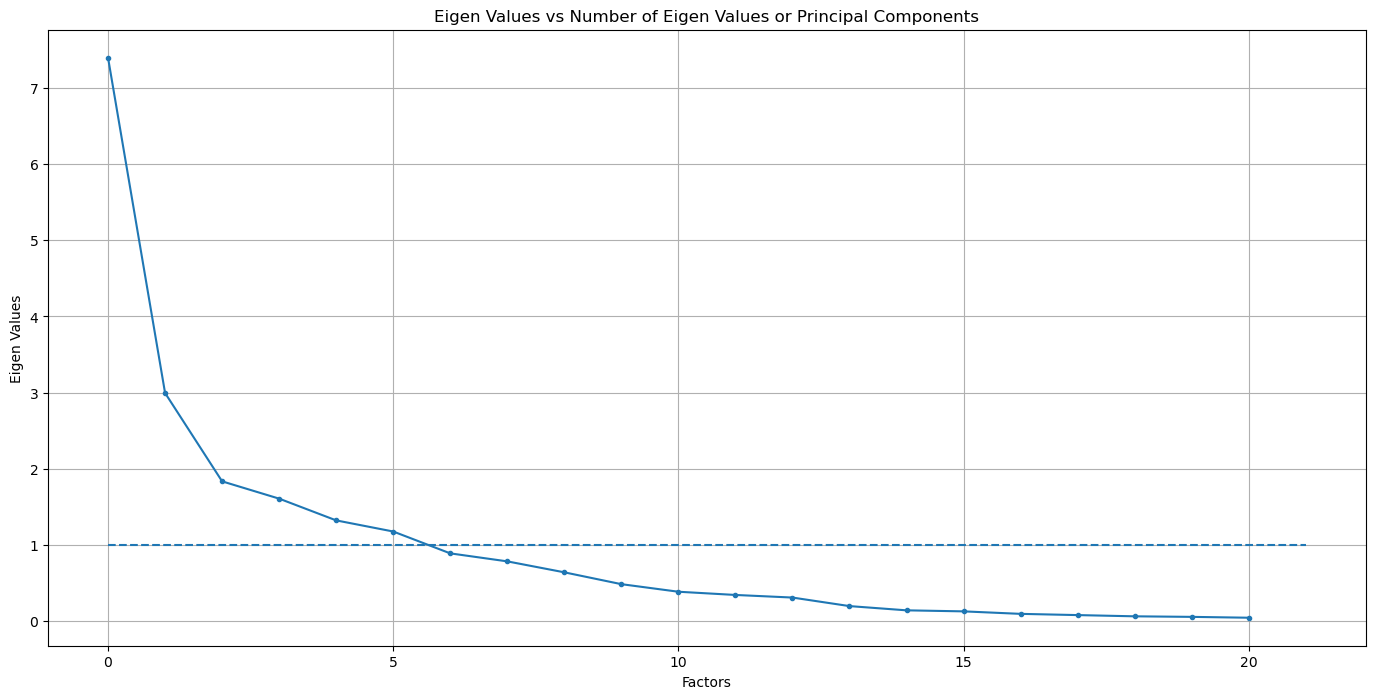

In [240]:
plt.figure(figsize=(17,8))
plt.plot(eigen_values, marker = '.')
plt.grid()
plt.ylabel('Eigen Values')
plt.xlabel('Factors')
plt.hlines(y=1,xmin=0, xmax=21,linestyles='dashed')
plt.title('Eigen Values vs Number of Eigen Values or Principal Components');

In PCA, two methods are commonly used to determine the optimum number of components:

1. Eigenvalues: In this method, eigenvalues are plotted, and the number of components with eigenvalues above 1 is considered the optimum number of components. In our case, this method suggests that 5 components are optimal.
2. Explained Variance: This method examines how much variance each principal component explains. The cumulative sum of the explained variances is then calculated, and the optimum number of components is determined based on a predefined threshold. 

For our analysis, we will set the threshold at 95%, meaning we will select the components that collectively explain at least 95% of the variance in the data.

In [241]:
print('explained variance ratio')
var_exp = pca.explained_variance_ratio_
display(var_exp)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
print('cumulative variance explained ratio')
cum_var_exp

explained variance ratio


array([0.35216592, 0.14263617, 0.08741841, 0.07661133, 0.06302299,
       0.05607287, 0.04240922, 0.03741182, 0.03056546, 0.02316525,
       0.01843302, 0.01642289, 0.01479727, 0.00945801, 0.00681108,
       0.0061634 , 0.00460621, 0.00383902, 0.00307039, 0.00272546,
       0.00219381])

cumulative variance explained ratio


array([0.35216592, 0.49480209, 0.5822205 , 0.65883183, 0.72185482,
       0.77792769, 0.82033692, 0.85774873, 0.8883142 , 0.91147944,
       0.92991246, 0.94633535, 0.96113262, 0.97059063, 0.97740171,
       0.98356511, 0.98817132, 0.99201034, 0.99508073, 0.99780619,
       1.        ])

from cumulative variance explained ratio we can find that first 5 components which had eigen value of above 1 can explain only 72% variance but our threshold is 95%, to find the optimum number of pricipal components we will make a plot based on explained variance and cumulative explained variance.

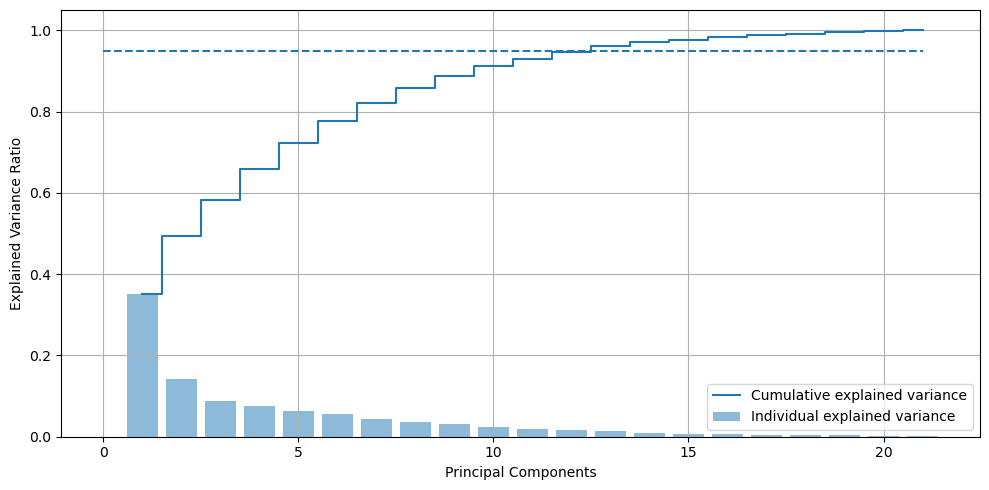

In [242]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigen_values.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigen_values.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.hlines(y=0.95,xmin=0,xmax=21,linestyles='dashed')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.grid()
plt.show()

In the above plot 95% is marked by the horizontal line and optimum number of components are those for which cumulatively explained variance is above 95% which as per the above plot is 13. We will continue by taking number of componets as 13.

In [243]:
pca_final = PCA(n_components=13, random_state=7)
pca_transformed = pca_final.fit_transform(X_scaled)
col_names = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']
X_components = pd.DataFrame(pca_final.components_.T, columns = col_names, index = X_scaled.columns)
X_components.head(21)

PC1       PC2       PC3       PC4       PC5  \
lread                 0.177682  0.094365  0.098504  0.629964  0.009214   
lwrite                0.077871  0.042738  0.172898  0.708744 -0.022112   
scall                 0.260331  0.165057  0.211680 -0.116155 -0.179008   
sread                 0.276037  0.181206  0.255850 -0.155744 -0.066634   
swrite                0.255637  0.189966  0.258015 -0.152509 -0.114499   
fork                  0.236591  0.325807 -0.316553 -0.027686  0.001762   
exec                  0.208435  0.222278 -0.330159  0.054486  0.002969   
rchar                 0.215137  0.076143  0.190893 -0.107195  0.325188   
wchar                 0.136698  0.010695  0.378901 -0.111349  0.295179   
pgout                 0.235553 -0.328848 -0.126150 -0.015441 -0.065046   
ppgout                0.249095 -0.341481 -0.151854 -0.015767 -0.018362   
pgfree                0.250081 -0.336167 -0.165297 -0.018612 -0.028653   
pgscan                0.231609 -0.305003 -0.151990 -0.016915 -0.051673   
atch                  0.167825 -0.172966 -0.043189  0.020878 -0.154424   
pgin                  0.225706 -0.178488  0.042608  0.029755  0.403330   
ppgin                 0.226944 -0.194817  0.041232  0.033782  0.415799   
pflt                  0.248365  0.321046 -0.289666 -0.019579  0.017736   
vflt                  0.286990  0.265537 -0.246743 -0.013056  0.015696   
freemem              -0.183364  0.101535 -0.232588  0.037223  0.442802   
freeswap             -0.201324  0.085685 -0.208192  0.006825  0.396800   
runqsz_Not_CPU_Bound -0.078260 -0.099430 -0.239455  0.081412 -0.188117   

                           PC6       PC7       PC8       PC9      PC10  \
lread                -0.051109 -0.009508 -0.040567  0.011846 -0.012475   
lwrite               -0.117221  0.061515 -0.059808 -0.007220 -0.025703   
scall                 0.029390  0.011837 -0.161198  0.232656  0.210106   
sread                -0.062724  0.203091 -0.167725  0.188910 -0.138356   
swrite               -0.064151  0.226043 -0.255327  0.239170  0.123263   
fork                 -0.007703  0.011313 -0.003250 -0.057830  0.000243   
exec                  0.072082 -0.217689  0.206039 -0.257880  0.261131   
rchar                -0.165722  0.121725  0.310146 -0.181001 -0.704068   
wchar                -0.276922  0.183573  0.222529 -0.487763  0.513769   
pgout                -0.212108  0.044600 -0.005553  0.010123  0.118323   
ppgout               -0.200811  0.032520 -0.138643 -0.069326  0.045721   
pgfree               -0.180762  0.009766 -0.208189 -0.093041 -0.040442   
pgscan               -0.111446 -0.027529 -0.245015 -0.102253 -0.181604   
atch                 -0.225229 -0.036700  0.706205  0.544163  0.094819   
pgin                  0.465022 -0.046685  0.004108  0.159319  0.097137   
ppgin                 0.434763 -0.030606 -0.008993  0.146589  0.065499   
pflt                 -0.016849  0.005799  0.016679 -0.034555 -0.021417   
vflt                  0.056713  0.001470  0.017358 -0.013450 -0.055964   
freemem              -0.227121  0.311503 -0.120921  0.284400  0.073504   
freeswap             -0.385083 -0.005919 -0.167751  0.224671  0.098019   
runqsz_Not_CPU_Bound  0.274871  0.837940  0.150007 -0.111925  0.028622   

                          PC11      PC12      PC13  
lread                 0.029949  0.015414 -0.028255  
lwrite               -0.035827 -0.011834  0.043067  
scall                 0.530819  0.175654  0.087579  
sread                 0.040672  0.021176  0.049169  
swrite               -0.181584 -0.109841  0.065416  
fork                 -0.259001 -0.071235 -0.020959  
exec                  0.531748  0.099087  0.153461  
rchar                 0.181384  0.173602  0.102696  
wchar                -0.099783 -0.196530 -0.069951  
pgout                -0.186143  0.552869 -0.019578  
ppgout               -0.053721  0.281808 -0.011553  
pgfree                0.074647 -0.102952 -0.021473  
pgscan                0.231141 -0.644013 -0.023632  
atch                 -0.018

In [244]:
pca_df = pd.DataFrame(pca_transformed, columns = col_names)
pca_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.968531  0.068000 -0.184346 -0.475982  1.094682 -0.922834 -0.544506   
1 -3.962593 -0.477608 -1.453987  0.011163  0.892340 -0.447792  0.824911   
2 -0.407535  0.619577 -0.377007 -0.076710 -0.975431  1.270606  0.369841   
3 -3.835131 -0.443930 -1.341605 -0.049102  1.123296 -0.552486  0.890524   
4 -2.938928 -0.538958 -0.569552 -0.045902 -0.186555  0.215642  0.127572   

        PC8       PC9      PC10      PC11      PC12      PC13  
0 -0.701924  0.915720  0.450496  0.715594  0.179042 -0.989574  
1 -0.238446  0.515312  0.198154  0.283414 -0.011544 -0.382031  
2  0.682494 -0.121177 -0.157595 -0.244750 -0.043507 -0.279529  
3  0.001643  0.363068 -0.294283  0.414015  0.113091 -0.327341  
4  0.280550 -0.371601 -0.490118 -0.412029 -0.022339  1.123860

In [245]:
pca_df.shape

(8192, 13)

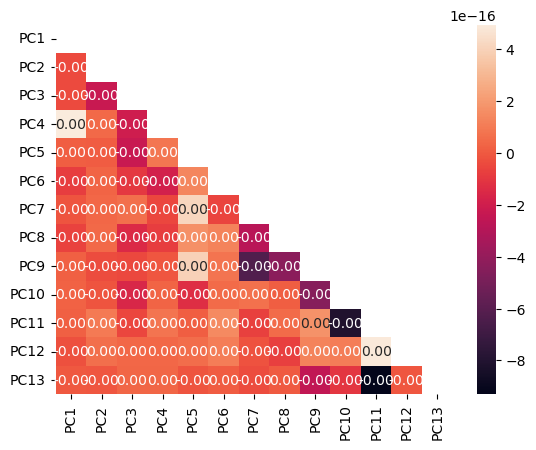

In [246]:
corr = pca_df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask)
plt.show()

As per the heatmap there is no multicollinearity between the components. 

In [247]:
X_pca = sm.add_constant(pca_df)

In [248]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, Y, test_size= 0.2, random_state=7)
X_pca_train.head()

const       PC1       PC2       PC3       PC4       PC5       PC6  \
1305    1.0 -0.247809 -1.402192 -0.418225 -0.395010 -1.203423 -0.134458   
6407    1.0 -3.739769 -0.391546 -1.266267 -0.098442  1.182155 -0.596927   
961     1.0 -3.982823 -0.561836 -1.270427  0.055792  0.997941 -0.533322   
4988    1.0  0.106925 -2.022571  1.028733 -1.170920  0.700780 -1.538064   
3017    1.0  7.620300 -0.644178 -1.091430  2.539405  2.086697  0.208043   

           PC7       PC8       PC9      PC10      PC11      PC12      PC13  
1305 -1.543361 -1.296092 -0.684898 -0.507836  0.517966 -1.730049 -0.619269  
6407  0.942310  0.037499  0.375898 -0.497502  0.495248  0.175025 -0.277796  
961   0.863985 -0.122201  0.310053  0.343209  0.320785 -0.052692 -0.421106  
4988 -0.707249 -0.814107 -1.846345  0.928471  0.072008 -2.053900  0.192579  
3017 -0.917508 -0.264161 -0.976318 -0.560377  0.729111  1.014764  0.268395

In [249]:
pca_mod = sm.OLS(y_pca_train, X_pca_train)
pca_res = pca_mod.fit()
pca_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     1143.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:53:56   Log-Likelihood:                -20470.
No. Observations:                6553   AIC:                         4.097e+04
Df Residuals:                    6539   BIC:                         4.106e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.1806      0.068   1266.479      0.000      86.047      86.314
PC1           -2.8501      0.025   -114.012      0.000      -2.899      -2.801
PC2           -1.5082      0.039    -38.430      0.000      -1.585      -1.431
PC3            0.0271      0.050      0.537      0.591      -0.072       0.126
PC4            0.1331      0.053      2.491      0.013       0.028       0.238
PC5           -0.1111      0.059     -1.888      0.059      -0.227       0.004
PC6           -0.3703      0.063     -5.911      0.000      -0.493      -0.248
PC7            0.7361      0.072     10.221      0.000       0.595       0.877
PC8           -0.5307      0.076     -6.955      0.000      -0.680      -0.381
PC9            0.6364      0.084      7.539      0.000       0.471       0.802
PC10          -0.0046      0.097     -0.048      0.962      -0.194       0.185
PC11           0.2931      0.109      2.679      0.007       0.079       0.507
PC12          -0.6312      0.115     -5.472      0.000      -0.857      -0.405
PC13           1.1048      0.122      9.037      0.000       0.865       1.344
==============================================================================
Omnibus:                     3693.169   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32136.590
Skew:                          -2.606   Prob(JB):                         0.00
Kurtosis:                      12.515   Cond. No.                         4.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
# checking VIF score for X_pca
vif_pca = pd.Series([variance_inflation_factor(X_pca_train.values, i) for i in range(X_pca_train.shape[1])], index = X_pca_train.columns)
print(vif_pca)

const    1.000676
PC1      1.000389
PC2      1.000413
PC3      1.000757
PC4      1.000398
PC5      1.000469
PC6      1.000339
PC7      1.000620
PC8      1.000810
PC9      1.000291
PC10     1.000356
PC11     1.000455
PC12     1.000459
PC13     1.000228
dtype: float64


For the model made using PCA data we checked for VIF score which for all the components is nearly 1 meaning there is no multicollinearity, however, as per the model summary table there are components for whom p-value is above 0.05, we will drop them one by one and check the summary table. 

In [251]:
X_pca_train1 = X_pca_train.drop('PC10', axis = 1)
pca_mod1 = sm.OLS(y_pca_train, X_pca_train1)
pca_res1 = pca_mod1.fit()
pca_res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     1238.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:53:56   Log-Likelihood:                -20470.
No. Observations:                6553   AIC:                         4.097e+04
Df Residuals:                    6540   BIC:                         4.106e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.1807      0.068   1266.724      0.000      86.047      86.314
PC1           -2.8501      0.025   -114.023      0.000      -2.899      -2.801
PC2           -1.5081      0.039    -38.433      0.000      -1.585      -1.431
PC3            0.0271      0.050      0.537      0.591      -0.072       0.126
PC4            0.1331      0.053      2.492      0.013       0.028       0.238
PC5           -0.1111      0.059     -1.887      0.059      -0.227       0.004
PC6           -0.3703      0.063     -5.912      0.000      -0.493      -0.248
PC7            0.7361      0.072     10.222      0.000       0.595       0.877
PC8           -0.5307      0.076     -6.956      0.000      -0.680      -0.381
PC9            0.6364      0.084      7.540      0.000       0.471       0.802
PC11           0.2931      0.109      2.680      0.007       0.079       0.507
PC12          -0.6312      0.115     -5.473      0.000      -0.857      -0.405
PC13           1.1048      0.122      9.037      0.000       0.865       1.344
==============================================================================
Omnibus:                     3692.477   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32119.131
Skew:                          -2.605   Prob(JB):                         0.00
Kurtosis:                      12.512   Cond. No.                         4.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
X_pca_train2 = X_pca_train1.drop('PC3', axis = 1)
pca_mod2 = sm.OLS(y_pca_train, X_pca_train2)
pca_res2 = pca_mod2.fit()
pca_res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     1351.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:53:56   Log-Likelihood:                -20471.
No. Observations:                6553   AIC:                         4.097e+04
Df Residuals:                    6541   BIC:                         4.105e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.1810      0.068   1266.843      0.000      86.048      86.314
PC1           -2.8500      0.025   -114.028      0.000      -2.899      -2.801
PC2           -1.5081      0.039    -38.434      0.000      -1.585      -1.431
PC4            0.1327      0.053      2.485      0.013       0.028       0.237
PC5           -0.1111      0.059     -1.888      0.059      -0.227       0.004
PC6           -0.3702      0.063     -5.910      0.000      -0.493      -0.247
PC7            0.7367      0.072     10.232      0.000       0.596       0.878
PC8           -0.5300      0.076     -6.948      0.000      -0.680      -0.380
PC9            0.6363      0.084      7.538      0.000       0.471       0.802
PC11           0.2931      0.109      2.680      0.007       0.079       0.507
PC12          -0.6310      0.115     -5.471      0.000      -0.857      -0.405
PC13           1.1049      0.122      9.038      0.000       0.865       1.344
==============================================================================
Omnibus:                     3678.564   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31777.604
Skew:                          -2.595   Prob(JB):                         0.00
Kurtosis:                      12.458   Cond. No.                         4.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
X_pca_train3 = X_pca_train2.drop('PC5', axis = 1)
pca_mod3 = sm.OLS(y_pca_train, X_pca_train3)
pca_res3 = pca_mod3.fit()
pca_res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     1485.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:53:56   Log-Likelihood:                -20472.
No. Observations:                6553   AIC:                         4.097e+04
Df Residuals:                    6542   BIC:                         4.104e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.1809      0.068   1266.594      0.000      86.048      86.314
PC1           -2.8503      0.025   -114.019      0.000      -2.899      -2.801
PC2           -1.5084      0.039    -38.433      0.000      -1.585      -1.431
PC4            0.1328      0.053      2.487      0.013       0.028       0.238
PC6           -0.3706      0.063     -5.915      0.000      -0.493      -0.248
PC7            0.7368      0.072     10.231      0.000       0.596       0.878
PC8           -0.5318      0.076     -6.970      0.000      -0.681      -0.382
PC9            0.6370      0.084      7.546      0.000       0.472       0.803
PC11           0.2930      0.109      2.679      0.007       0.079       0.507
PC12          -0.6310      0.115     -5.470      0.000      -0.857      -0.405
PC13           1.1019      0.122      9.013      0.000       0.862       1.342
==============================================================================
Omnibus:                     3661.606   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31210.393
Skew:                          -2.585   Prob(JB):                         0.00
Kurtosis:                      12.358   Cond. No.                         4.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

in the above table, for all the components the p-value is below 0.05 meaning we have an optimum model based on PCA data using which we will create a model using LinearRegression from sklearn

In [254]:
# dropping 'const' column
X_pca_final = X_pca_train3.drop('const', axis = 1)
# creating model
pca_model = LinearRegression(n_jobs=-1)
pca_model.fit(X_pca_final, y_pca_train)

LinearRegression(n_jobs=-1)

In [255]:
lr_performance_predictors(pca_model, X_pca_final, y_pca_train)

69.42% of the variance in usr is explained by predictors in the model.
rmse score is: 5.502
mae score is: 3.492


checking the model performance for test data

In [256]:
X_pca_test1 = pd.DataFrame()
for column in X_pca_final.columns:
    X_pca_test1[column] = X_pca_test[column]

In [257]:
X_pca_test1.head()

PC1       PC2       PC4       PC6       PC7       PC8       PC9  \
3566  2.255835 -2.281757 -1.397422 -2.856301 -0.414250  0.069804  0.867602   
899   1.441698 -0.504548 -0.751806  0.723540  1.631617  1.386264 -1.695260   
2406  0.452928  3.693275 -1.136418 -1.375541  0.370074 -1.316133  1.483687   
5447 -1.135260  0.184847 -0.867813  0.422620 -1.022427 -0.030224 -0.062560   
6215 -2.333423 -0.504423 -0.170908  1.131003  0.147486  0.393879 -0.705371   

          PC11      PC12      PC13  
3566  0.510357 -1.212388  0.359232  
899  -0.049262  0.713084  0.158636  
2406 -1.266772 -0.218441 -0.887321  
5447 -0.188994  0.253141 -0.445624  
6215 -0.461544 -0.063845 -0.529929

In [258]:
lr_performance_predictors(pca_model, X_pca_test1, y_pca_test)

69.93% of the variance in usr is explained by predictors in the model.
rmse score is: 5.439
mae score is: 3.436


Key metrics scores for both the test and train data are almost identical meaning we have an stable model. 

In the first summary table displayed in statsmodel, coefficient values for some attributes were very small due to which scientific notations of e-06 or e-05 required to be used meaning they had minimalistic effect on the model and some of these coefficients were present even in the optimised model created using X_train16 dataset. We feel that there are chances that these coefficient have no effect on the model and to understand it better we will build a model applying regularization techniques.
### Reqularization

In [259]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [260]:
# dropping 'const' column from train and test data
X_train_reg = X_train.drop('const', axis = 1)
X_test_reg = X_test.drop('const', axis = 1)

#### Using Ridge Method

In [261]:
# finding optimum value of alpha
a =  np.arange(0.05, 20, 0.05)
ridge_cv = RidgeCV(alphas=a, cv = 5)
ridge_cv.fit(X_train_reg, y_train)
print("Optimal alpha for Ridge: ", ridge_cv.alpha_)

Optimal alpha for Ridge:  14.8


In [262]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train_reg, y_train)
ridge.coef_

array([-5.36856699e-02,  1.91639244e-02, -4.93868172e-04, -1.56066075e-03,
       -5.78100355e-03, -1.73706094e-01, -3.18004696e-01, -5.02993845e-06,
       -6.43492183e-06, -2.66967086e-01,  6.43366262e-03,  1.62397668e-02,
       -1.78434728e-03,  3.02525007e-02, -5.87825385e-02, -1.05755737e-02,
       -1.84714771e-02, -1.10267206e-02,  1.20929316e-04,  4.17188375e-06,
        1.98834688e+00])

In [263]:
print('for ridge method')
print('\ntrain data')
lr_performance_predictors(ridge, X_train_reg, y_train)
print('\ntest data')
lr_performance_predictors(ridge, X_test_reg, y_test)


for ridge method

train data
69.76% of the variance in usr is explained by predictors in the model.
rmse score is: 5.472
mae score is: 3.432

test data
70.33% of the variance in usr is explained by predictors in the model.
rmse score is: 5.387
mae score is: 3.344


#### Using Lasso Method

In [264]:
# finding optimum value of alpha
a =  np.arange(0.00, 1.05, 0.05)
lasso_cv = LassoCV(alphas=a, cv = 5)
lasso_cv.fit(X_train_reg, y_train)
print("Optimal alpha for lasso: ", lasso_cv.alpha_)

Optimal alpha for lasso:  0.05


In [265]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train_reg, y_train)
lasso.coef_

array([-5.37981642e-02,  1.93644834e-02, -5.04930794e-04, -1.52680782e-03,
       -5.87256303e-03, -9.00346799e-02, -3.13925265e-01, -5.05465107e-06,
       -6.57778282e-06, -2.38154588e-01,  0.00000000e+00,  1.62035114e-02,
       -1.59509720e-03,  5.39530858e-03, -5.87616353e-02, -9.44788395e-03,
       -1.90313845e-02, -1.18709889e-02,  1.33348981e-04,  4.02747807e-06,
        1.76213728e+00])

In [266]:
print('for ridge method')
print('\ntrain data')
lr_performance_predictors(lasso, X_train_reg, y_train)
print('\ntest data')
lr_performance_predictors(lasso, X_test_reg, y_test)


for ridge method

train data
69.74% of the variance in usr is explained by predictors in the model.
rmse score is: 5.473
mae score is: 3.413

test data
70.31% of the variance in usr is explained by predictors in the model.
rmse score is: 5.389
mae score is: 3.33


## Model Comparision
We have created 4 models using different techniques compared each models performance for test and train data using key metrics and have found that all the models are stable now we will compare these models with each other to find the best model.

In [267]:
resultDf1 = pd.DataFrame({'RSquared':regression_model2.score(X_final, y_train)},index=['Model1'])
resultDf1

RSquared
Model1  0.690863

In [268]:
resultDf2 = pd.DataFrame({'RSquared':pca_model.score(X_pca_final, y_pca_train)},index=['PCA'])
resultDf2

RSquared
PCA  0.691831

In [269]:
resultDf3 = pd.DataFrame({'RSquared':ridge.score(X_train_reg, y_train)},index=['Ridge'])
resultDf3

RSquared
Ridge  0.693461

In [270]:
resultDf4 = pd.DataFrame({'RSquared':lasso.score(X_train_reg, y_train)},index=['Lasso'])
resultDf4

RSquared
Lasso  0.693455

In [271]:
# combining all the 4 datasets into 1
FinalDf = pd.concat([resultDf1, resultDf2,resultDf3,resultDf4])

In [272]:
# sorting models in descending order by r-square value
FinalDf.sort_values(by='RSquared',ascending=False)

RSquared
Ridge   0.693461
Lasso   0.693455
PCA     0.691831
Model1  0.690863

From the above table, we can conclude that the model created by regularizing the data using the Ridge method has the highest R-square value. Therefore, we can identify it as the best model.

Next, we will print the regression equation for the Ridge method and display the attributes along with their coefficients, sorted in descending order of coefficient values.

In [273]:
# Retrieve the coefficients and intercept
coefficients = ridge.coef_
intercept = ridge.intercept_

# Print the regression equation
print("Ridge Regression Equation:")
print(f"usr = {intercept:.4f}", end=" ")
for i, coef in enumerate(coefficients):
    print(f"+ ({coef:.4f} * {X_train_reg.columns[i]})", end=" ")

Ridge Regression Equation:
usr = 89.5666 + (-0.0707 * lread) + (0.0373 * lwrite) + (-0.0003 * scall) + (-0.0020 * sread) + (-0.0106 * swrite) + (-0.2016 * fork) + (-0.4311 * exec) + (-0.0000 * rchar) + (-0.0000 * wchar) + (-0.2632 * pgout) + (0.0675 * ppgout) + (-0.0053 * pgfree) + (-0.0087 * pgscan) + (0.0928 * atch) + (-0.0488 * pgin) + (-0.0137 * ppgin) + (-0.0162 * pflt) + (-0.0095 * vflt) + (0.0001 * freemem) + (0.0000 * freeswap) + (1.7379 * runqsz_Not_CPU_Bound) 

In [274]:
# Create a DataFrame with the coefficients and intercept
coef_df = pd.DataFrame(coefficients, index=[X_train_reg.columns[i] for i in range(len(coefficients))], columns=["Coefficient"])
coef_df.loc["Intercept"] = intercept

# Sort the DataFrame in descending order based on the coefficient values
coef_df_sorted = coef_df.sort_values(by="Coefficient", ascending=False)

# Print the sorted DataFrame
print(coef_df_sorted)

                      Coefficient
Intercept               89.566590
runqsz_Not_CPU_Bound     1.737918
atch                     0.092785
ppgout                   0.067453
lwrite                   0.037346
freemem                  0.000085
freeswap                 0.000004
wchar                   -0.000005
rchar                   -0.000006
scall                   -0.000294
sread                   -0.001977
pgfree                  -0.005323
pgscan                  -0.008694
vflt                    -0.009460
swrite                  -0.010640
ppgin                   -0.013735
pflt                    -0.016207
pgin                    -0.048839
lread                   -0.070672
fork                    -0.201552
pgout                   -0.263236
exec                    -0.431057


## Conclusion
1. Final regression equation is:
usr = 89.5666 + (-0.0707 * lread) + (0.0373 * lwrite) + (-0.0003 * scall) + (-0.0020 * sread) + (-0.0106 * swrite) + (-0.2016 * fork) + (-0.4311 * exec) + (-0.0000 * rchar) + (-0.0000 * wchar) + (-0.2632 * pgout) + (0.0675 * ppgout) + (-0.0053 * pgfree) + (-0.0087 * pgscan) + (0.0928 * atch) + (-0.0488 * pgin) + (-0.0137 * ppgin) + (-0.0162 * pflt) + (-0.0095 * vflt) + (0.0001 * freemem) + (0.0000 * freeswap) + (1.7379 * runqsz_Not_CPU_Bound) 
2. As per this regression equation we can conclude 
* In terms of coefficient value impact of runqsz_Not_CPU_Bound is highest that is if 'runsqz' is 'Not_CPU_Bound' then 'usr' value increases by 1.738 meaning cpus run 1.738% Portion of time more in user mode provided all other attributes remain constant.
* While 'runsqz_Not_CPU_Bound' is an categorical attribute meaning its value can either be 0 or 1, for continuous variables whose values can differ significantly we find that in absolute terms 'exec' has highest impact followed by 'pgout' and their impact is negative meaning provided that other attributes remain constant every unit increase in 'exec' reduces cpu run time in user mode by 0.431% and for 'pgout' this decrease is 0.263%. 
* For continuous attribute which increase cpu run time in user mode, 'atch' has the highest coefficient value of 0.093, that is for every one unit increase in 'atch' if others remain constant then cpu run time in user mode increases by 0.093%

### Key Takeaways
While we have discussed the impact of different attributes in predicting 'usr' in terms of the regression equation and coefficient values, it is essential to consider the business context. The scale of values for some variables varies significantly, as highlighted by the statistical summary. For many attributes, the median value is 0, while for a few, it is in the thousands. This range difference indicates that some attributes have higher variance. Despite having lower coefficient values, these attributes can have a significant impact on the equation when multiplied by their respective attribute values as they are highly sensitive. Consequently, they will significantly affect the 'usr' value and play a larger role in determining the percentage of CPU run time in user mode.

In a real-world environment, multiple attributes change together, and the magnitude of change for these sensitive attributes will be significantly higher, thus affecting 'usr' considerably more.

We will examine this effect with the help of a table that outlines the impact each variable has according to the five-point summary.

In [275]:
# Calculate the required statistics for each attribute
stats = pd.DataFrame({
    'min': X_train_reg.min(axis=0),
    '25%': np.percentile(X_train_reg, 25, axis=0),
    '50%': np.median(X_train_reg, axis=0),
    '75%': np.percentile(X_train_reg, 75, axis=0),
    'max': X_train_reg.max(axis=0)
}, index=X_train_reg.columns)

# Multiply each statistic by the respective coefficient
for stat in stats.columns:
    stats[stat] *= coefficients

# Combine the attribute names and the calculated values into one DataFrame
result_df = pd.concat([coef_df, stats], axis=1)

# Display the result
result_df.sort_values(by='50%',ascending=False).head(22)

Coefficient       min       25%       50%       75%  \
freeswap                 0.000004  3.766998  4.161733  4.529277  6.912509   
runqsz_Not_CPU_Bound     1.737918  0.000000  0.000000  1.737918  1.737918   
freemem                  0.000085  0.004658  0.019139  0.048101  0.166404   
lwrite                   0.037346  0.000000  0.000000  0.037346  0.373462   
pgout                   -0.263236 -0.000000 -0.000000 -0.000000 -0.526471   
atch                     0.092785  0.000000  0.000000  0.000000  0.000000   
pgscan                  -0.008694 -0.000000 -0.000000 -0.000000 -0.000000   
pgfree                  -0.005323 -0.000000 -0.000000 -0.000000 -0.026617   
ppgout                   0.067453  0.000000  0.000000  0.000000  0.269811   
fork                    -0.201552 -0.000000 -0.000000 -0.000000 -0.403105   
ppgin                   -0.013735 -0.000000 -0.000000 -0.041204 -0.192287   
pgin                    -0.048839 -0.000000 -0.000000 -0.097678 -0.439551   
wchar                   -0.000005 -0.007628 -0.117599 -0.237414 -0.539690   
sread                   -0.001977 -0.011859 -0.171957 -0.330078 -0.555401   
exec                    -0.431057 -0.000000 -0.000000 -0.431057 -0.862114   
lread                   -0.070672 -0.000000 -0.141344 -0.494706 -1.413445   
scall                   -0.000294 -0.032063 -0.300330 -0.606248 -0.985411   
rchar                   -0.000006 -0.001552 -0.195720 -0.701476 -1.513416   
pflt                    -0.016207 -0.000000 -0.388962 -1.037231 -2.576872   
vflt                    -0.009460 -0.000000 -0.425711 -1.135229 -2.383982   
swrite                  -0.010640 -0.074480 -0.670321 -1.255522 -1.979043   
Intercept               89.566590       NaN       NaN       NaN       NaN   

                           max  
freeswap              8.964651  
runqsz_Not_CPU_Bound  1.737918  
freemem               0.640804  
lwrite                2.464848  
pgout                -2.895591  
atch                  0.463926  
pgscan               -1.173705  
pgfree               -0.372633  
ppgout                2.158484  
fork                 -1.410867  
ppgin                -0.727944  
pgin                 -1.709366  
wchar                -1.842918  
sread                -1.120686  
exec                 -4.741625  
lread                -4.805712  
scall                -1.990823  
rchar                -3.599326  
pflt                 -5.850633  
vflt                 -5.619386  
swrite               -4.170887  
Intercept                  NaN

As expected, 'freeswap', which has the lowest coefficient value in absolute terms, will have the highest values in the regression equation due to its sensitive nature. According to our data, 'freeswap' has a minimum value of 3.766, a maximum of 8.96, and a median of 4.53, meaning it accounts for 3.766% to 8.96% of CPU run time in user mode.

As per the above table, the top three attributes that are pushing up the CPU run time in user mode in median terms are:
1. freeswap
2. runqsz_Not_CPU_Bound
3. freemem	

and bringing cpu run time down in user mode down in median terms are:

1. swrite
2. vflt	
3. pflt

# Problem 2
## Background Information
The Ministry of Health of the Republic of Indonesia has launched an initiative aimed at gaining a better understanding of contraceptive use among married women and identifying the key factors that influence their decisions. This study will provide valuable insights towards informed policy decisions aimed at improving public health.
## Business Context
Study different demographic and socio-economic factor and create a predictive model that could help identify whether married women (who are either not pregnant or are uncertain of their pregnancy status) choose to use a contraceptive method. This insight would help the Ministry of Health of the Republic of Indonesia in making informed policy decisions aimed at improving public health.
## Problem Statement
The goal is to identify key demographic and socio-economic factor that could help classify whether married women (who are either not pregnant or are uncertain of their pregnancy status) opt for a contraceptive method of choice. Using this understanding build classification models using different techniques that could help predict whether these women opt for a contraceptive method of choice and identify the best model based on model evaluation metrics.  
## Data Dictionary
* Wife_age - Wife's age (numerical)
* Wife_ education - Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
* Husband_education - Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
* No_of_children_born - Number of children ever born (numerical)
* Wife_religion - Wife's religion (binary) Non-Scientology, Scientology
* Wife's now working? (binary) Yes, No
* Husband_Occupation - Husband's occupation (categorical) 1, 2, 3, 4(random)
* Standard_of_living_index - Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
* Media_exposure - Media exposure (binary) Good, Not good
* Contraceptive_method_used - Contraceptive method used (class attribute) No,Yes
## Loading Data

In [276]:
contraceptive_data = pd.read_excel('D:/Kartik/GL MDS/Study_data/Assingnment_files/Module_4_PM/Contraceptive_method_dataset.xlsx')

## Data Overview

In [277]:
data_overview(contraceptive_data)

a glimpse of the data
----------------------------------------------------------------------------


Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No



shape of the dataset
----------------------------------------------------------------------------


(1473, 10)



statistical summary
----------------------------------------------------------------------------


count       mean       std   min   25%   50%   75%   max
Wife_age             1402.0  32.606277  8.274927  16.0  26.0  32.0  39.0  49.0
No_of_children_born  1452.0   3.254132  2.365212   0.0   1.0   3.0   4.0  16.0
Husband_Occupation   1473.0   2.137814  0.864857   1.0   1.0   2.0   3.0   4.0



information of features
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


None



missing values
----------------------------------------------------------------------------


Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64



checking for duplicates
----------------------------------------------------------------------------
number of duplicate rows: 80


value counts for Wife_ education
----------------------------------------------------------------------------
Wife_ education
Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: count, dtype: int64


value counts for Husband_education
----------------------------------------------------------------------------
Husband_education
Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: count, dtype: int64


value counts for Wife_religion
----------------------------------------------------------------------------
Wife_religion
Scientology        1253
Non-Scientology     220
Name: count, dtype: int64


value counts for Wife_Working
----------------------------------------------------------------------------
Wife_Working
No     1104
Yes     369
Name: count, dtype: int64


value counts for Standard_of_living_inde

#### Key Observations
1. Dataset has 1473 rows and 10 columns. According to the data dictionary, we expected 6 columns to contain numeric data and 4 to contain object data. However, only 3 columns have numeric data. Despite this discrepancy, the impact is minimal as the columns in question are all categorical in nature. 
2. From the statistical summary we can conclude that mean and median values are almost similar meaning that there are no significant outliers.
3. There are duplicates and missing values in the dataset, we will have to remove the duplicates and impute missing values during pre-processing phase.
4. There are no bad data in the dataset, however, column name for columns 'Wife_ education ', 'Wife_Working' and 'Husband_Occupation' are not inline with the column nomenclature practice, we will have rename these columns to 'Wife_education', 'Wife_working' and 'Husband_occupation'.
5. Since the numeric data does not exhibit significant variance in range and the units are similar, scaling will not be required.
## Data Pre-processing
### Removing Duplicates

In [278]:
contraceptive_data = contraceptive_data.drop_duplicates().reset_index(drop= True)
contraceptive_data.shape

(1393, 10)

### Renaming Column Name

In [279]:
contraceptive_data = contraceptive_data.rename(columns= {'Wife_ education':'Wife_education',
                                                         'Wife_Working':'Wife_working',
                                                         'Husband_Occupation':'Husband_occupation'})
contraceptive_data.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_working',
       'Husband_occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

Earlier we had thought that coulmn name for 'Wife_education' column only had an issue, additionally, for 'Media_exposure' there is a additional space in the end making it 'Media_exposure ' which we realised when we displayed column name above. We will have to rename this column also.  

In [280]:
contraceptive_data = contraceptive_data.rename(columns= {'Media_exposure ':'Media_exposure'})
contraceptive_data.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_working',
       'Husband_occupation', 'Standard_of_living_index', 'Media_exposure',
       'Contraceptive_method_used'],
      dtype='object')

### Imputing Missing Values

In [281]:
impute_values(contraceptive_data)
contraceptive_data.isnull().sum()

Wife_age                     0
Wife_education               0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_working                 0
Husband_occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [282]:
contraceptive_data.tail()

Wife_age Wife_education Husband_education  No_of_children_born  \
1388      33.0       Tertiary          Tertiary                  3.0   
1389      33.0       Tertiary          Tertiary                  3.0   
1390      39.0      Secondary         Secondary                  3.0   
1391      33.0      Secondary         Secondary                  3.0   
1392      17.0      Secondary         Secondary                  1.0   

     Wife_religion Wife_working  Husband_occupation Standard_of_living_index  \
1388   Scientology          Yes                   2                Very High   
1389   Scientology           No                   1                Very High   
1390   Scientology          Yes                   1                Very High   
1391   Scientology          Yes                   2                      Low   
1392   Scientology           No                   2                Very High   

     Media_exposure Contraceptive_method_used  
1388        Exposed                       Yes  
1389        Exposed                       Yes  
1390        Exposed                       Yes  
1391        Exposed                       Yes  
1392        Exposed                       Yes

We have removed the duplicates, corrected the index numbers, renamed column names and imputed the missing values.
## Exploratory Data Analysis
### Univariate Analysis
#### For Numeric Columns

Skewness of Wife_age:  0.27590764346223623
Distribution of Wife_age
----------------------------------------------------------------------------


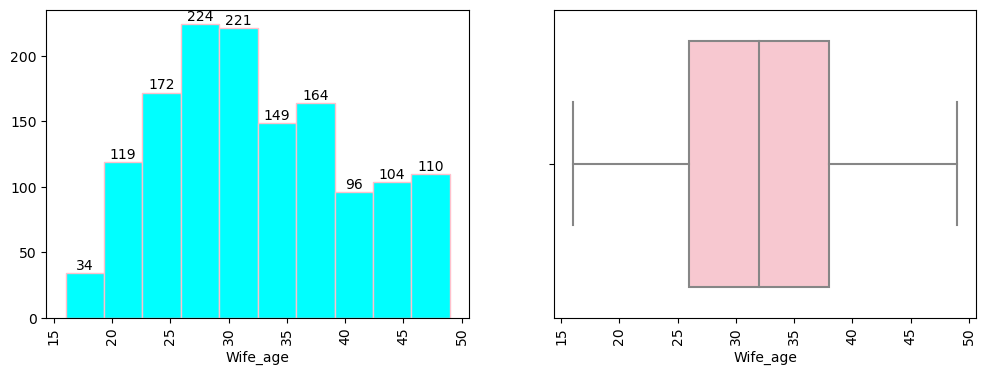

Skewness of No_of_children_born:  1.101235327654049
Distribution of No_of_children_born
----------------------------------------------------------------------------


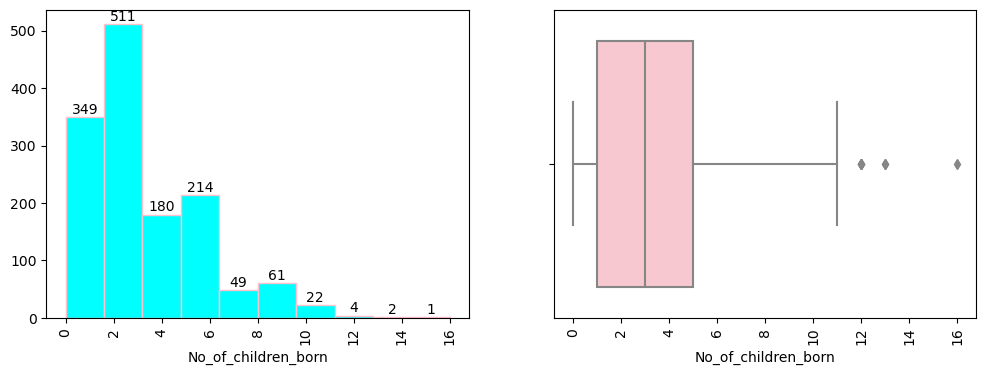

Skewness of Husband_occupation:  -0.15494229804229273
Distribution of Husband_occupation
----------------------------------------------------------------------------


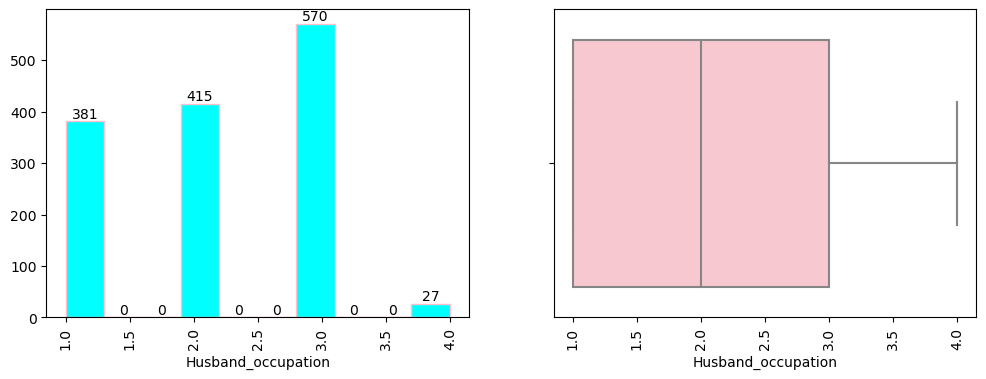

In [283]:
for column in contraceptive_data.select_dtypes(include= 'number').columns:
    univariateAnalysis_numeric(contraceptive_data, column)

#### Key Observations
1. There are outliers present only in No_of_children_born, however, we believe outlier treatment is not required as median and mean values are almost similary.
2. Data is not heavily skewed.
### For Object Columns

In [284]:
def univariateAnalysis_category(df, cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    plt.figure()
    plt.figure(figsize=(6, 4))
    plots = df[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
    plt.show()
  

Details of Wife_education
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

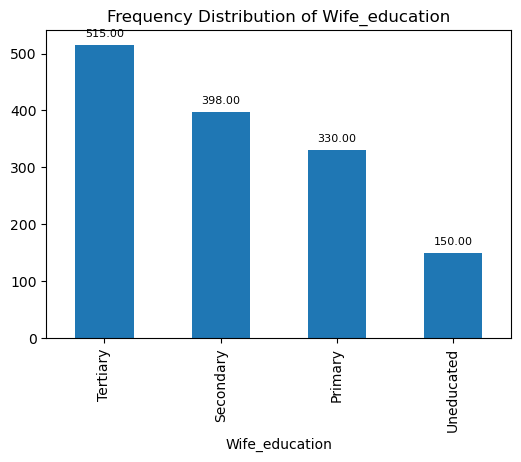

Details of Husband_education
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

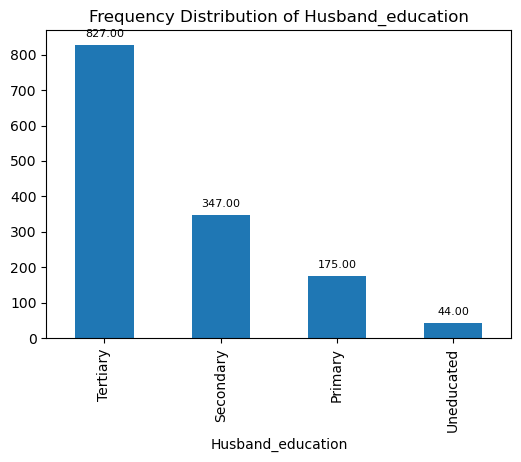

Details of Wife_religion
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

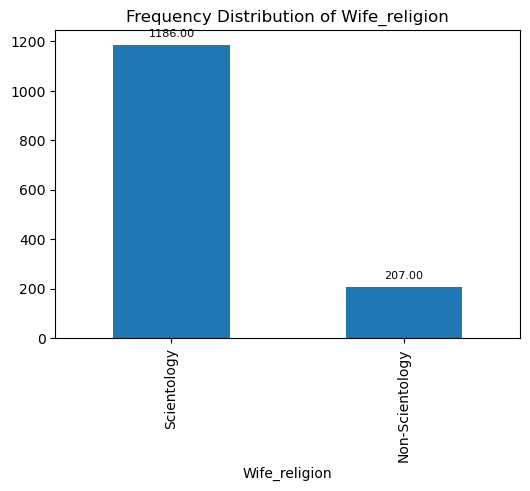

Details of Wife_working
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

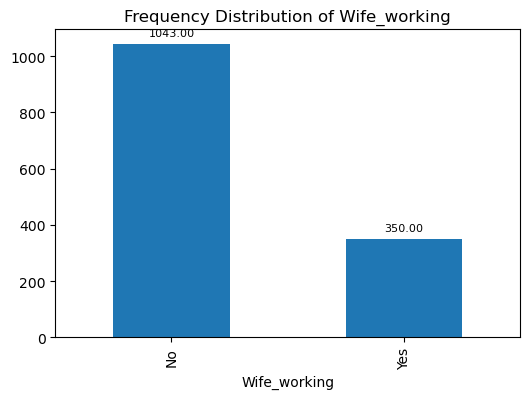

Details of Standard_of_living_index
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

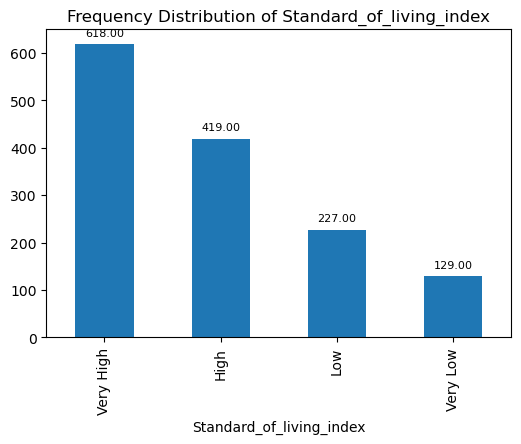

Details of Media_exposure
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

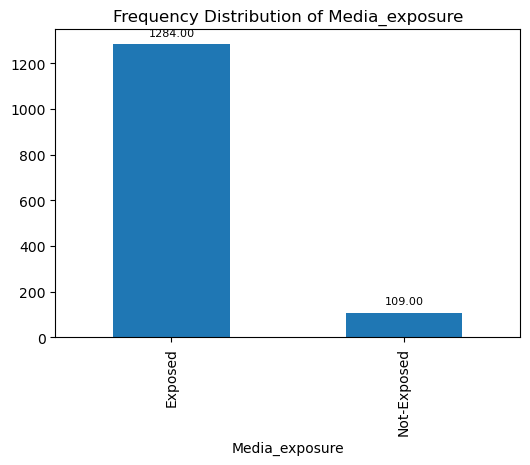

Details of Contraceptive_method_used
----------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

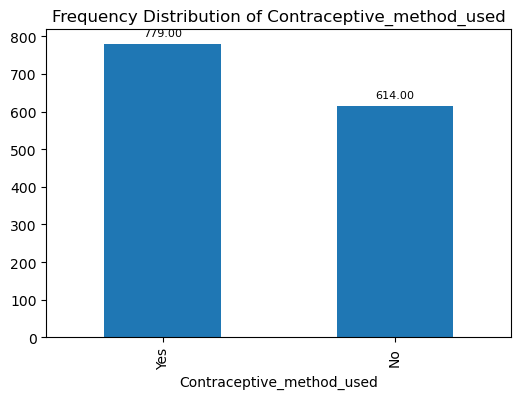

In [285]:
for column in contraceptive_data.select_dtypes(include= 'object').columns:
    univariateAnalysis_category(contraceptive_data, column)

#### Key Observations
1. In terms of education for both husbands and wives, the majority have attained some level of education and as the level of education increases, the number of individuals also increases. Standard of living is also showing similar trend where as the standard of living increases, the number of individuals also increases. There might be some correlation between education and standard of living.
2. For Wife_working, Wife_religion and Media_exposure, data in all of which are binary, around 70% wifes are not working, 80% have Scientology as religion and over 90% have media exposure.
3. For Contraceptive_method_used which is the target variable, here number of woman using contraceptive method are more as compared to those not using.
## Bivariate Analysis
#### Relation between numeric variables 

pair plot


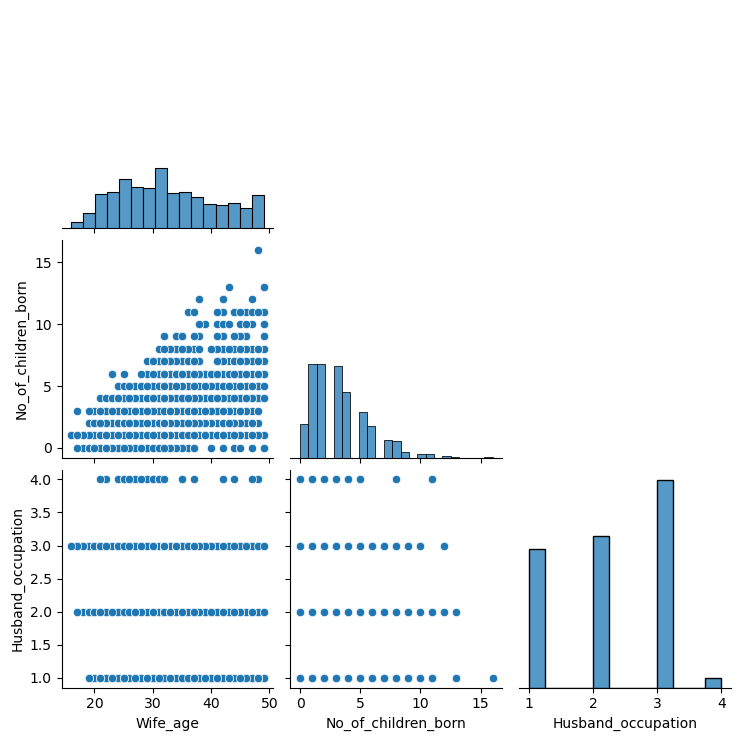

heatmap


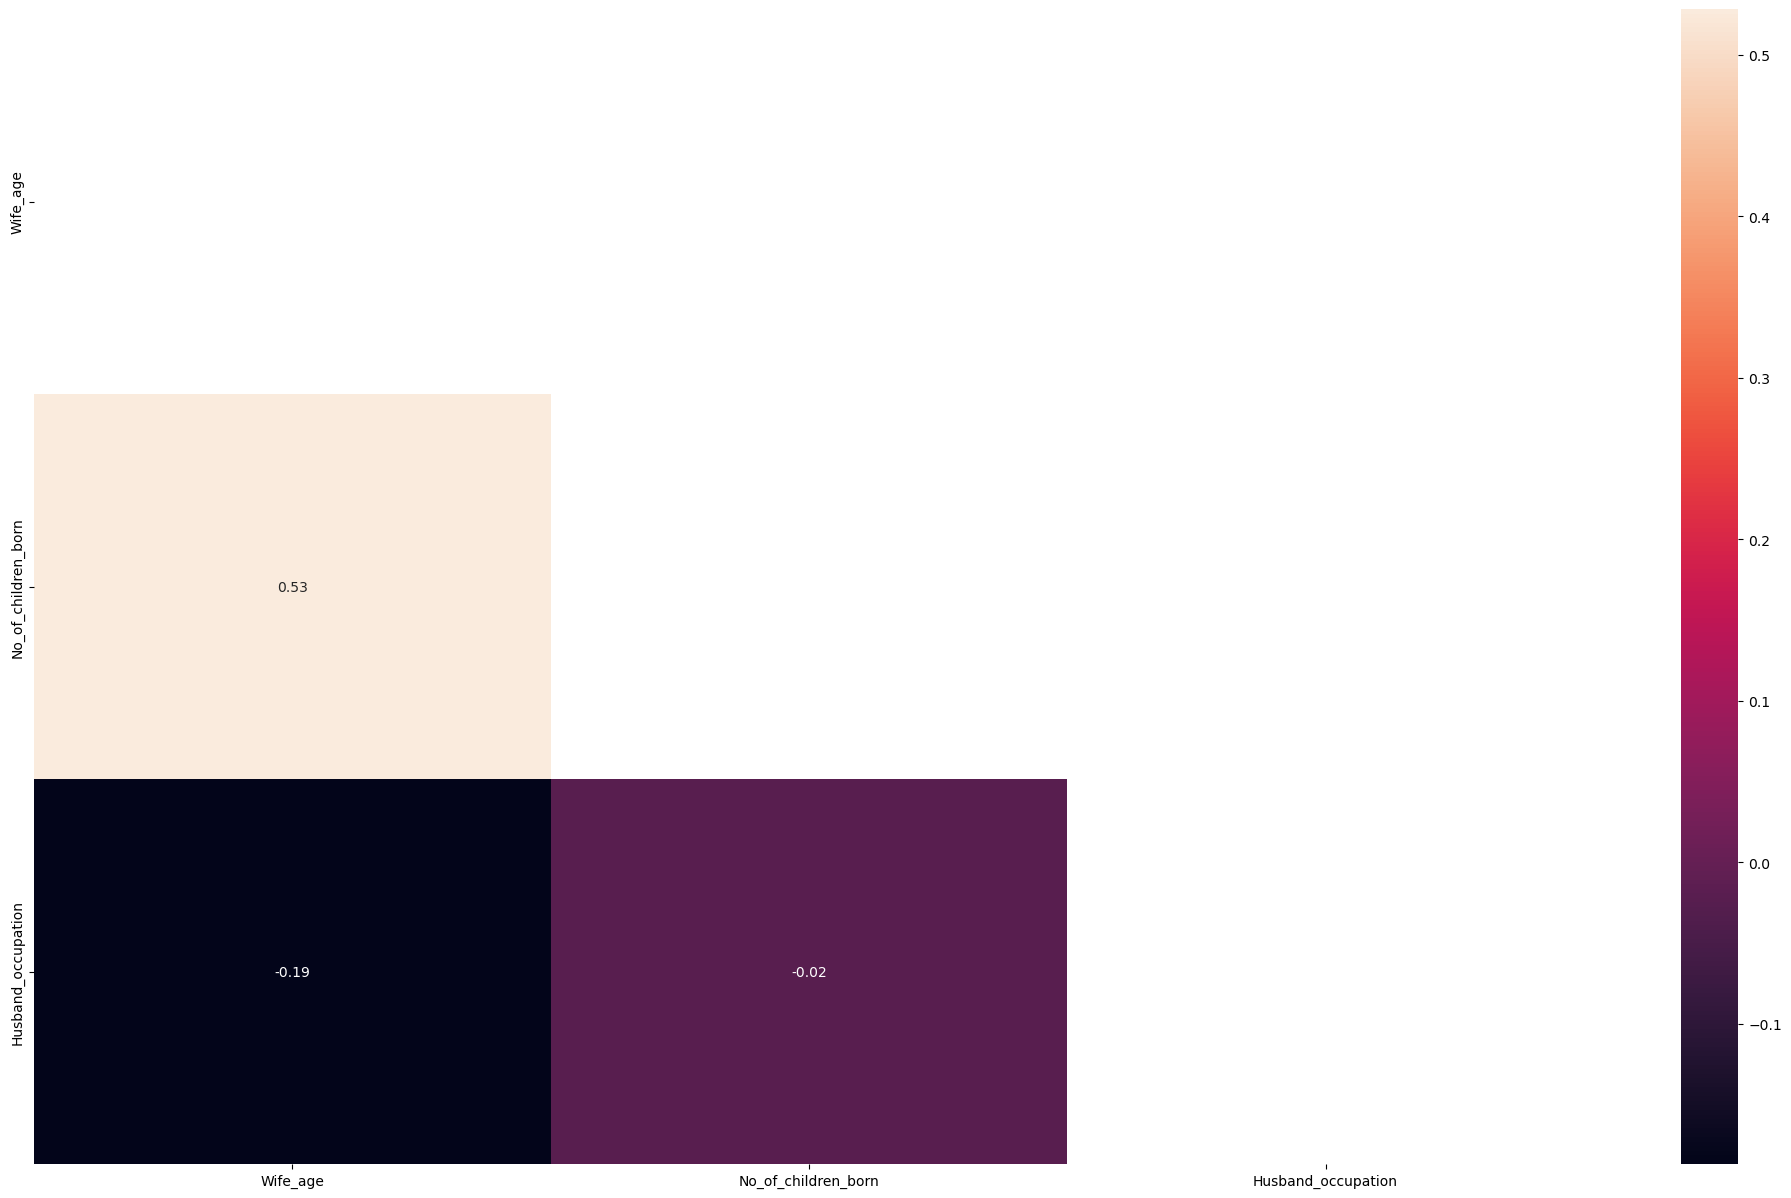

In [286]:
bivariate_num_num(contraceptive_data, contraceptive_data.select_dtypes(include='number'))

#### Key Observation
1. Husband_occupation is a categorical variable so it has very weak correlation with other 2 variables.
2. Number of children born and wife age have a moderate correlation though this corelation is very natural.
#### Relation between numeric and categorical variables

In [287]:
def num_cat_bivariate(df, cat_col, numeric_columns):
    print(f'Relationship between {cat_col} with numeric columns')
    # Determine the number of rows and columns needed for subplots
    num_plots = len(numeric_columns)
    num_cols = min(3, num_plots)
    num_rows = math.ceil(num_plots / num_cols)

    # Create subplots
    plt.figure(figsize=(15, num_rows * 4))

    # Plot violin plots for each numeric column
    for i, num_col in enumerate(numeric_columns):
        if i < num_plots:  # Check if we haven't exceeded the number of numeric columns
            plt.subplot(num_rows, num_cols, i+1)
            sns.violinplot(x=cat_col, y=num_col, data=df)
            plt.title(f'{num_col} vs {cat_col}')
            plt.xticks(rotation=90)  # Rotate x-axis tick labels

    # Adjust layout
    plt.tight_layout()
    plt.show()

Relationship between Wife_education with numeric columns


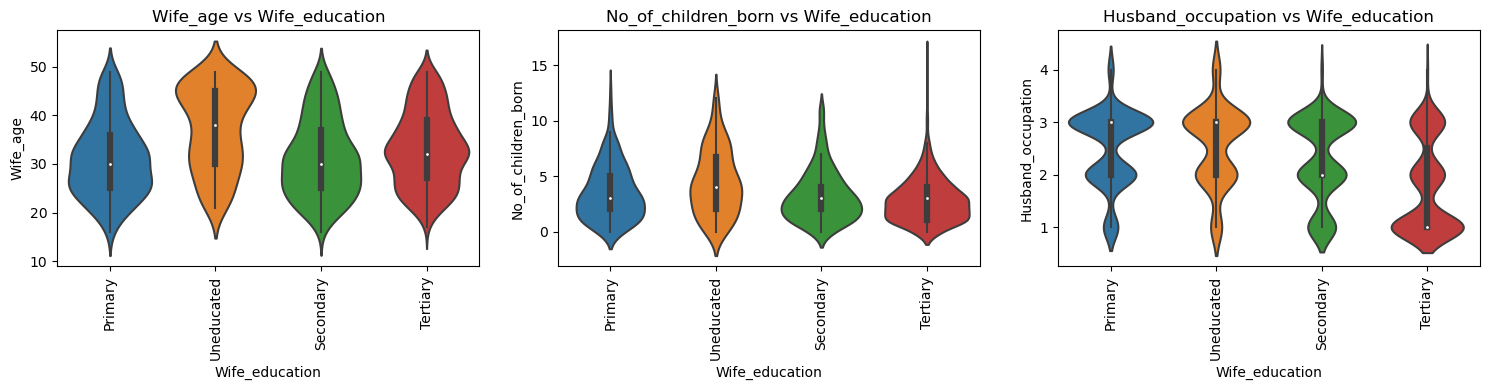

Relationship between Husband_education with numeric columns


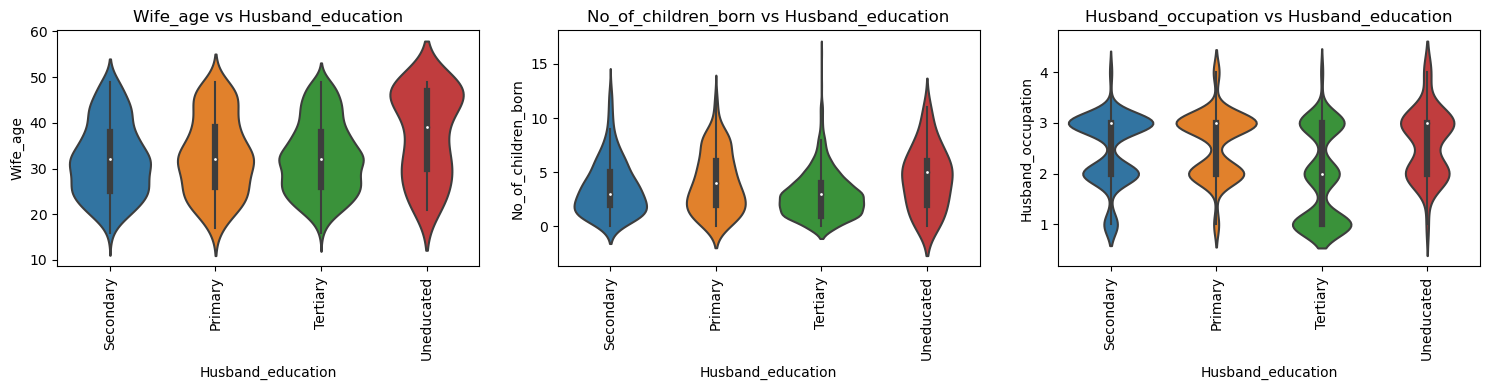

Relationship between Wife_religion with numeric columns


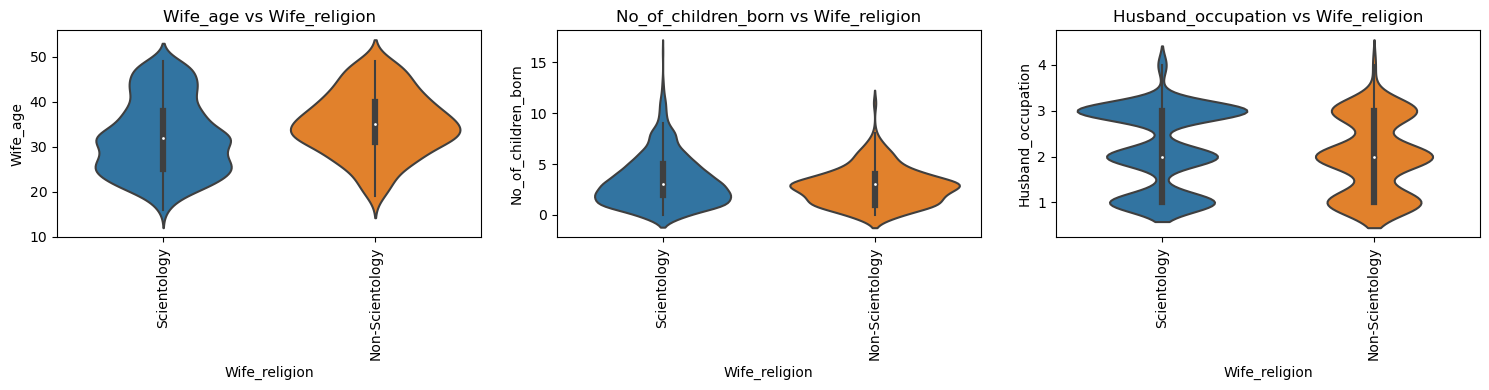

Relationship between Wife_working with numeric columns


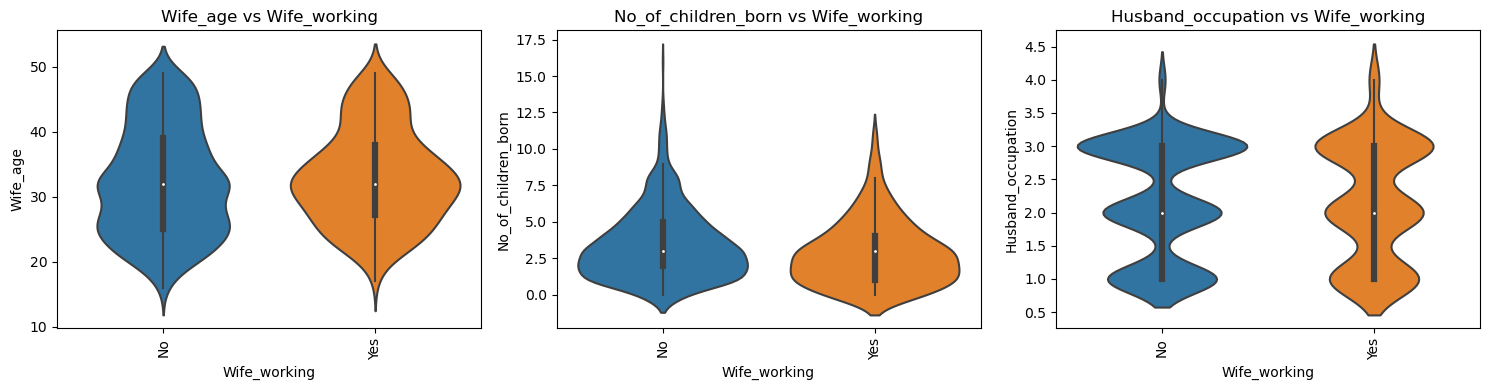

Relationship between Standard_of_living_index with numeric columns


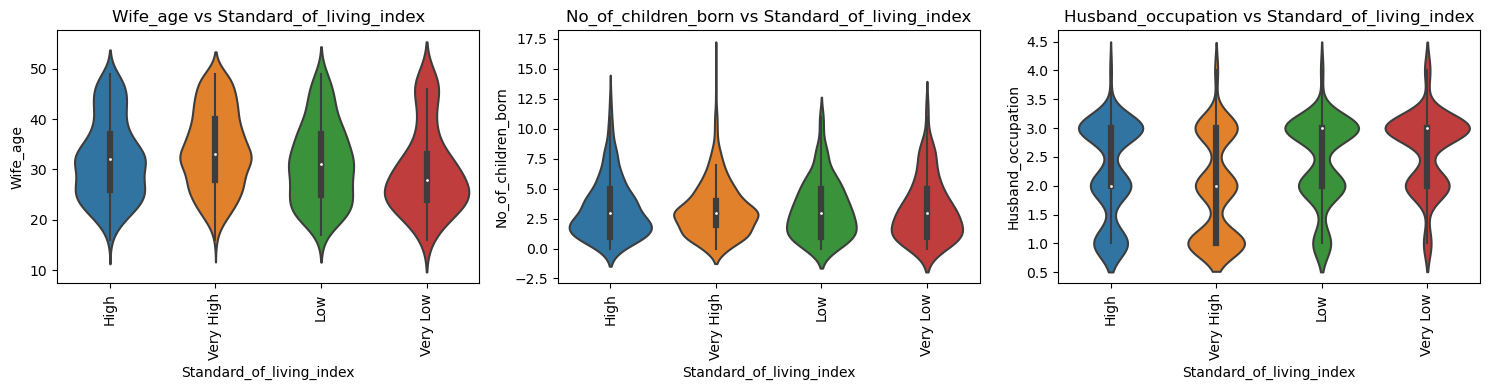

Relationship between Media_exposure with numeric columns


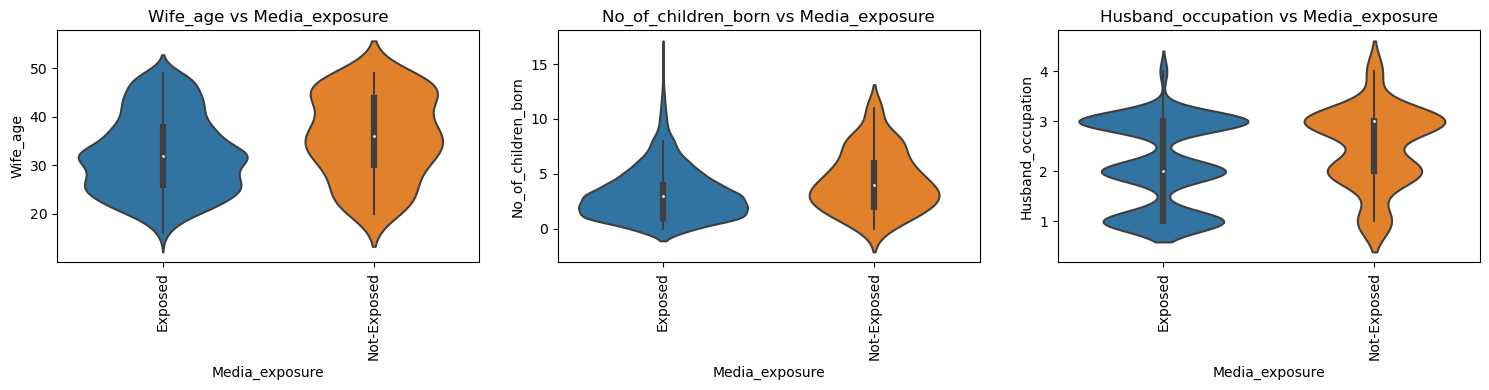

Relationship between Contraceptive_method_used with numeric columns


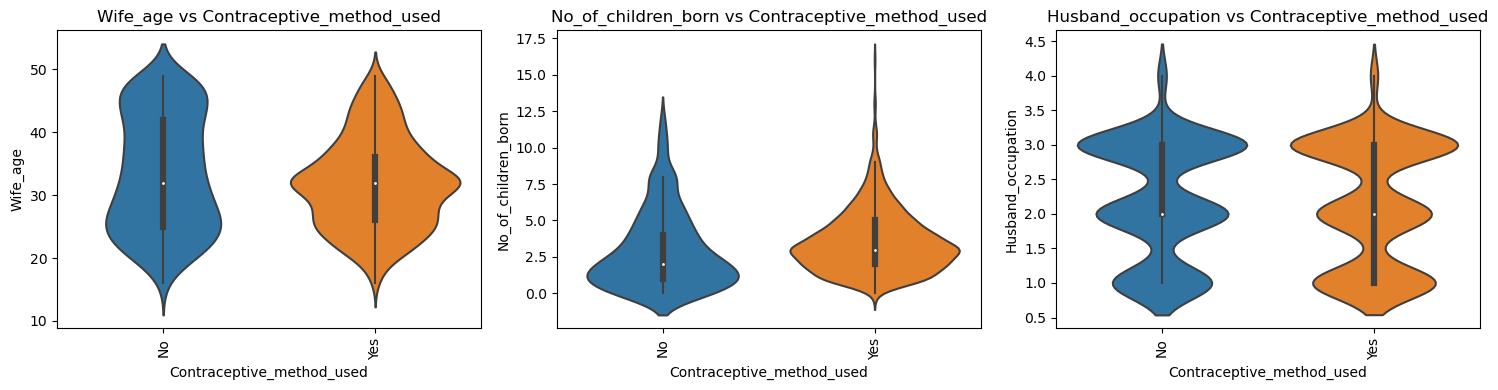

In [288]:
for cat_col in contraceptive_data.select_dtypes(include= 'object').columns:
    num_col = contraceptive_data.select_dtypes(include= 'number').columns
    num_cat_bivariate(contraceptive_data, cat_col, num_col)

#### Key Observations
1. On analyzing wife age with different categorical variables, there are few interesting insights
* As the level of education for both wife and husband are increasing median wife age is coming down from which we might infer that with time education levels are incresing.
* Wife age and wife religion also show an interesting trend where  median age for wife with non-scientology religion is higher and even the data spread show variance with women having scientology religion have higher data spread under 35 years of age while women with non-scientology have have higher data spread between 30 and 40 years.
* Wife age also has highlightable relationship with standard of living and media exposure where as the age of wife increases standard of living also increases on the contrary higher aged wife have lower media exposed numbers with median age of media exposed women significantly lower than non media exposed women.
2. Analyzing number of children born with different categorical variables
* Education has a significant impact on number of education where husband's education level has more prominent effect. As the level of education increases amongst husband median number of children they have is coming down.
* Media exposure is also showing some relationship with number of children born as median number of children born are lower for those with media exposure when compared to those with no media exposure.
3. Analyzing husband occupation with different categorical variables
* Education is also playing a prominant role with husband occupation level, here wife's education level is affecting husband's occupation level where with the change in wife's education level, husband's occupation level is also changing. Wife with higher  education levels have more husbands with lower numeric levels of husband occupation.
* Husband occupation and standard of living are also showing meaningful relation where husbands occupation has been assigned level from 1 to 4 and as we move up the levels in numeric order in husband occupation the standard of living is coming down, since, there is no explaination provided about the labelling of occuption levels we are considering that the labelling is done based income from different occupation meaning with each increase in level of occupation income level are coming down which is causing this decline in standard of living. Also wife with higher education levels are with husbands having lower numeric levels of occupation meaning they have husbands with higher income.
* Husband occupation and media exposure are also related where non media exposed have higher occupation levels.
4. Based on these analysis we can interpret that education is coming out as a single most important demographic factor as it is impacting all other attributes directly or indirectly.
5. On analyzing the numeric attributes with target variable contraceptive method used, number of children born is only showing a diffrentiatable relationship where wife using contraceptive methods have higher median value of number of children born. From this we can infer is that women with more children are more likely to use contraceptive methods.
###  Relationship between categorical column

In [289]:
def bivariate_cat(df, categorical_columns):
    for i in range(0,len(categorical_columns)):
        for j in range(i+1, len(categorical_columns)):
            print(f"Cross-tabulation between {categorical_columns[i]} and {categorical_columns[j]}")
            cross_tab = pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
            display(cross_tab)
            print('\n')

In [290]:
bivariate_cat(contraceptive_data, contraceptive_data.select_dtypes(include= 'object').columns)

Cross-tabulation between Wife_education and Husband_education


Husband_education  Primary  Secondary  Tertiary  Uneducated
Wife_education                                             
Primary                 87        128       103          12
Secondary               25        148       220           5
Tertiary                 4         28       482           1
Uneducated              59         43        22          26



Cross-tabulation between Wife_education and Wife_religion


Wife_religion   Non-Scientology  Scientology
Wife_education                              
Primary                      22          308
Secondary                    52          346
Tertiary                    130          385
Uneducated                    3          147



Cross-tabulation between Wife_education and Wife_working


Wife_working     No  Yes
Wife_education          
Primary         255   75
Secondary       310   88
Tertiary        363  152
Uneducated      115   35



Cross-tabulation between Wife_education and Standard_of_living_index


Standard_of_living_index  High  Low  Very High  Very Low
Wife_education                                          
Primary                    100   71        104        55
Secondary                  134   81        146        37
Tertiary                   140   38        329         8
Uneducated                  45   37         39        29



Cross-tabulation between Wife_education and Media_exposure


Media_exposure  Exposed  Not-Exposed
Wife_education                      
Primary             302           28
Secondary           380           18
Tertiary            509            6
Uneducated           93           57



Cross-tabulation between Wife_education and Contraceptive_method_used


Contraceptive_method_used   No  Yes
Wife_education                     
Primary                    174  156
Secondary                  171  227
Tertiary                   167  348
Uneducated                 102   48



Cross-tabulation between Husband_education and Wife_religion


Wife_religion      Non-Scientology  Scientology
Husband_education                              
Primary                          8          167
Secondary                       27          320
Tertiary                       170          657
Uneducated                       2           42



Cross-tabulation between Husband_education and Wife_working


Wife_working        No  Yes
Husband_education          
Primary            134   41
Secondary          260   87
Tertiary           619  208
Uneducated          30   14



Cross-tabulation between Husband_education and Standard_of_living_index


Standard_of_living_index  High  Low  Very High  Very Low
Husband_education                                       
Primary                     46   48         43        38
Secondary                  111   83        109        44
Tertiary                   250   84        458        35
Uneducated                  12   12          8        12



Cross-tabulation between Husband_education and Media_exposure


Media_exposure     Exposed  Not-Exposed
Husband_education                      
Primary                133           42
Secondary              320           27
Tertiary               801           26
Uneducated              30           14



Cross-tabulation between Husband_education and Contraceptive_method_used


Contraceptive_method_used   No  Yes
Husband_education                  
Primary                     98   77
Secondary                  159  188
Tertiary                   326  501
Uneducated                  31   13



Cross-tabulation between Wife_religion and Wife_working


Wife_working      No  Yes
Wife_religion            
Non-Scientology  143   64
Scientology      900  286



Cross-tabulation between Wife_religion and Standard_of_living_index


Standard_of_living_index  High  Low  Very High  Very Low
Wife_religion                                           
Non-Scientology             44   15        143         5
Scientology                375  212        475       124



Cross-tabulation between Wife_religion and Media_exposure


Media_exposure   Exposed  Not-Exposed
Wife_religion                        
Non-Scientology      199            8
Scientology         1085          101



Cross-tabulation between Wife_religion and Contraceptive_method_used


Contraceptive_method_used   No  Yes
Wife_religion                      
Non-Scientology             74  133
Scientology                540  646



Cross-tabulation between Wife_working and Standard_of_living_index


Standard_of_living_index  High  Low  Very High  Very Low
Wife_working                                            
No                         323  170        441       109
Yes                         96   57        177        20



Cross-tabulation between Wife_working and Media_exposure


Media_exposure  Exposed  Not-Exposed
Wife_working                        
No                  961           82
Yes                 323           27



Cross-tabulation between Wife_working and Contraceptive_method_used


Contraceptive_method_used   No  Yes
Wife_working                       
No                         447  596
Yes                        167  183



Cross-tabulation between Standard_of_living_index and Media_exposure


Media_exposure            Exposed  Not-Exposed
Standard_of_living_index                      
High                          397           22
Low                           187           40
Very High                     600           18
Very Low                      100           29



Cross-tabulation between Standard_of_living_index and Contraceptive_method_used


Contraceptive_method_used   No  Yes
Standard_of_living_index           
High                       181  238
Low                        117  110
Very High                  236  382
Very Low                    80   49



Cross-tabulation between Media_exposure and Contraceptive_method_used


Contraceptive_method_used   No  Yes
Media_exposure                     
Exposed                    540  744
Not-Exposed                 74   35

#### Key Observations
1. Comparing wife education with other categorical variables, it is showcasing interesting insights and trends.
* Most wife have husbands with similar or higher education levels
* Wife following Non-Scientology religion are more educated and have higher level of education in proportion terms when compared to those following Scientology religion.
* Wife education have an impact on standard of living where with the increase in education levels, standard of living increases.
* Educated wife are more exposed to media than uneducated where exposure increases with increase in education levels.
* As the education levels are increasing the use of contraceptive are also increasing.
2. On comparing husband education with other categorical variables we can take following insights:
* Husband whose wife are following Non-Scientology religion are more educated and have higher level of education in proportion terms when compared to those following Scientology religion.
* Interestingly, for uneducated husband, around 35% have working partners this proportion is considerably lower for educated husbands where for each level this proportion is below 25% mark.
* As the education level of husband increases likelyhood of having higher standard of living also increases.
* Educated husband are more exposed to media than uneducated where exposure increases with increase in education levels.
* As the education levels are increasing the use of contraceptive are also increasing.
* As education level in husband increases wife are more likely to use contraceptive methods.
3. On comparing wife religion with remaining categorical variables we can take following insights
* Wife following Non-Scientology religion are more likely to have high or very high standard of living with around 90% in these categories, while proprtion for those following Scientology having high or very high standard of living is around 70%.
* In percentage terms use of contraceptives by wife following Non-Scientology religion is far greater than those following Scientology.
4. The likelihood of having a higher standard of living increases if the wife is working. Our data shows that the proportion of cases where the wife is working, when compared in percentage terms, rises as the standard of living increases.
5. When comparing standard of living index with media exposure and contraceptive method we find that those with higher standard of living are more exposed to media and have higher likelyhood of using contraceptive methods.
6. Wife who are exposed to media are far more likely to use contraceptive methods than those not exposed to media. 

## Data Encoding
Converting all objects to categorical codes.
#### Converting attributes with non-binary data

In [291]:
# taking a copy of original data set before encoding
contraceptive_data_original = contraceptive_data.copy()

In [292]:
# coding up 'Wife_education' and 'Husband_education' in ordinal manner
contraceptive_data['Wife_education'] = np.where(contraceptive_data['Wife_education'] == 'Uneducated', 1, contraceptive_data['Wife_education'])
contraceptive_data['Wife_education'] = np.where(contraceptive_data['Wife_education'] == 'Primary', 2, contraceptive_data['Wife_education'])
contraceptive_data['Wife_education'] = np.where(contraceptive_data['Wife_education'] == 'Secondary', 3, contraceptive_data['Wife_education'])
contraceptive_data['Wife_education'] = np.where(contraceptive_data['Wife_education'] == 'Tertiary', 4, contraceptive_data['Wife_education'])

contraceptive_data['Husband_education'] = np.where(contraceptive_data['Husband_education'] == 'Uneducated', 1, contraceptive_data['Husband_education'])
contraceptive_data['Husband_education'] = np.where(contraceptive_data['Husband_education'] == 'Primary', 2, contraceptive_data['Husband_education'])
contraceptive_data['Husband_education'] = np.where(contraceptive_data['Husband_education'] == 'Secondary', 3, contraceptive_data['Husband_education'])
contraceptive_data['Husband_education'] = np.where(contraceptive_data['Husband_education'] == 'Tertiary', 4, contraceptive_data['Husband_education'])

In [293]:
contraceptive_data['Standard_of_living_index'] = np.where(contraceptive_data['Standard_of_living_index'] == 'Very Low', 1, contraceptive_data['Standard_of_living_index'])
contraceptive_data['Standard_of_living_index'] = np.where(contraceptive_data['Standard_of_living_index'] == 'Low', 2, contraceptive_data['Standard_of_living_index'])
contraceptive_data['Standard_of_living_index'] = np.where(contraceptive_data['Standard_of_living_index'] == 'High', 3, contraceptive_data['Standard_of_living_index'])
contraceptive_data['Standard_of_living_index'] = np.where(contraceptive_data['Standard_of_living_index'] == 'Very High', 4, contraceptive_data['Standard_of_living_index'])

In [294]:
contraceptive_data.head()

Wife_age Wife_education Husband_education  No_of_children_born  \
0      24.0              2                 3                  3.0   
1      45.0              1                 3                 10.0   
2      43.0              2                 3                  7.0   
3      42.0              3                 2                  9.0   
4      36.0              3                 3                  8.0   

  Wife_religion Wife_working  Husband_occupation Standard_of_living_index  \
0   Scientology           No                   2                        3   
1   Scientology           No                   3                        4   
2   Scientology           No                   3                        4   
3   Scientology           No                   3                        3   
4   Scientology           No                   3                        2   

  Media_exposure Contraceptive_method_used  
0        Exposed                        No  
1        Exposed                        No  
2        Exposed                        No  
3        Exposed                        No  
4        Exposed                        No

In [295]:
contraceptive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_education             1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_working               1393 non-null   object 
 6   Husband_occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 109.0+ KB


In [296]:
# converting datatypes for encoded columns to numeric
contraceptive_data = contraceptive_data.astype({'Wife_education':int, 'Husband_education':int, 'Standard_of_living_index':int})
contraceptive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_education             1393 non-null   int32  
 2   Husband_education          1393 non-null   int32  
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_working               1393 non-null   object 
 6   Husband_occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int32  
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int32(3), int64(1), object(4)
memory usage: 92.6+ KB


#### Converting attributes with binary data

In [297]:
# Converting the 'Contraceptive_method_used' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

# Defining a Label Encoder object instance
LE = LabelEncoder()
contraceptive_data['Contraceptive_method_used'] = LE.fit_transform(contraceptive_data['Contraceptive_method_used'])
contraceptive_data['Contraceptive_method_used'].value_counts()

Contraceptive_method_used
1    779
0    614
Name: count, dtype: int64

In [298]:
contraceptive_data = pd.get_dummies(contraceptive_data, drop_first= True).astype(int)
contraceptive_data.head()

Wife_age  Wife_education  Husband_education  No_of_children_born  \
0        24               2                  3                    3   
1        45               1                  3                   10   
2        43               2                  3                    7   
3        42               3                  2                    9   
4        36               3                  3                    8   

   Husband_occupation  Standard_of_living_index  Contraceptive_method_used  \
0                   2                         3                          0   
1                   3                         4                          0   
2                   3                         4                          0   
3                   3                         3                          0   
4                   3                         2                          0   

   Wife_religion_Scientology  Wife_working_Yes  Media_exposure_Not-Exposed  
0                          1                 0                           0  
1                          1                 0                           0  
2                          1                 0                           0  
3                          1                 0                           0  
4                          1                 0                           0

In [299]:
contraceptive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Wife_age                    1393 non-null   int32
 1   Wife_education              1393 non-null   int32
 2   Husband_education           1393 non-null   int32
 3   No_of_children_born         1393 non-null   int32
 4   Husband_occupation          1393 non-null   int32
 5   Standard_of_living_index    1393 non-null   int32
 6   Contraceptive_method_used   1393 non-null   int32
 7   Wife_religion_Scientology   1393 non-null   int32
 8   Wife_working_Yes            1393 non-null   int32
 9   Media_exposure_Not-Exposed  1393 non-null   int32
dtypes: int32(10)
memory usage: 54.5 KB


In [300]:
# statistical summary of data
contraceptive_data.describe().T

count       mean       std   min   25%   50%  \
Wife_age                    1393.0  32.530510  8.088188  16.0  26.0  32.0   
Wife_education              1393.0   2.917444  1.015507   1.0   2.0   3.0   
Husband_education           1393.0   3.404882  0.825965   1.0   3.0   4.0   
No_of_children_born         1393.0   3.286432  2.381791   0.0   1.0   3.0   
Husband_occupation          1393.0   2.174444  0.854590   1.0   1.0   2.0   
Standard_of_living_index    1393.0   3.095477  0.984179   1.0   2.0   3.0   
Contraceptive_method_used   1393.0   0.559225  0.496658   0.0   0.0   1.0   
Wife_religion_Scientology   1393.0   0.851400  0.355822   0.0   1.0   1.0   
Wife_working_Yes            1393.0   0.251256  0.433891   0.0   0.0   0.0   
Media_exposure_Not-Exposed  1393.0   0.078248  0.268658   0.0   0.0   0.0   

                             75%   max  
Wife_age                    38.0  49.0  
Wife_education               4.0   4.0  
Husband_education            4.0   4.0  
No_of_children_born          5.0  16.0  
Husband_occupation           3.0   4.0  
Standard_of_living_index     4.0   4.0  
Contraceptive_method_used    1.0   1.0  
Wife_religion_Scientology    1.0   1.0  
Wife_working_Yes             1.0   1.0  
Media_exposure_Not-Exposed   0.0   1.0

## Splitting Data

In [301]:
X = contraceptive_data.drop('Contraceptive_method_used', axis = 1)
Y = contraceptive_data['Contraceptive_method_used']
X.shape

(1393, 9)

In [302]:
Y.value_counts(1)

Contraceptive_method_used
1    0.559225
0    0.440775
Name: proportion, dtype: float64

In [303]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.head()

Wife_age  Wife_education  Husband_education  No_of_children_born  \
1199        35               2                  4                    4   
820         33               2                  2                    2   
764         31               3                  4                    5   
290         29               4                  4                    1   
285         35               1                  3                    0   

      Husband_occupation  Standard_of_living_index  Wife_religion_Scientology  \
1199                   3                         2                          0   
820                    3                         4                          1   
764                    3                         1                          1   
290                    1                         3                          1   
285                    2                         2                          1   

      Wife_working_Yes  Media_exposure_Not-Exposed  
1199                 0                           0  
820                  0                           0  
764                  0                           0  
290                  0                           0  
285                  0                           1

In [304]:
X_test.head()

Wife_age  Wife_education  Husband_education  No_of_children_born  \
322         35               4                  4                    2   
1105        25               3                  2                    1   
977         23               4                  4                    1   
526         28               4                  4                    2   
636         30               2                  2                    4   

      Husband_occupation  Standard_of_living_index  Wife_religion_Scientology  \
322                    3                         4                          0   
1105                   3                         3                          1   
977                    3                         3                          1   
526                    1                         3                          1   
636                    2                         4                          1   

      Wife_working_Yes  Media_exposure_Not-Exposed  
322                  0                           0  
1105                 1                           0  
977                  1                           0  
526                  1                           0  
636                  0                           0

In [305]:
y_train.value_counts(1)

Contraceptive_method_used
1    0.561026
0    0.438974
Name: proportion, dtype: float64

In [306]:
y_test.value_counts(1)

Contraceptive_method_used
1    0.555024
0    0.444976
Name: proportion, dtype: float64

For target label though both the classes are not completely balanced, however, for classification modelling if the higher class represents less than 75% data than we consider it to be balanced and by that yardstick our data appears balanced.
## Classification Modelling
We will build models using different classification techniques namely logistic regression, linear discriminant analysis and decision tree using CART and compare their performance to identify the best model. 
### Logistic Regression

In [307]:
# defining the model
logit_model = LogisticRegression(n_jobs=-1)
# fitting model
logit_model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [308]:
# predicting train and test set data
train_pred_logit = logit_model.predict(X_train)
test_pred_logit = logit_model.predict(X_test)

#### Model Evaluation

In [309]:
print('Model accuracy for train data')
print(logit_model.score(X_train, y_train))
print('\n Model accuracy for test data')
print(logit_model.score(X_test, y_test))

Model accuracy for train data
0.6635897435897435

 Model accuracy for test data
0.6770334928229665


Model accuracy for both test and train data are almost identical meaning we have no issues for underfitting or over fitting and the model is stable.
##### Using AUC and ROC Method

In [310]:
def curve_roc(model, ind_data, target_data):
    # predict probabilities
    probs = model.predict_proba(ind_data)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    auc = roc_auc_score(target_data, probs)
    print('AUC: %.3f' % auc)
    # calculate roc curve
    train_fpr, train_tpr, train_thresholds = roc_curve(target_data, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(train_fpr, train_tpr, label=f'ROC curve (area = {auc:.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()

for training data
AUC: 0.700


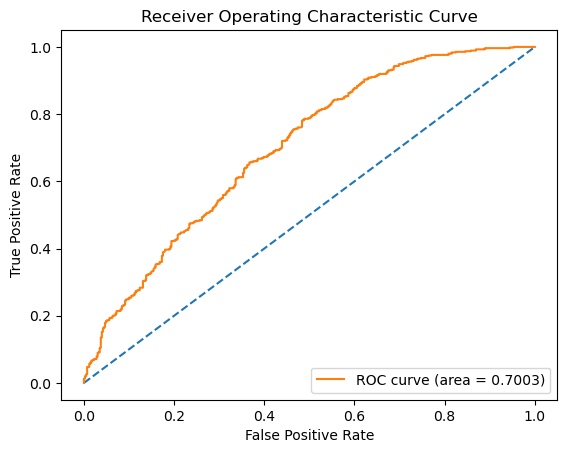

In [311]:
print('for training data')
curve_roc(logit_model, X_train, y_train)

for test data
AUC: 0.695


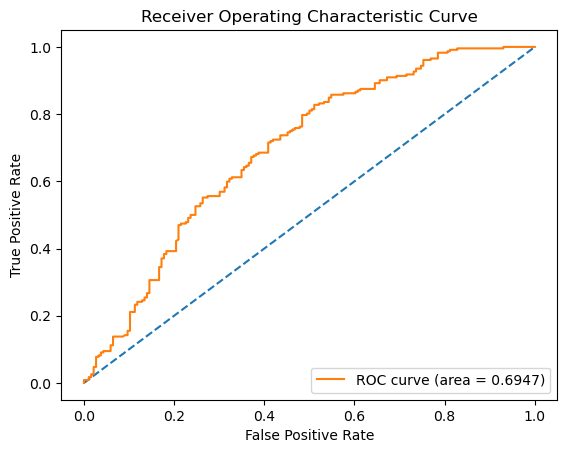

In [312]:
print('for test data')
curve_roc(logit_model, X_test, y_test)

1. The AUC score for model is almost identical which reitrates the fact that model is stable.
2. Model has an AUC score of 0.7 on train data and 0.694 on test data meaning model is doing a fair performance.
#### Confusion Matrix 

In [313]:
def classificaion_model_evaluator(model, target_data, predicted_data, data_type):
    cm_train = confusion_matrix(target_data, predicted_data)
    display(cm_train)
    print('\n')

    # plotting confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix {data_type}')
    plt.show()
    print('\n')

    # display classification report
    print(f'Classification report {data_type}')
    print('--------------------------------------------------------------------')
    print(classification_report(target_data, predicted_data))

for train data
--------------------------------------------------------------------


array([[211, 217],
       [111, 436]], dtype=int64)

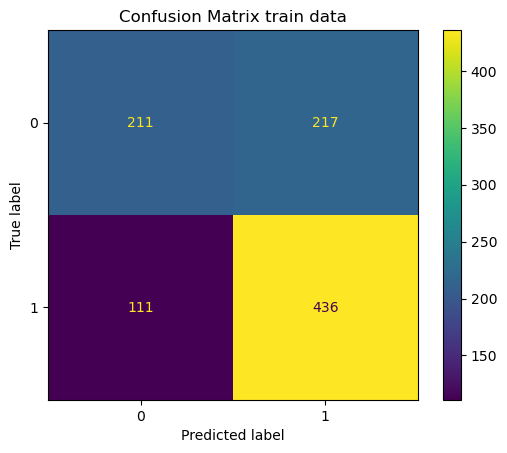



Classification report train data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.49      0.56       428
           1       0.67      0.80      0.73       547

    accuracy                           0.66       975
   macro avg       0.66      0.65      0.64       975
weighted avg       0.66      0.66      0.65       975



In [314]:
print('for train data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(logit_model, y_train, train_pred_logit, 'train data')

for test data
--------------------------------------------------------------------


array([[ 84, 102],
       [ 33, 199]], dtype=int64)

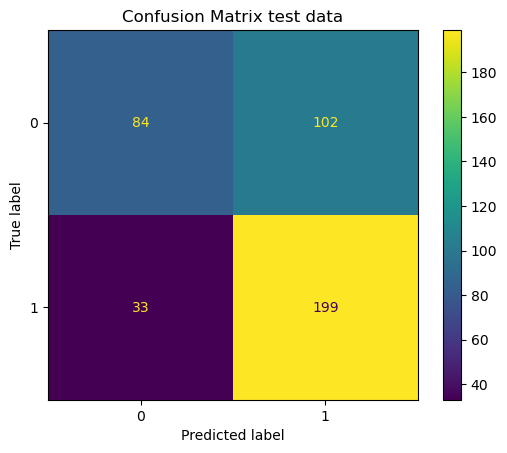



Classification report test data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.45      0.55       186
           1       0.66      0.86      0.75       232

    accuracy                           0.68       418
   macro avg       0.69      0.65      0.65       418
weighted avg       0.69      0.68      0.66       418



In [315]:
print('for test data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(logit_model, y_test, test_pred_logit, 'test data')

### Linear Discriminant Analysis

In [316]:
# definig the model
lda = LinearDiscriminantAnalysis()
# fitting the model
lda_model = lda.fit(X_train, y_train)
lda_model

LinearDiscriminantAnalysis()

In [317]:
# predicting train and test set data
train_pred_lda = lda_model.predict(X_train)
test_pred_lda = lda_model.predict(X_test)

#### Model Evaluation

In [318]:
print('Model accuracy for train data')
print(lda_model.score(X_train, y_train))
print('\n Model accuracy for test data')
print(lda_model.score(X_test, y_test))

Model accuracy for train data
0.6646153846153846

 Model accuracy for test data
0.6626794258373205


Model accuracy for both test and train data are almost identical meaning we have no issues for underfitting or over fitting and the model is stable.
#### Using AUC and ROC Method

for training data
AUC: 0.701


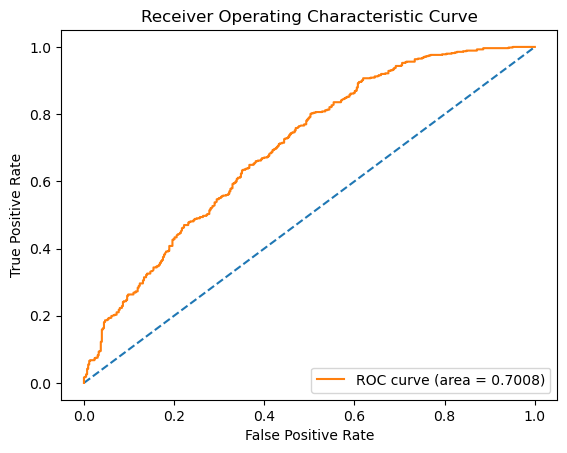

In [319]:
print('for training data')
curve_roc(lda_model, X_train, y_train)

for test data
AUC: 0.693


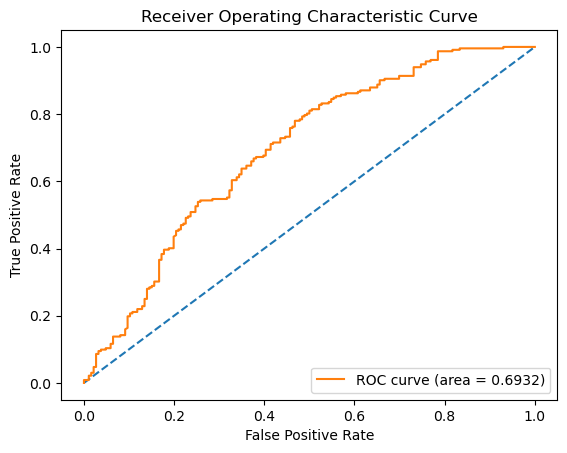

In [320]:
print('for test data')
curve_roc(lda_model, X_test, y_test)

1. The AUC score for model is almost identical which reitrates the fact that model is stable.
2. Model has an AUC score of 0.7 on train data and 0.694 on test data meaning model is doing a fair performance.
#### Confusion Matrix

for training data
--------------------------------------------------------------------


array([[207, 221],
       [106, 441]], dtype=int64)

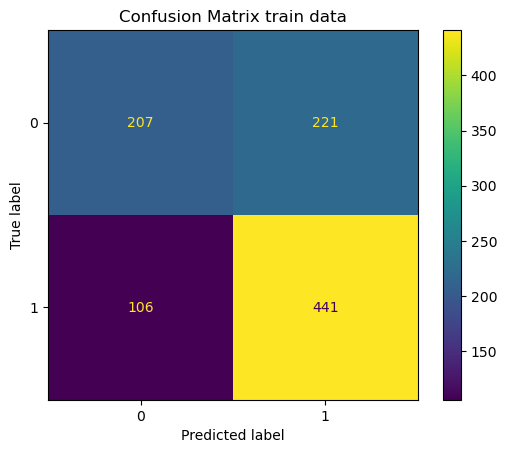



Classification report train data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.48      0.56       428
           1       0.67      0.81      0.73       547

    accuracy                           0.66       975
   macro avg       0.66      0.64      0.64       975
weighted avg       0.66      0.66      0.65       975



In [321]:
print('for training data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(lda_model, y_train, train_pred_lda, 'train data')

for test data
--------------------------------------------------------------------


array([[ 78, 108],
       [ 33, 199]], dtype=int64)

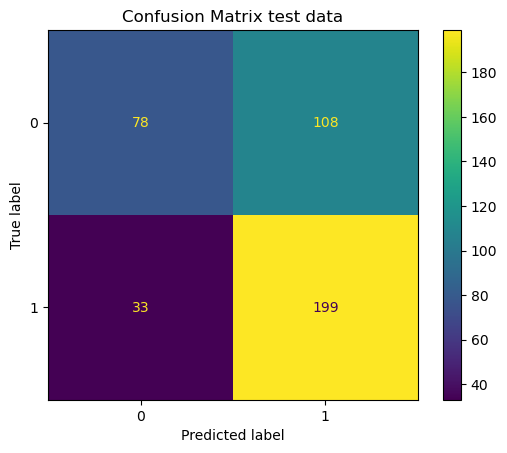



Classification report test data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.42      0.53       186
           1       0.65      0.86      0.74       232

    accuracy                           0.66       418
   macro avg       0.68      0.64      0.63       418
weighted avg       0.67      0.66      0.64       418



In [322]:
print('for test data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(lda_model, y_test, test_pred_lda, 'test data')

### Decision Tree

In [323]:
# defining the model
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)
# fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [324]:
# predicting train and test set values
train_pred_dt = dt_model.predict(X_train)
test_pred_dt = dt_model.predict(X_test)

#### Model Evaluation

In [325]:
print('Model accuracy for train data')
print(dt_model.score(X_train, y_train))
print('\n Model accuracy for test data')
print(dt_model.score(X_test, y_test))

Model accuracy for train data
0.9835897435897436

 Model accuracy for test data
0.6411483253588517


Model accuracy for test and train data are considerably different which means there is an issue of overfitting in the model, we will have to prune the model. For pruning we will use GridSearch to find find best parameters. 
##### Pruning using GridSearch

In [326]:
# setting parameters
params_grid = {'max_depth': [1,3,5,8,10,20],
              'min_samples_split': [5,10,20,30,40],
              'min_samples_leaf': [1,3,5,8,10]}

In [327]:
# defining GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=params_grid, cv = 5, n_jobs=-1, scoring='accuracy')
# fitting the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 8, 10, 20],
                         'min_samples_leaf': [1, 3, 5, 8, 10],
                         'min_samples_split': [5, 10, 20, 30, 40]},
             scoring='accuracy')

In [328]:
# printing best parameters found by GridSearchCV
print('Best parameters found: ', grid_search.best_params_)

Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 20}


creating a decision tree model using best parameters.

In [329]:
dt_model_reg = DecisionTreeClassifier(max_depth=5, min_samples_leaf= 3, min_samples_split=20, criterion='gini', random_state=42)
dt_model_reg.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=20,
                       random_state=42)

In [330]:
# predicting train and test set values
train_pred_dt = dt_model_reg.predict(X_train)
test_pred_dt = dt_model_reg.predict(X_test)

##### Model Evaluation

In [331]:
print('Model accuracy for train data')
print(dt_model_reg.score(X_train, y_train))
print('\n Model accuracy for test data')
print(dt_model_reg.score(X_test, y_test))

Model accuracy for train data
0.7312820512820513

 Model accuracy for test data
0.6698564593301436


Though still there is still a difference in the test and train data scores, we have bought down the difference significantly.
##### Using AUC and ROC Method

for training data
AUC: 0.779


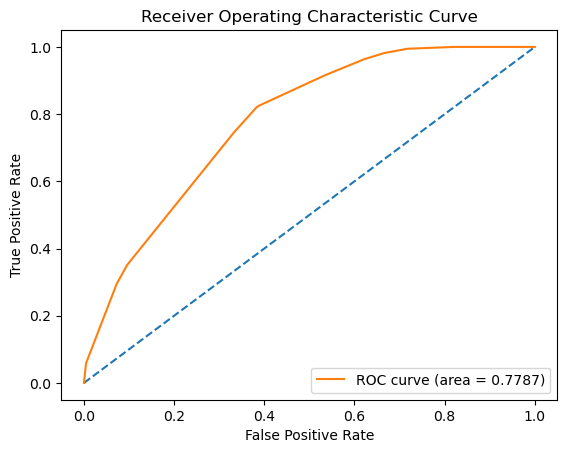

In [332]:
print('for training data')
curve_roc(dt_model_reg, X_train, y_train)

for test data
AUC: 0.701


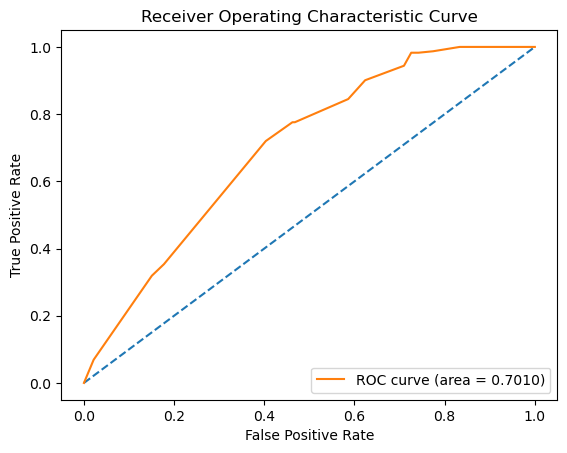

In [333]:
print('for test data')
curve_roc(dt_model_reg, X_test, y_test)

##### Confusion Matrix

for training data
--------------------------------------------------------------------


array([[264, 164],
       [ 98, 449]], dtype=int64)

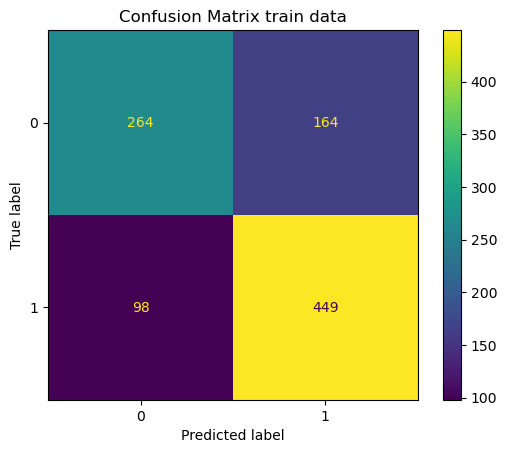



Classification report train data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       428
           1       0.73      0.82      0.77       547

    accuracy                           0.73       975
   macro avg       0.73      0.72      0.72       975
weighted avg       0.73      0.73      0.73       975



In [334]:
print('for training data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(dt_model_reg, y_train, train_pred_dt, 'train data')

for test data
--------------------------------------------------------------------


array([[100,  86],
       [ 52, 180]], dtype=int64)

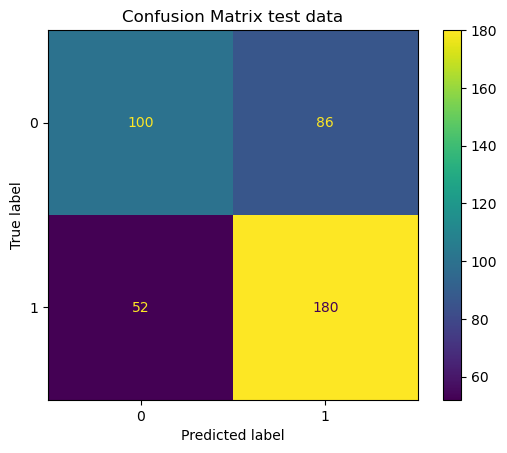



Classification report test data
--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.54      0.59       186
           1       0.68      0.78      0.72       232

    accuracy                           0.67       418
   macro avg       0.67      0.66      0.66       418
weighted avg       0.67      0.67      0.66       418



In [335]:
print('for test data')
print('--------------------------------------------------------------------')
classificaion_model_evaluator(dt_model_reg, y_test, test_pred_dt, 'test data')

### Model Comparision

In [336]:
train_score = []
test_score = []
f1_Score_train = []
f1_Score_test = []
models = [logit_model, lda_model, dt_model_reg]
for model in models:
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_s = model.score(X_train, y_train)
    test_s = model.score(X_test, y_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    train_score.append(train_s)
    test_score.append(test_s)
    f1_Score_train.append(f1_train)
    f1_Score_test.append(f1_test)

index = ['Logistic Regression', 'Linear Discriminant Analysis', 'Decision Tree']
compare_df = pd.DataFrame({'Train data score': train_score, 'Test data score': test_score, 
                           'f1 score train data': f1_Score_train, 'f1 score test data': f1_Score_test},
                          index = index)

In [337]:
compare_df.sort_values(by = 'Test data score', ascending = False)

Train data score  Test data score  \
Logistic Regression                   0.663590         0.677033   
Decision Tree                         0.731282         0.669856   
Linear Discriminant Analysis          0.664615         0.662679   

                              f1 score train data  f1 score test data  
Logistic Regression                      0.726667            0.746717  
Decision Tree                            0.774138            0.722892  
Linear Discriminant Analysis             0.729529            0.738404

From the above table, as per the train data decision tree model is performing the best in terms of both accuracy and f1 score. However, when we consider the test data, logistic regression model is performing best, in fact for logistic regression model the test and train data performance is almost identical which means it is a better generalised model which is not the case for decision tree model. Thus, considering that logistic regression model is better generalised model we consider it as the best model.   

### Feature Importance
In logistic regression we would use coefficient values to determine the most important features. 

In [338]:
feature_importance = pd.DataFrame(logit_model.coef_.transpose(), columns = ['imp'], index = X_train.columns)

In [339]:
feature_importance.sort_values(by = 'imp', ascending=False)

imp
Wife_education              0.441862
No_of_children_born         0.272439
Standard_of_living_index    0.190277
Husband_education           0.134508
Husband_occupation          0.123461
Wife_age                   -0.078586
Wife_working_Yes           -0.168278
Wife_religion_Scientology  -0.397523
Media_exposure_Not-Exposed -0.508125

Based on the sign of coefficient values we have we can divide them into 2 categories:
1. Positive Coefficients: The value of these features increase the log odds of positive outcome that is being labelled as class 1.
* For positive coefficients 'Wife_education' has the highest value which means that higher the level of education is amongst wife more likely they are going to use the contraceptive methods.
2. Negative Coefficients: The value of these features increase the log odds of positive outcome decreasing that is being labelled as class 1.
* For negative coefficients 'Media_exposure_Not-Exposed' has the highest impact meaning women who are not exposed to media are more likely of not using conraceptive methods.

## Conclusion
1. Based on the evaluation of various classification techniques for predictive modeling, the logistic regression model demonstrated the best generalization performance on the test data, achieving an accuracy score of 67.7%. This indicates that the model correctly predicts the class labels of the target variable 67.7% of the time.
2.  Based on coefficient values of the features, the regression equation is:

log odds (Contraceptive method used) = Intercept + 0.441862*Wife_education + 0.272439*No_of_children_born + 0.190277*Standard_of_living_index + 0.134508*Husband_education + 0.123461*Husband_occupation - 0.078586*Wife_age - 0.168278*Wife_working_Yes - 0.397523*Wife_religion_Scientology - 0.508125*Media_exposure_Not-Exposed

In [340]:
print(f'Where intercept value of model is: {logit_model.intercept_}')

Where intercept value of model is: [-0.24755177]


Here, using the log odds value the probability is calculated using equation p-value = 1/1 + e^-log-odds where if log odds value is greater than 0 than p-value > 0.5 and vice versa for log odds < 0.

### Key Takeaways
Based on the model coefficient values most important demographic and socio-economic features for classification are:
1. 'Wife_education' has the highest positive coefficient value of 0.4418 followed by 'No_of_children_born' with value of 0.2724 meaning provided other features remain constant with every increase in level of education amongst wife log-odds value will increase by 0.4418 and with every additional child born log-odds value will increase by 0.2724.
2. 'Media_exposure_Not-Exposed' has the highest negative coefficient value of -0.5081 followed by 'Wife_religion_Scientology' with value of -0.3975 meaning provided other features remain constant if there is no media exposure the log-odds value will decrease by 0.5081 and if 'WIfe_religion' is Scientology the log-odds value will decrease by 0.3975.

In simple terms, if there is no media exposure it is highly unlikely that married women will use contraceptive method and with increase in education levels the probability that a married woman will use contraceptive method also increases.